In [1]:
#                                                                           IMPORT MODULES
#===================================================================================================================================================================
from msops.Analysis.builder import opsbuild as op
from msops.CreateModel.model import createPortalFrame
from msops.Codes.Tbdy import FundemantelParameters as fp
from msops.Codes.Tbdy import TargetSpectrum as ts
from msops.Codes.Tbdy import Performance as prf
from msops.Material import tbdymaterials
from msops.Plotter.msplotter import plotter as msp
from msops.TimeSeries import ReadRecord as rr
from msops.Units.Unit import Unit
from msops.Utility.Utilities import CreateOutputsFolder,CreateCsvFiles
import openseespy.opensees as ops
import os
import scipy.integrate as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
pd.reset_option('all')
import warnings
warnings.simplefilter(action='ignore', category=ResourceWarning)

print(f" ==> Moduller import edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")


 ==> Moduller import edildi - 11 : 39 : 17


 ==> Cerceve bilgileri olusturuldu - 11 : 39 : 18
 ==> Model icin gerekli bilgiler olusturuldu - 11 : 39 : 18
 ==> Dugum noktalari olusturuldu - 11 : 39 : 18
 ==> Transformasyon olusturuldu - 11 : 39 : 18
 ==> Malzemeler olusturuldu - 11 : 39 : 18
 ==> Kiris nonlineer tanimlamalari olusturuldu - 11 : 39 : 18


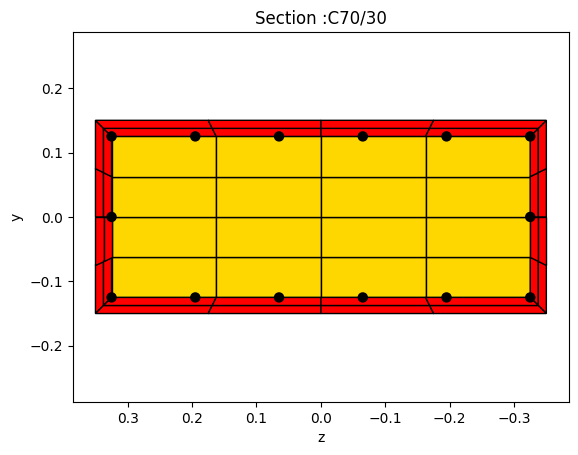

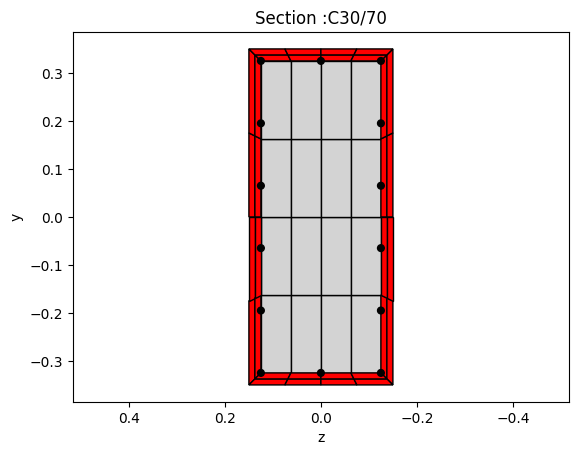

 ==> Kolon nonlineer tanimlamalari olusturuldu - 11 : 39 : 18
 ==> Kolonlar olusturuldu - 11 : 39 : 18
 ==> Kirisler olusturuldu - 11 : 39 : 18
 ==> Kiris yuklemeleri olusturuldu - 11 : 39 : 18

************************************************************ 
Extracting the mass matrix, ignore the warnings...
Using genBandArpack as solver...
Eigenvalue analysis is completed.
Modal Periods and Frequencies
Mode| T [sec]|    f [Hz]| ω [rad/sec]|λ [rad²/sec²]
   1|  0.7091|     1.410|        8.86|       78.51
   2|  0.2222|     4.501|       28.28|      799.94
   3|  0.1209|     8.269|       51.96|     2699.58
   4|  0.0791|    12.635|       79.39|     6302.81
   5|  0.0605|    16.523|      103.82|    10778.05
Total Activated Masses
      M₁|      M₂|      M₃
  122.91|  122.91|    0.00
Modal Mass Participation Factors
Mode|     Γ₁|     Γ₂|     Γ₃
   1| 10.058| -0.000|  0.000
   2|  3.599|  0.000|  0.000
   3|  2.302|  0.000|  0.000
   4| -1.622|  0.000|  0.000
   5|  0.935|  0.000|  0.000
Effe

WARNING analysis Transient - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Transient - no Integrator specified, 
 TransientIntegrator default will be used
WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0
OpenSees > analyze failed, returned: -3 error flag


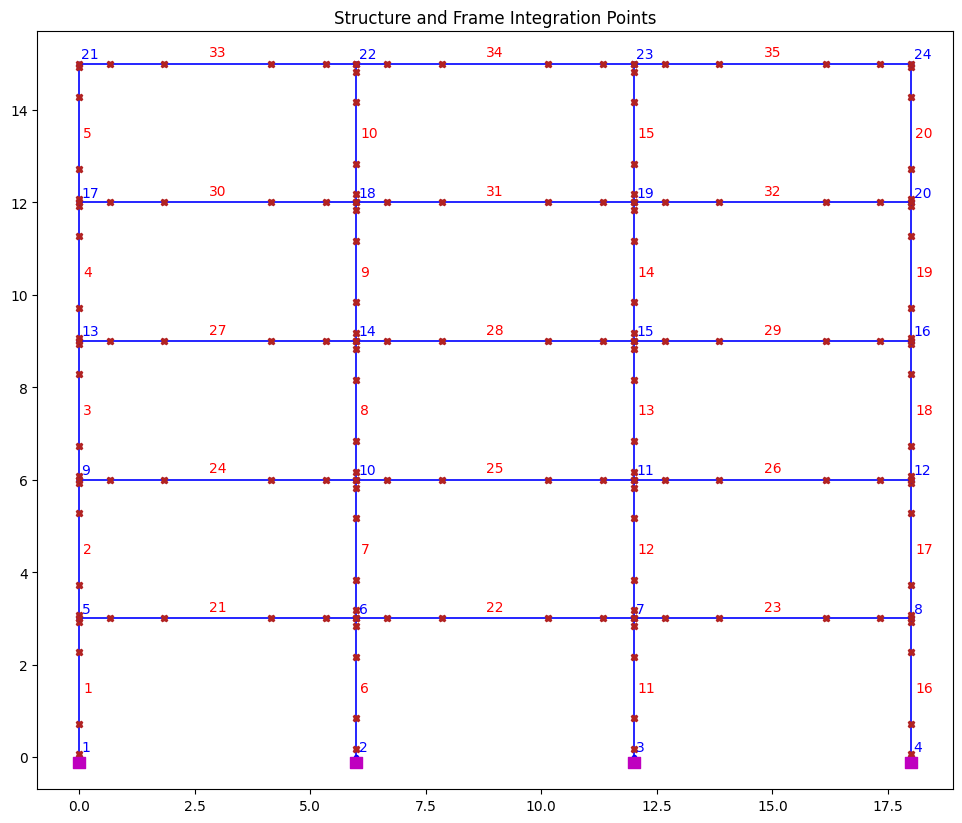

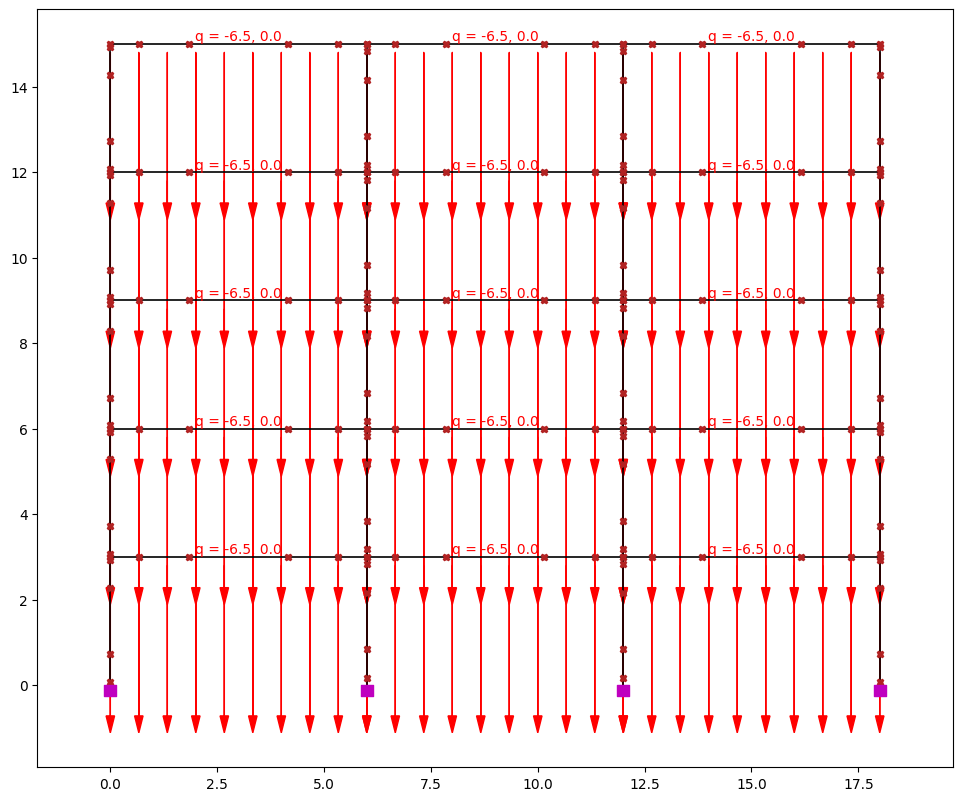

 ==> Gravity analiz bitti - 11 : 39 : 19
Fundamental period, T = 0.7193498496765107 sec
 mass damping coefficient 0.8476 stiffness damping coefficient 0.0003 betaKcurr = 0.0 betaKinit = 0.0
 ==> Rayleigh damping tanimlandi - 11 : 39 : 19
 ==> Deprem sayisi 2- 11 : 39 : 19
 ==> Deprem kayitlari alindi - 11 : 39 : 19
 ==> Elastik ve tasarim spektrumlari olusturuldu - 11 : 39 : 19
 ==> Zaman serisinin spektrumu hesaplandi - 11 : 53 : 36


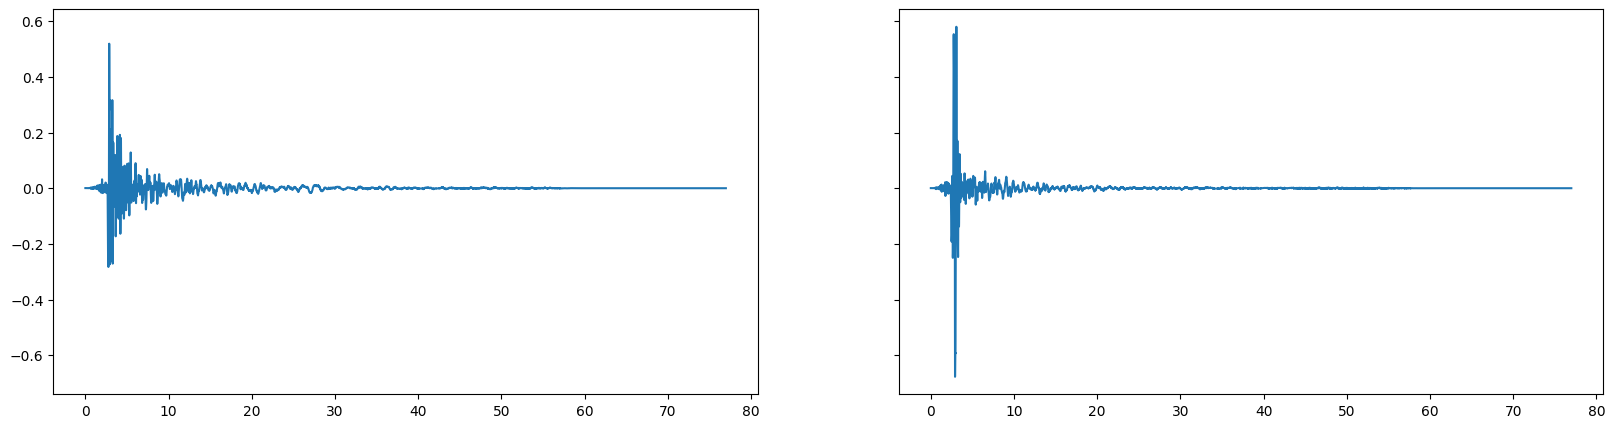

 ==> Scale faktorler bulundu - 11 : 53 : 37
 ==> Sonuc klasorleri olusturuldu - 11 : 53 : 37
 ==> Spektrum grafikleri kayit edildi - 11 : 53 : 37


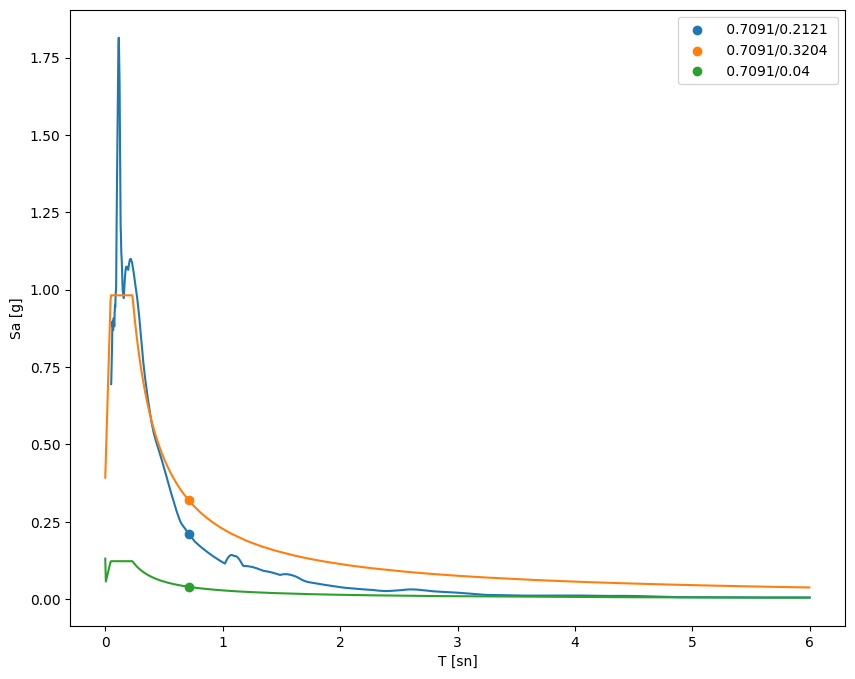

In [2]:
#                                                                   CREATE AUTO PORTAL FRAME
#===================================================================================================================================================================
numBay = 3
numFloor = 5
firstFloor = 3
bayWidht = 6
storyHeight = 3
pf = createPortalFrame(numBay, numFloor, firstFloor, bayWidht, storyHeight)
print(f" ==> Cerceve bilgileri olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                   SECTION AND MATERİAL DEFINITIONS
#===================================================================================================================================================================
interiorColumn_H = 70 * Unit.cm
interiorColumn_B = 30 * Unit.cm
exteriorColumn_H = 30 * Unit.cm
exteriorColumn_B = 70 * Unit.cm
beam_H = 50*Unit.cm
beam_B = 30*Unit.cm

fc = 25*Unit.MPa  # Nominal concrete compressive strength
#Ec = 57000*(fc/Unit.MPa)**0.5 * Unit.MPa
Ec = 30_000 * Unit.MPa
nu = 0.2                        # Poisson's ratio
Gc = Ec/(2*(1+nu))              # Shear modulus

concdensity = 24.99 * Unit.kN/Unit.m**3   # Conc density
wBeam = 6.5 * Unit.kN/Unit.m  # dist. load on beam

kCol = 0.7
kBeam = 0.35

Area_Int_Col = interiorColumn_B*interiorColumn_H
I_Int_Col = kCol * 1/12 * interiorColumn_B * interiorColumn_H**3

Area_Ext_Col = exteriorColumn_B*exteriorColumn_H
I_Ext_Col = kCol * 1/12 * exteriorColumn_B * exteriorColumn_H**3

Area_Beam = beam_B*beam_H
I_Beam = kBeam * 1/12 * beam_B * beam_H**3

bardiameterbeam = 14*Unit.mm
bardiametercol = 14*Unit.mm
cover = 25 * Unit.mm
barareabeam = 3.14*bardiameterbeam**2/4
barareacol = 3.14*bardiametercol**2/4

ColNumBarsBot_ext = 6
ColNumBarsTop_ext = 6
ColNumBarsInt_ext = 2

ColNumBarsTop = 3
ColNumBarsBot = 3
ColNumBarsInterior = 8

real_rebar_area = [462, 615, 769, 923]
num_rebar_beam = [area/barareabeam for area in real_rebar_area]

op.modelbuild()

B3050_mass = beam_B*beam_H*concdensity*bayWidht/Unit.g
C3070_mass = interiorColumn_B*interiorColumn_H*concdensity*storyHeight/Unit.g
C7030_mass = interiorColumn_B*interiorColumn_H*concdensity*storyHeight/Unit.g
print(f" ==> Model icin gerekli bilgiler olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                       FIBER COLUMN DEFINITIONS
#===================================================================================================================================================================
s = 100  # mm
etriye_çapı = 10  # mm
boyuna_donatı_çapı = 14  # mm
pas_payı = 25  # mm
baslık_donatı_top = 6  # adet
baslık_donatı_bot = 6  # adet
gövde_donatı_adeti = 1  # adet
x_koladeti = 3  # kesitin x eksenini kesen kol sayısı
y_koladeti = 3  # kesitin y eksenini kesen kol sayısı
unconfined_ext, confined_ext, important_points_ext = tbdymaterials.tbdy_mander("S420", fc/Unit.MPa, exteriorColumn_B*10**3, exteriorColumn_H*10**
                                                            3, s, etriye_çapı, bardiametercol*10**3, pas_payı, ColNumBarsTop, ColNumBarsBot, ColNumBarsInterior, x_koladeti, y_koladeti)

s = 100  # mm
etriye_çapı = 10  # mm
boyuna_donatı_çapı = 14  # mm
pas_payı = 25  # mm
baslık_donatı_top = 3  # adet
baslık_donatı_bot = 3  # adet
gövde_donatı_adeti = 4  # adet
x_koladeti = 3  # kesitin x eksenini kesen kol sayısı
y_koladeti = 3  # kesitin y eksenini kesen kol sayısı
unconfined_int, confined_int, important_points_int = tbdymaterials.tbdy_mander("S420", fc/Unit.MPa, interiorColumn_B*10**3, interiorColumn_H*10 **
                                                            3, s, etriye_çapı, bardiametercol*10**3, pas_payı, ColNumBarsTop, ColNumBarsBot, ColNumBarsInterior, x_koladeti, y_koladeti)

#                                                                           UNCONFINED CONCRETE
#===================================================================================================================================================================
fc1U = -fc
# -eps_c_sargısız[f_c_sargısız.index(max(f_c_sargısız))]      # strain at maximum strength of unconfined concrete
eps1U_int = unconfined_int['values'][1]
# -f_c_sargısız[-1]*Unit.MPa    # ultimate stress
fc2U_int = unconfined_int['values'][2]
# -eps_c_sargısız[-1]       # strain at ultimate stress
eps2U_int = unconfined_int['values'][3]

# -eps_c_sargısız[f_c_sargısız.index(max(f_c_sargısız))]      # strain at maximum strength of unconfined concrete
eps1U_ext = unconfined_ext['values'][1]
# -f_c_sargısız[-1]*Unit.MPa    # ultimate stress
fc2U_ext = unconfined_ext['values'][2]
# -eps_c_sargısız[-1]       # strain at ultimate stress
eps2U_ext = unconfined_ext['values'][3]

#                                                                           CONFINED CONCRETE
#===================================================================================================================================================================
# -f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
fc1C_int = confined_int['values'][0]
# -eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
eps1C_int = confined_int['values'][1]
# -f_c_sargılı[-1]*Unit.MPa    # ultimate stress
fc2C_int = confined_int['values'][2]
# -eps_c_sargılı[-1]     # strain at ultimate stress
eps2C_int = confined_int['values'][3]

# -f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
fc1C_ext = confined_ext['values'][0]
# -eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
eps1C_ext = confined_ext['values'][1]
# -f_c_sargılı[-1]*Unit.MPa    # ultimate stress
fc2C_ext = confined_ext['values'][2]
# -eps_c_sargılı[-1]     # strain at ultimate stress
eps2C_ext = confined_ext['values'][3]

# tensile-strength properties
Lamopa = 0.1        # ratio between unloading slope at eps2 and initial slope Ec
fct = 0.10*fc       # tensile strength +tension
Ets = fct/0.002     # tension softening stiffness


#                                                                       REBAR MATERIAL
#==================================================================================================================================================================
fsy = 420*Unit.MPa     # Yield stress
Es = 2*10**5*Unit.MPa     # Young's modulus
bs = 0.01           # strain-hardening ratio
R0 = 18             # control the transition from elastic to plastic branches
cR1 = 0.925         # control the transition from elastic to plastic branches
cR2 = 0.15          # control the transition from elastic to plastic branches
minStrain = -0.1    # minimum steel strain in the fibers (steel buckling)
maxStrain = 0.1     # maximum steel strain in the fibers (steel rupture)

#                                                                       CREATE NODES
#===================================================================================================================================================================
"""print(f"floor Nodes = {pf.floorNodes} ")
for floor,node in zip(pf.floorNodes.keys(),pf.floorNodes.values()):
    if floor != 0 or floor != numFloor:
        if node >= numBay-1 or node <= numFloor*numBay:"""

for node in pf.node_dict.keys():
    if node in pf.floorNodes[0]:
        ops.node(node, pf.node_dict[node][0], pf.node_dict[node]
                 [1], '-mass', C3070_mass/2, C3070_mass/2, 0.0)

    if node in pf.floorNodes[1]:
        if node in [pf.floorNodes[1][0], pf.floorNodes[1][-1]]:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+B3050_mass+C3070_mass)/2, (C3070_mass+B3050_mass+C3070_mass)/2, 0.0)
        else:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1],
                     '-mass', C3070_mass+B3050_mass, C3070_mass+B3050_mass, 0.0)

    if node in pf.floorNodes[2]:
        if node in [pf.floorNodes[2][0], pf.floorNodes[2][-1]]:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+B3050_mass+C3070_mass)/2, (C3070_mass+B3050_mass+C3070_mass)/2, 0.0)
        else:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+C3070_mass)/2+B3050_mass, (C3070_mass+C3070_mass)/2+B3050_mass, 0.0)

    if node in pf.floorNodes[3]:
        if node in [pf.floorNodes[3][0], pf.floorNodes[3][-1]]:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+B3050_mass+C3070_mass)/2, (C3070_mass+B3050_mass+C3070_mass)/2, 0.0)
        else:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1],
                     '-mass', C3070_mass+B3050_mass, C3070_mass+B3050_mass, 0.0)

    if node in pf.floorNodes[4]:
        if node in [pf.floorNodes[4][0], pf.floorNodes[4][-1]]:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+B3050_mass+C3070_mass)/2, (C3070_mass+B3050_mass+C3070_mass)/2, 0.0)
        else:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1],
                     '-mass', C3070_mass+B3050_mass, C3070_mass+B3050_mass, 0.0)

    if node in pf.floorNodes[5]:
        if node in [pf.floorNodes[5][0], pf.floorNodes[5][-1]]:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1], '-mass',
                     (C3070_mass+B3050_mass)/2, (C3070_mass+B3050_mass)/2, 0.0)
        else:
            ops.node(node, pf.node_dict[node][0], pf.node_dict[node][1],
                     '-mass', C3070_mass/2+B3050_mass, C3070_mass/2+B3050_mass, 0.0)

for i in pf.floorNodes[0]:
    ops.fix(i, 1, 1, 1)
print(f" ==> Dugum noktalari olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                       CREATE TRANSFORMATIONS
#===================================================================================================================================================================
ColTransfTag = 1
BeamTransfTag = 2
ops.geomTransf('Linear', BeamTransfTag)  # Beam Tranformation Tag
ops.geomTransf('PDelta', ColTransfTag)  # Column Tranformation Tag
print(f" ==> Transformasyon olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                       CREATE CONCRETE AND REBAR MATERİAL
#===================================================================================================================================================================

IDconcCover = 1  # Tag for unconfined concrete material
IDconcCore_int = 2  # Tag for confined concrete material
IDconcCore_ext = 3  # Tag for confined concrete material
IDSteel = 4  # Tag for steel material without min-max properties
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Cover Concrete Material

ops.uniaxialMaterial('Concrete01', IDconcCover, fc1U,
                     eps1U_int, eps2U_int, Ec)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Core Concrete Material
ops.uniaxialMaterial('Concrete01', IDconcCore_int, fc1C_int,
                     eps1C_int, eps2C_int, Ec)
ops.uniaxialMaterial('Concrete01', IDconcCore_ext, fc1C_ext,
                     eps1C_ext, eps2C_ext, Ec)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Rebar Material
ops.uniaxialMaterial('Steel02', IDSteel, fsy, Es, bs,  R0, cR1, cR2)

print(f" ==> Malzemeler olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                               CREATE INTEGRATION FOR BEAM ELEMENT
#===================================================================================================================================================================

#DEFINE ELASTIC SECTION FOR BEAM
#===============================================================================================================
ElBeamSec_Elastic = 30       # Tag for elastic sbeam section
# [P,Mz] davranışını sonuç olarak veriyor. B60/30
ops.section('Elastic', ElBeamSec_Elastic, Ec, Area_Beam, I_Beam)


#                                                       DEFINE UNIAXIAL MATERIAL FOR BEAM SECTION MOMENT-CURVATURE RELATION
#===================================================================================================================================================================
# Moment - Curvature lardan alınan akma momentleri ve akma birim şekildeğiştirmeleri girilmiştir
BeamMatTagFlex1 = 1333
BeamMatTagFlex2 = 1334
BeamMatTagFlex3 = 1335
BeamMatTagFlex4 = 1336

""" # Hysteretic material
# p1=[s1p, e1p] #stress and strain (or force & deformation) at first point of the envelope in the positive direction
# p2=[s2p, e2p] #stress and strain (or force & deformation) at second point of the envelope in the positive direction
# p3=[s3p, e3p] #stress and strain (or force & deformation) at third point of the envelope in the positive direction
# n1=[s1n, e1n] #stress and strain (or force & deformation) at first point of the envelope in the negative direction
# n2=[s2n, e2n] #stress and strain (or force & deformation) at second point of the envelope in the negative direction
# n3=[s3n, e3n] #stress and strain (or force & deformation) at third point of the envelope in the negative direction
# pinchX = 0.2  #pinching factor for strain (or deformation) during reloading
# pinchY = 0.8  #pinching factor for stress (or force) during reloading
# damage1 = 0.  #damage due to ductility: D1(mu-1)
# damage2 = 0.  #damage due to energy: D2(Eii/Eult)
# beta = 0.     #power used to determine the degraded unloading stiffness based on ductility, mu-beta (optional, default=0.0)

# inputs1 = [139.02, 0.003,  148.47,  0.004,  208.71,  0.09, 
#           -139.02,-0.003, -148.47, -0.004, -208.71, -0.09,
#            1.0, 1.0, 0.0, 0.0, 0.0]
# inputs2 = [141.24, 0.003,  149.11,  0.004,  208.74,  0.089, 
#           -141.24,-0.003, -149.11, -0.004, -208.74, -0.089,
#            1.0, 1.0, 0.0, 0.0, 0.0]
# inputs3 = [108.35, 0.003, 112.22, 0.004, 157.62, 0.09, 
#           -108.35, -0.003, -112.22, -0.004, -157.62, -0.09,
#            1.0, 1.0, 0.0, 0.0, 0.0]
# inputs4 = [108.35, 0.003, 112.22, 0.004, 157.62, 0.09, 
#           -108.35, -0.003, -112.22, -0.004, -157.62, -0.09,
#            1.0, 1.0, 0.0, 0.0, 0.0] """

inputs1 = [126.62, 0.0025 , 161.08,  0.01,  183.75,  0.0525, 
          -126.62,-0.0025 ,-161.08, -0.01, -183.75, -0.0525,
           1.0, 1.0, 0.0, 0.0, 0.0]
inputs2 = [128.26, 0.0025,  161.52,  0.01,  184.17,  0.0525, 
          -128.26,-0.0025, -161.52, -0.01, -184.17, -0.0525,
           1.0, 1.0, 0.0, 0.0, 0.0]
inputs3 = [107.82, 0.0025, 132.01, 0.01, 149.26,  0.0525, 
          -107.82,-0.0025,-132.01,-0.01,-149.26, -0.0525,
           1.0, 1.0, 0.0, 0.0, 0.0]
inputs4 = [107.82, 0.0025, 132.01, 0.01, 149.26,  0.0525, 
          -107.82,-0.0025,-132.01,-0.01,-149.26, -0.0525,
           1.0, 1.0, 0.0, 0.0, 0.0]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Kiriş kesiti 30x50 üst donatı alanı => 769 alt donatı alanı => 615;
ops.uniaxialMaterial('Hysteretic', BeamMatTagFlex1, *
                     inputs1) 		# bilinear behavior for flexure

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Kiriş kesiti 30x50 üst donatı alanı => 923 alt donatı alanı => 615;

ops.uniaxialMaterial('Hysteretic', BeamMatTagFlex2, *
                     inputs2) 		# bilinear behavior for flexure

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Kiriş kesiti 30x50 üst donatı alanı => 615 alt donatı alanı => 462;
ops.uniaxialMaterial('Hysteretic', BeamMatTagFlex3, *
                     inputs3) 		# bilinear behavior for flexure

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Kiriş kesiti 30x50 üst donatı alanı => 769 alt donatı alanı => 462;
ops.uniaxialMaterial('Hysteretic', BeamMatTagFlex4, *
                     inputs4) 		# bilinear behavior for flexure

#                                                                       DEFINE BEAM SECTION
#===================================================================================================================================================================
BeamSecTag_agg1 = 1001
BeamSecTag_agg2 = 1002
BeamSecTag_agg3 = 1003
BeamSecTag_agg4 = 1004

ops.section('Aggregator', BeamSecTag_agg1, BeamMatTagFlex1, 'Mz')#769,615
ops.section('Aggregator', BeamSecTag_agg2, BeamMatTagFlex2, 'Mz')#923,615
ops.section('Aggregator', BeamSecTag_agg3, BeamMatTagFlex3, 'Mz')#615,462
ops.section('Aggregator', BeamSecTag_agg4, BeamMatTagFlex4, 'Mz')#769,462

#                                                                   DEFINE INTEGRATION TYPE FOR BEAM
#===================================================================================================================================================================
beamIntgrTag1 = 7
beamIntgrTag2 = 8
beamIntgrTag3 = 9
beamIntgrTag4 = 10
beamIntgrTag5 = 11
Lpl = 0.5 * beam_H

# Beam integration point definition                                                                                 i   ;    j
ops.beamIntegration('HingeRadau', beamIntgrTag1, BeamSecTag_agg1,Lpl, BeamSecTag_agg2, Lpl, ElBeamSec_Elastic)  #769,625 ; 923,615
ops.beamIntegration('HingeRadau', beamIntgrTag2, BeamSecTag_agg2,Lpl, BeamSecTag_agg2, Lpl, ElBeamSec_Elastic) #923,615 ; 923,615
ops.beamIntegration('HingeRadau', beamIntgrTag3, BeamSecTag_agg3,Lpl, BeamSecTag_agg4, Lpl, ElBeamSec_Elastic) #615,462 ; 769,462
ops.beamIntegration('HingeRadau', beamIntgrTag4, BeamSecTag_agg4,Lpl, BeamSecTag_agg3, Lpl, ElBeamSec_Elastic) #769,462 ; 615,462 
ops.beamIntegration('HingeRadau', beamIntgrTag5, BeamSecTag_agg4,Lpl, BeamSecTag_agg4, Lpl, ElBeamSec_Elastic) #769,462 ; 769,462 
print(f" ==> Kiris nonlineer tanimlamalari olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                   CREATE INTEGRATION FOR COLUMN ELEMENT
#===================================================================================================================================================================

#                                                                   DEFINE FIBER SECTION FOR COLUMN SECTION
#===================================================================================================================================================================
ColSecTag_Fiber_ext = 1111
ColSecTag_Fiber_int = 1112
fiber_sec1 = op.BuildRCrectSection(ColSecTag_Fiber_ext, exteriorColumn_H, exteriorColumn_B, cover, cover, IDconcCore_ext, IDconcCover, IDSteel,
                                   ColNumBarsTop_ext, barareacol, ColNumBarsBot_ext, barareacol, ColNumBarsInt_ext, barareacol,
                                   nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
msp.plot_fiber_section(SecID="C70/30", fiber_sec=fiber_sec1)

fiber_sec2 = op.BuildRCrectSection(ColSecTag_Fiber_int, interiorColumn_H, interiorColumn_B, cover, cover, IDconcCore_int, IDconcCover, IDSteel,
                                   ColNumBarsTop, barareacol, ColNumBarsBot, barareacol, ColNumBarsInterior, barareacol,
                                   nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
msp.plot_fiber_section(SecID="C30/70", fiber_sec=fiber_sec2)
del fiber_sec1, fiber_sec2

#                                                               DEFINE INTEGRATION TYPE FOR COLUMN
#===================================================================================================================================================================
ColElasticSec1, ColElasticSec2 = 228, 229
ops.section('Elastic', ColElasticSec1, Ec, Area_Ext_Col, I_Ext_Col)
ops.section('Elastic', ColElasticSec2, Ec, Area_Int_Col, I_Int_Col)

Lpl_ext = 0.5*exteriorColumn_H
Lpl_int = 0.5*interiorColumn_H

colIntgrTag_ext = 1
colIntgrTag_int = 2
ops.beamIntegration('HingeMidpoint', colIntgrTag_ext, ColSecTag_Fiber_ext,
                    Lpl_ext, ColSecTag_Fiber_ext, Lpl_ext, ColElasticSec1)
ops.beamIntegration('HingeMidpoint', colIntgrTag_int, ColSecTag_Fiber_int,
                    Lpl_int, ColSecTag_Fiber_int, Lpl_int, ColElasticSec1)
print(f" ==> Kolon nonlineer tanimlamalari olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                       CREATE COLUMNS
#===================================================================================================================================================================
#Hsec,cover,idCoverMat,idCoreMat,idSteel,lpl
for colId in pf.column_dict.keys():
    jNode = pf.node_dict[pf.column_dict[colId][1]][1]
    if colId <= numFloor:
        ops.element('forceBeamColumn', colId,pf.column_dict[colId][0], pf.column_dict[colId][1], ColTransfTag,  colIntgrTag_ext)
        pf.column_dict[colId].append(round(exteriorColumn_B,2))
        pf.column_dict[colId].append(round(exteriorColumn_H,2))
        pf.column_dict[colId].append(round(cover,4))
        pf.column_dict[colId].append(IDconcCover)
        pf.column_dict[colId].append(IDconcCore_ext)
        pf.column_dict[colId].append(IDSteel)
        pf.column_dict[colId].append(round(Lpl_ext,4))
        continue
    elif colId > numFloor and colId <= (numBay*numFloor):
        ops.element('forceBeamColumn', colId,pf.column_dict[colId][0], pf.column_dict[colId][1], ColTransfTag,  colIntgrTag_int)
        pf.column_dict[colId].append(round(interiorColumn_B,2))
        pf.column_dict[colId].append(round(interiorColumn_H,2))
        pf.column_dict[colId].append(round(cover,4))
        pf.column_dict[colId].append(IDconcCover)
        pf.column_dict[colId].append(IDconcCore_int)
        pf.column_dict[colId].append(IDSteel)
        pf.column_dict[colId].append(round(Lpl_int,4))
        continue
    else:
        ops.element('forceBeamColumn', colId,pf.column_dict[colId][0], pf.column_dict[colId][1], ColTransfTag,  colIntgrTag_ext)
        pf.column_dict[colId].append(round(exteriorColumn_B,2))
        pf.column_dict[colId].append(round(exteriorColumn_H,2))
        pf.column_dict[colId].append(round(cover,4))
        pf.column_dict[colId].append(IDconcCover)
        pf.column_dict[colId].append(IDconcCore_ext)
        pf.column_dict[colId].append(IDSteel)
        pf.column_dict[colId].append(round(Lpl_ext,4))
        continue
print(f" ==> Kolonlar olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

#                                                                       CREATE BEAMS
#===================================================================================================================================================================
for beamId in pf.beam_dict.keys():
    iNode = pf.beam_dict[beamId][0]
    jNode = pf.beam_dict[beamId][1]
    if jNode in pf.floorNodes[1]:
        if beamId == 21 or beamId == 23:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag1, '-mass', wBeam/Unit.g)

        else:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag2, '-mass', wBeam/Unit.g)
        continue

    if jNode in pf.floorNodes[2] or jNode in pf.floorNodes[3] or jNode in pf.floorNodes[4]:
        if beamId == 24 or beamId == 26 or beamId == 27 or beamId == 29 or beamId == 30 or beamId == 32:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag1, '-mass', wBeam/Unit.g)

        else:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag2, '-mass', wBeam/Unit.g)
        continue
    else:
        if beamId == 33:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag3, '-mass', wBeam/Unit.g)

        if beamId == 34:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag4, '-mass', wBeam/Unit.g)

        if beamId == 35:
            ops.element('forceBeamColumn', beamId,pf.beam_dict[beamId][0], pf.beam_dict[beamId][1], BeamTransfTag, beamIntgrTag5, '-mass', wBeam/Unit.g)
        continue
print(f" ==> Kirisler olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")    

#                                                               CREATE DISTRUBUTED LOAD ON THE BEAMS
#===================================================================================================================================================================
# Create a Plain load pattern with a Linear TimeSeries
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
for idBeam in pf.beam_dict.keys():
    ops.eleLoad('-ele', idBeam, '-type', '-beamUniform', -wBeam, 0)
print(f" ==> Kiris yuklemeleri olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                       EIGEN ANALYSIS
#===================================================================================================================================================================
T, Mratios, Mfactors, Mtots = op.modal_analys2(numFloor)
print(f" ==> Eigen analiz bitti - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                   GRAVITY ANALYSIS AND PLOT MODEL
#===================================================================================================================================================================
eleForces_grav, nodalDisps_grav, BaseReactions_grav, eleSection_grav = op.do_gravity()
msp.plot_model()
print(f" ==> Gravity analiz bitti - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                   CREATE RAYLEIGH DAMPING
#===================================================================================================================================================================
op.rayleigh(numMode=numFloor, xDamp=0.05, betaKcurr=0.0, betaKinit=0.0)
print(f" ==> Rayleigh damping tanimlandi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                   CREATE TIME-SERIES
#===================================================================================================================================================================
EarthquakeName = "Coalinga" 
eventname = f"C:\\Users\\muham\\Masaüstü\\github\\msops\\msops\\Test\\Earthquakes\\{EarthquakeName}"
# verilen deprem kayıtlarının bulunduğu klasördeki .AT2 uzantılı dosyaların listelenmesi
eventlist = [i for i in os.listdir(f"{eventname}") if i.endswith('.AT2')]
filePath = [f"{eventname}/{path}" for path in eventlist]
print(f" ==> Deprem sayisi {len(filePath)}- {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

for index,eqe in enumerate(filePath):
    trash_Eq= rr.ReadRecord(eqe,gap=None, g=1, plot=0)
    timegap = rr.calc_timegap(Td=trash_Eq.Time[trash_Eq.last_valid_index()],damp_ratio= 0.05,T= T[0])
    Eq = rr.ReadRecord(eqe, timegap, g=1, plot=0)
    if index == 0:
        Events = Eq.copy()
    else:
        Events[f"Time{index}"] = Eq["Time"]
        Events[f"Acceleration{index}"] = Eq["Acceleration"]
nanindex =Events.Time1.isna().sum()
startNanIndex = Events.last_valid_index()-nanindex
Events.Time1[startNanIndex:Events.last_valid_index()].fillna(value=Events.Time[startNanIndex:Events.last_valid_index()+1],inplace=True)
Events.drop([Events.last_valid_index()],axis = 0,inplace=True)
Events.fillna(value=0.0,inplace=True)
print(f" ==> Deprem kayitlari alindi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                       DESIGN AND ELASTIC COEFFICIENT FOR TIME SERIES
#===================================================================================================================================================================

target = ts()
ElasticSpektrum = target.HorizontalElasticSpectrum(Ss = 1.091, S1 = 0.284, soil = "ZB")
DesignSpektrum = target.ReducedTargetSpectrum(TargetSpectrum=ElasticSpektrum,R=8,I=1,D=3,SD1 =0.2272 ,SDs = 0.9819)
coeff =target.LocationHorizontalSpectra(R=8.0,I=1.0,D=3.0,T=T[0],SD1 =0.2272 ,SDs = 0.9819)
print(f" ==> Elastik ve tasarim spektrumlari olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

periods,Sa,Sv,Sd = target.TimeSeriesSpectra(Acceleration= Events["Acceleration"] ,Time =Events["Time"])
Sa_series = target.LocationSeriesSpectra(T=round(T[0],2),Accelertions=Sa,Periods=periods)
print(f" ==> Zaman serisinin spektrumu hesaplandi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                   PLOT TIME SERIES
#===================================================================================================================================================================
fig , ax = plt.subplots( 1,len(filePath) , sharex = True , sharey = True  , figsize=(20,5) )
ax[0].plot(Events.Time,Events.Acceleration)
ax[1].plot(Events.Time1,Events.Acceleration1)
plt.show()
scalecoeff = [i/Sa_series for i in coeff]
print(f" ==> Scale faktorler bulundu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

#                                                                   CREATE OUTPUTS FOLDER
#===================================================================================================================================================================
Folderspath = "C:\\Users\\muham\\Masaüstü\\github\\msops\\msops\\Test"
CreateOutputsFolder(FolderPath=Folderspath, EarthquakeName=EarthquakeName, coeff=scalecoeff)
print(f" ==> Sonuc klasorleri olusturuldu - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

fig , ax = plt.subplots( 1,1 , sharex = True , sharey = True  , figsize=(10,8) )
ax.plot(periods,Sa)
ax.scatter(round(T[0],4),Sa_series,label=f" {round(T[0],4)}/{Sa_series} ")
ax.plot(ElasticSpektrum["T"],ElasticSpektrum["Sa"])
ax.plot(DesignSpektrum["T"],DesignSpektrum["SaR"])
ax.scatter(round(T[0],4),coeff[0],label=f" {round(T[0],4)}/{coeff[0]} ")
ax.scatter(round(T[0],4),coeff[1],label=f" {round(T[0],4)}/{coeff[1]} ")
ax.set_xlabel("T [sn]");ax.set_ylabel("Sa [g]")
ax.legend()
plt.savefig(f"{Folderspath}\\Outputs\\{EarthquakeName}\\Spectrums.png")
print(f" ==> Spektrum grafikleri kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

 ==> Opensees domainindeki time series silindi - 11 : 54 : 30
 ==> 0.0. deprem için 1.5106082036775106 carpani uygulandi - 11 : 54 : 30
 ==> analiz secenekleri tanimlandi ve analiz baslatildi - 11 : 54 : 30
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi bitti - 12 : 48 : 47
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi sonuçlari csv olarak kayit edildi - 12 : 49 : 4

************************************************************ 
Extracting the mass matrix, ignore the warnings...
Using genBandArpack as solver...
Eigenvalue analysis is completed.
Modal Periods and Frequencies
Mode| T [sec]|    f [Hz]| ω [rad/sec]|λ [rad²/sec²]
   1|  0.7468|     1.339|        8.41|       70.79
   2|  0.2362|     4.234|       26.60|      707.82
   3|  0.1303|     7.673|       48.21|     2324.19
   4|  0.0861|    11.613|       72.97|     5324.07
   5|  0.0662|    15.099|       94.87|     9000.16
Total Activated Masses
      M₁|      M₂|      M₃
  122.91|  122.91|    0.00
Modal Mass Part

WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 76.995
OpenSees > analyze failed, returned: -3 error flag
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaXMax"][colId] = DeltaX.max()
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaYMax"][colId] = DeltaY.max()
c:\users\muham\masaüstü\gith

 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi için kolon driftleri hesaplandi ve csv dosyalari kayit edildi - 12 : 49 : 7
 0 -> Sınırlı Hasar; 1 -> Belirgi Hasar; 2 -> İleri Hasar; 3 -> Göçme Durumu; 4 -> Not Fiber
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi Performans hesaplari yapildi ve csv dosyasi kayit edildi - 14 : 1 : 24
64285.31683538501
16606.581160959373
20199.932549973542
6585.3301951565245
1841.4657890411195
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi enerji hesaplari yapildi ve csv dosyalari kayit edildi - 14 : 2 : 21


c:\users\muham\masaüstü\github\msops\msops\Plotter\msplotter.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots( 1,1 , sharex = True , sharey = True  , figsize=(20,5) )


 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi stress-strain grafikleri kayit edildi - 14 : 2 : 27
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi moment-rotation grafikleri kayit edildi - 14 : 2 : 42
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi eleman i ve j uclarinin enerji grafikleri kayit edildi - 14 : 2 : 56
 ==> 1.5106082036775106 carpani icin 0.0. deprem analizi elemanlarin enerji grafikleri kayit edildi - 14 : 3 : 6
 ==> 1.0. deprem için 1.5106082036775106 carpani uygulandi - 14 : 3 : 6
 ==> analiz secenekleri tanimlandi ve analiz baslatildi - 14 : 3 : 6
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi bitti - 14 : 51 : 1
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi sonuçlari csv olarak kayit edildi - 14 : 51 : 9

************************************************************ 
Extracting the mass matrix, ignore the warnings...
Using genBandArpack as solver...
Eigenvalue analysis is completed.
Modal Periods and Frequencies
Mode| T

WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 76.995
OpenSees > analyze failed, returned: -3 error flag
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaXMax"][colId] = DeltaX.max()
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaYMax"][colId] = DeltaY.max()
c:\users\muham\masaüstü\gith

 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi için kolon driftleri hesaplandi ve csv dosyalari kayit edildi - 14 : 51 : 10
 0 -> Sınırlı Hasar; 1 -> Belirgi Hasar; 2 -> İleri Hasar; 3 -> Göçme Durumu; 4 -> Not Fiber
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi Performans hesaplari yapildi ve csv dosyasi kayit edildi - 16 : 3 : 37
136836.74690187635
175097.0416560936
206203.0025454116
59593.427510065696
6249.362022783138
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi enerji hesaplari yapildi ve csv dosyalari kayit edildi - 16 : 4 : 53
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi stress-strain grafikleri kayit edildi - 16 : 5 : 0
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi moment-rotation grafikleri kayit edildi - 16 : 5 : 18
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi eleman i ve j uclarinin enerji grafikleri kayit edildi - 16 : 5 : 36
 ==> 1.5106082036775106 carpani icin 1.0. deprem analizi elemanlarin enerji grafik

WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 76.995
OpenSees > analyze failed, returned: -3 error flag
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaXMax"][colId] = DeltaX.max()
c:\users\muham\masaüstü\github\msops\msops\Codes\Tbdy.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ColumnDrift["DeltaYMax"][colId] = DeltaY.max()
c:\users\muham\masaüstü\gith

 ==> 0.1885902876001886 carpani icin 0.0. deprem analizi için kolon driftleri hesaplandi ve csv dosyalari kayit edildi - 17 : 11 : 11


KeyboardInterrupt: 

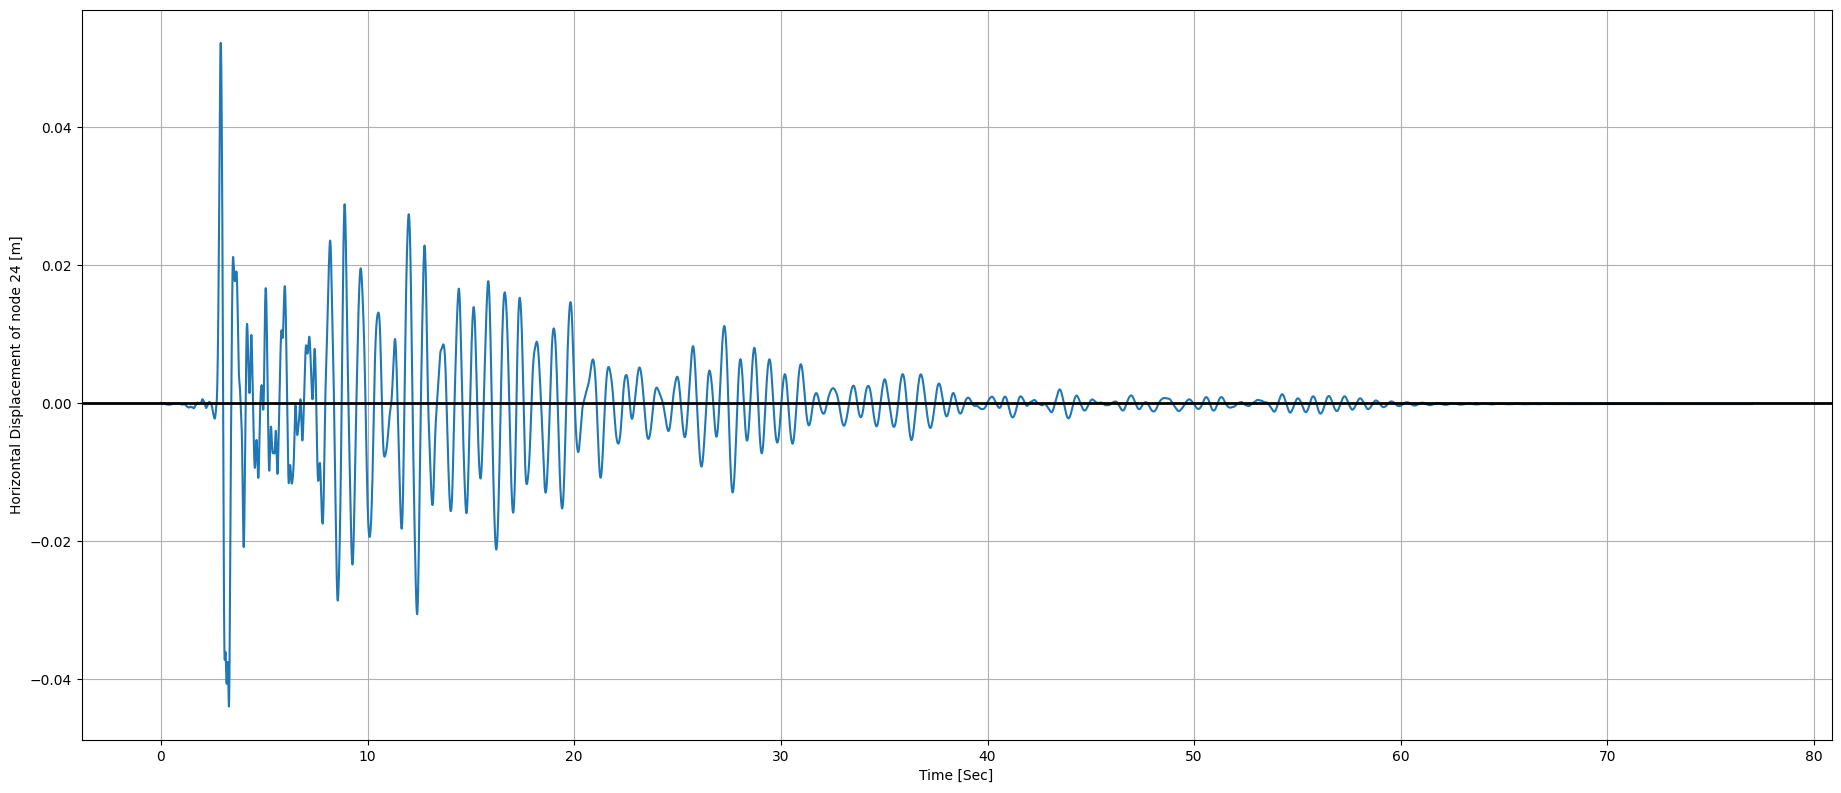

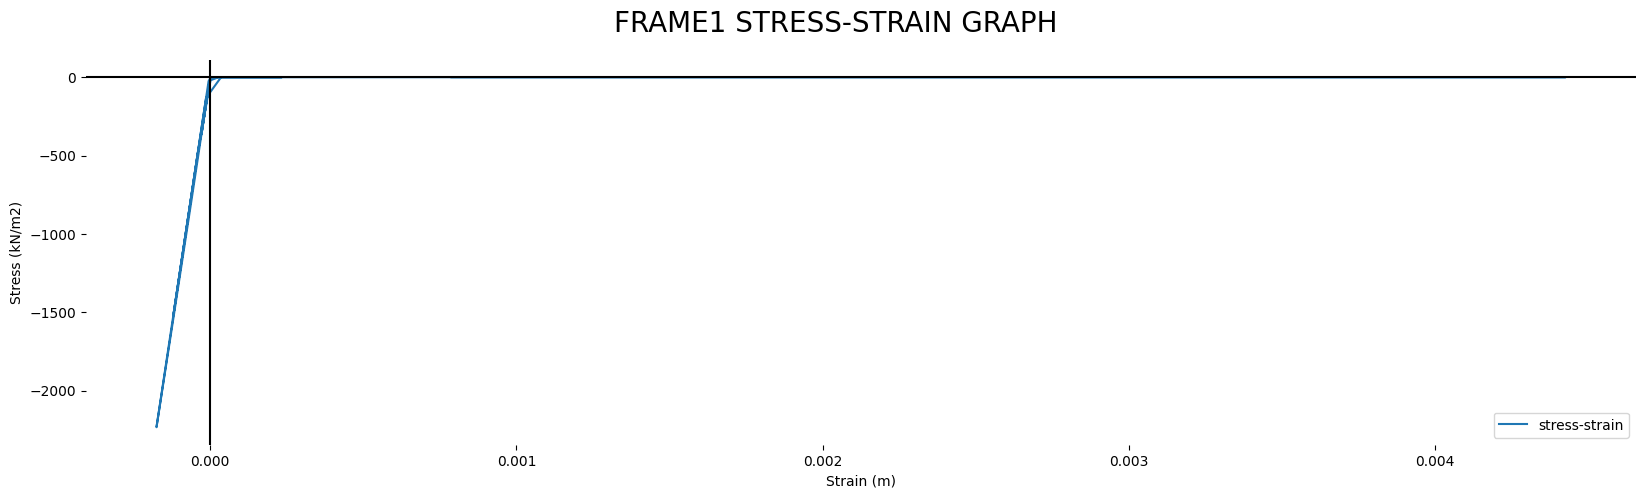

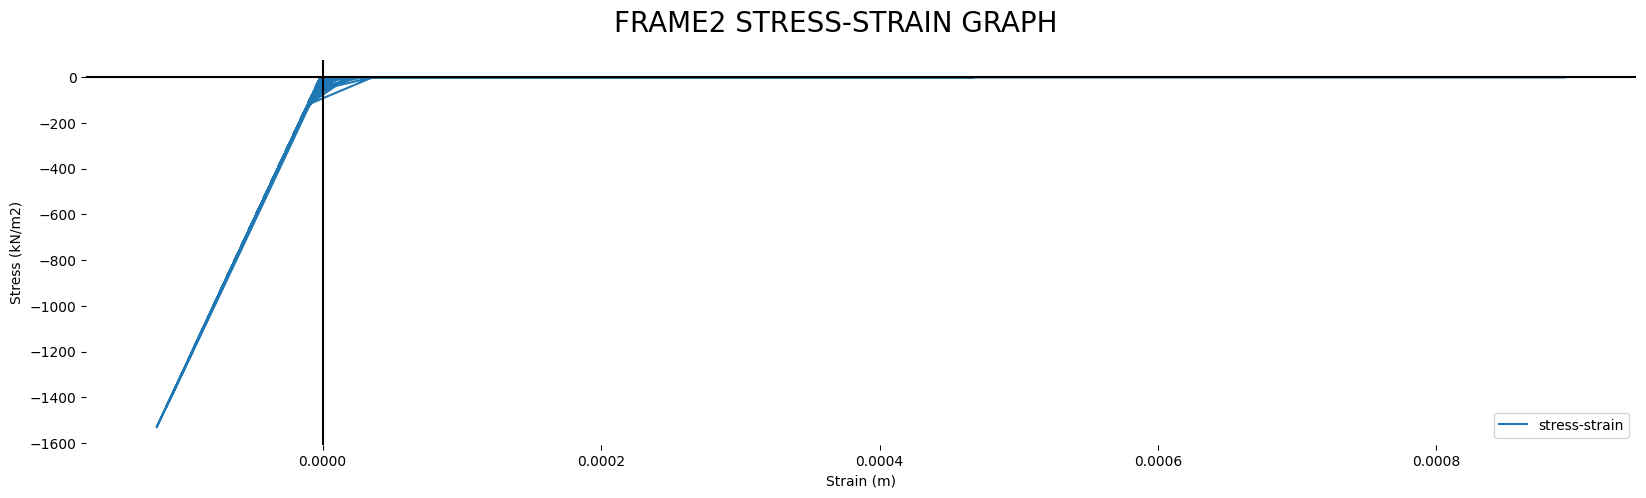

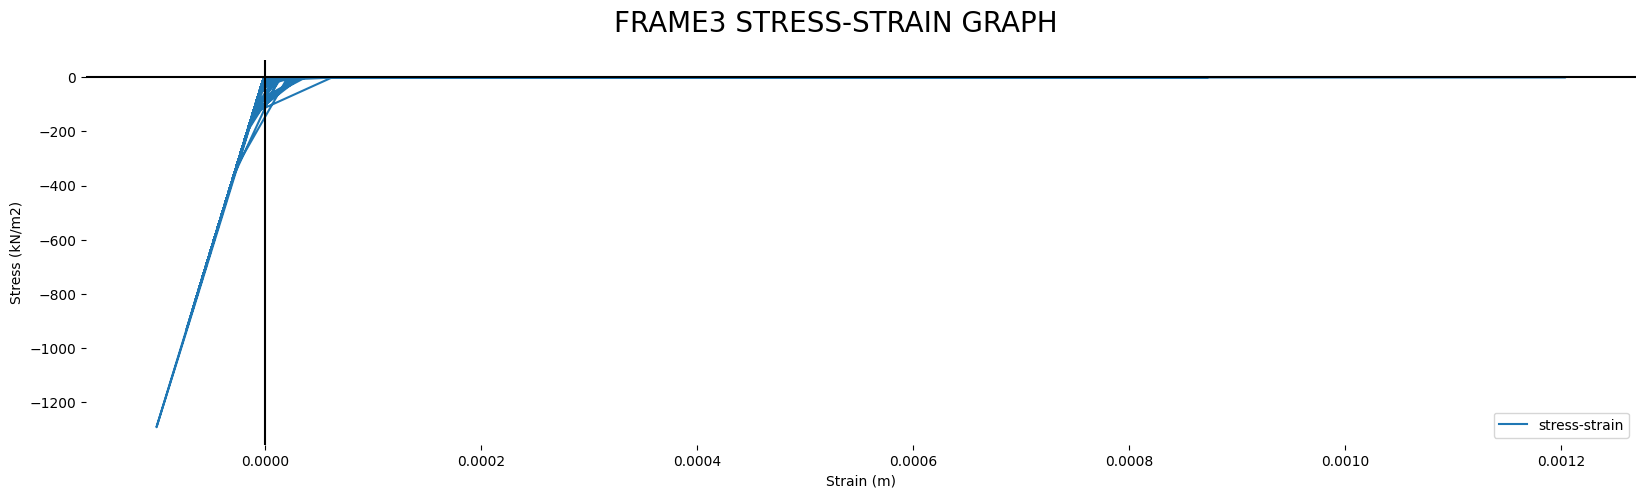

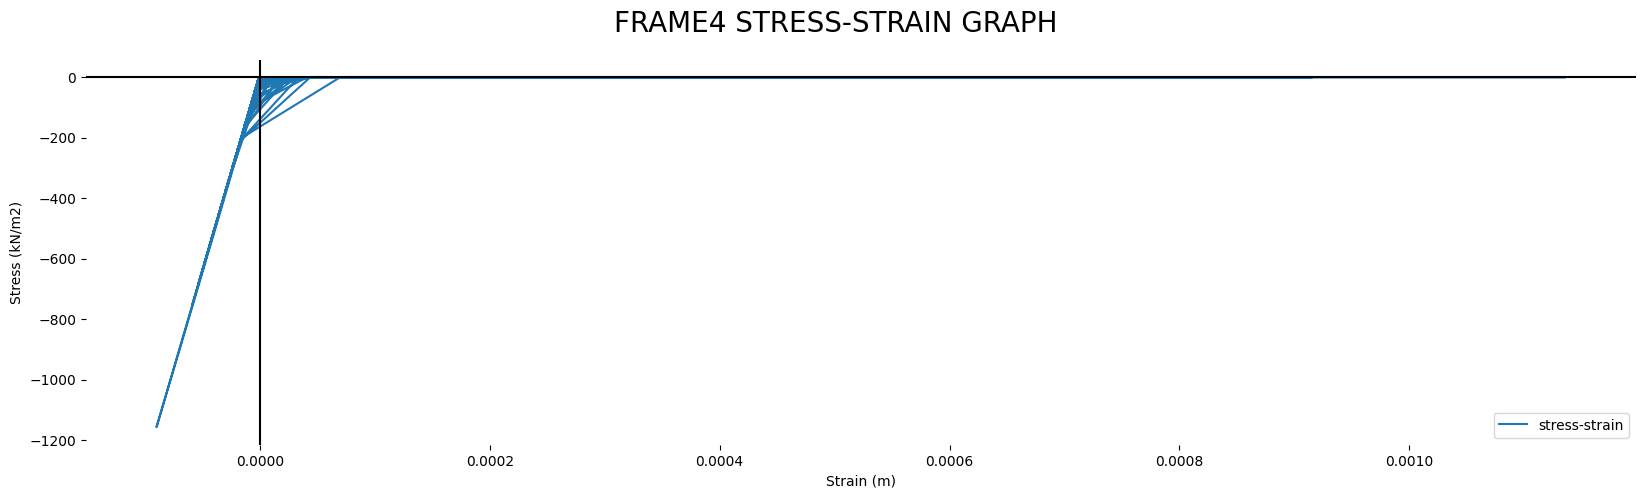

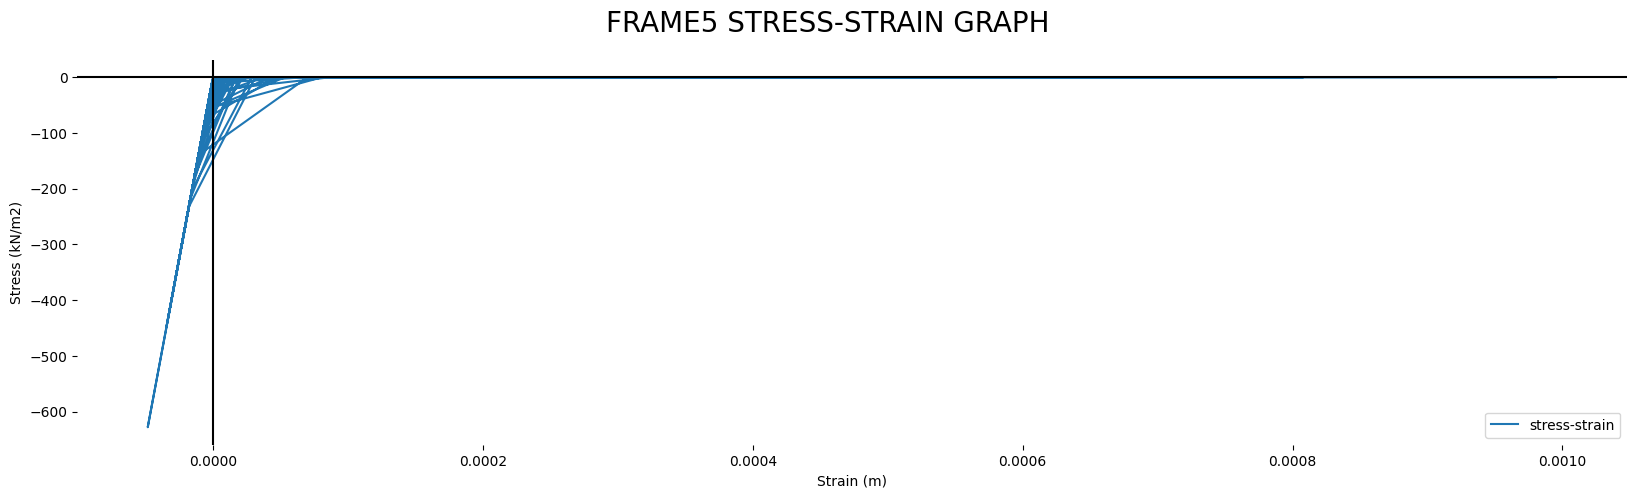

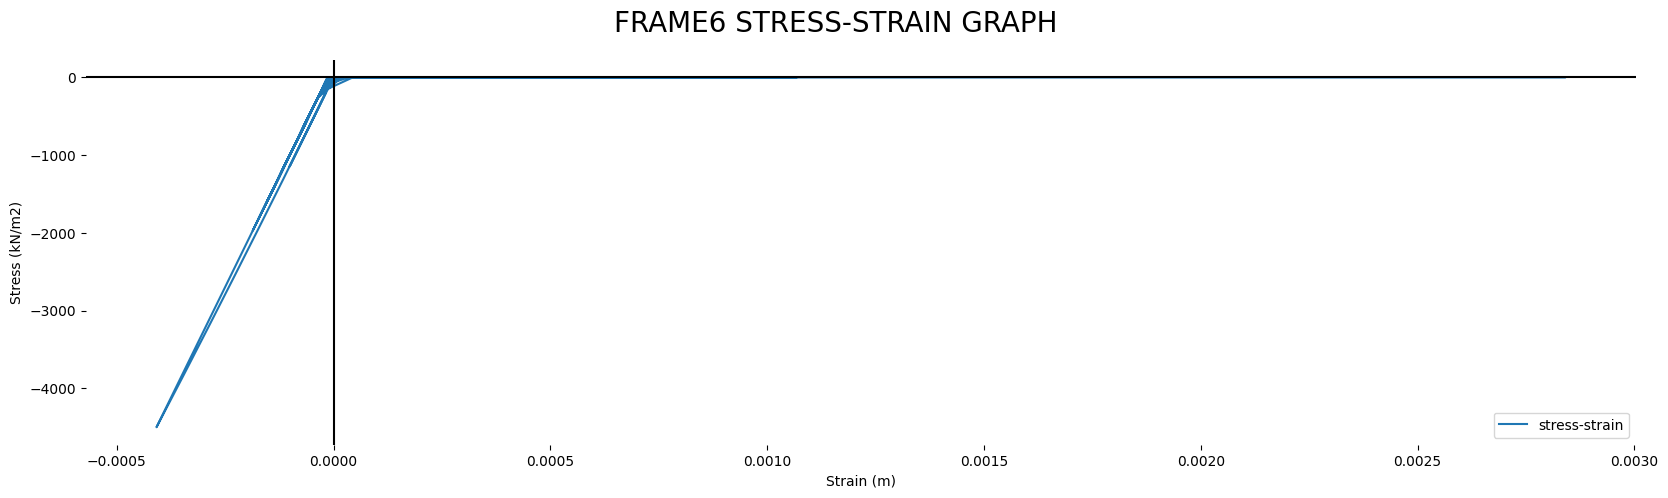

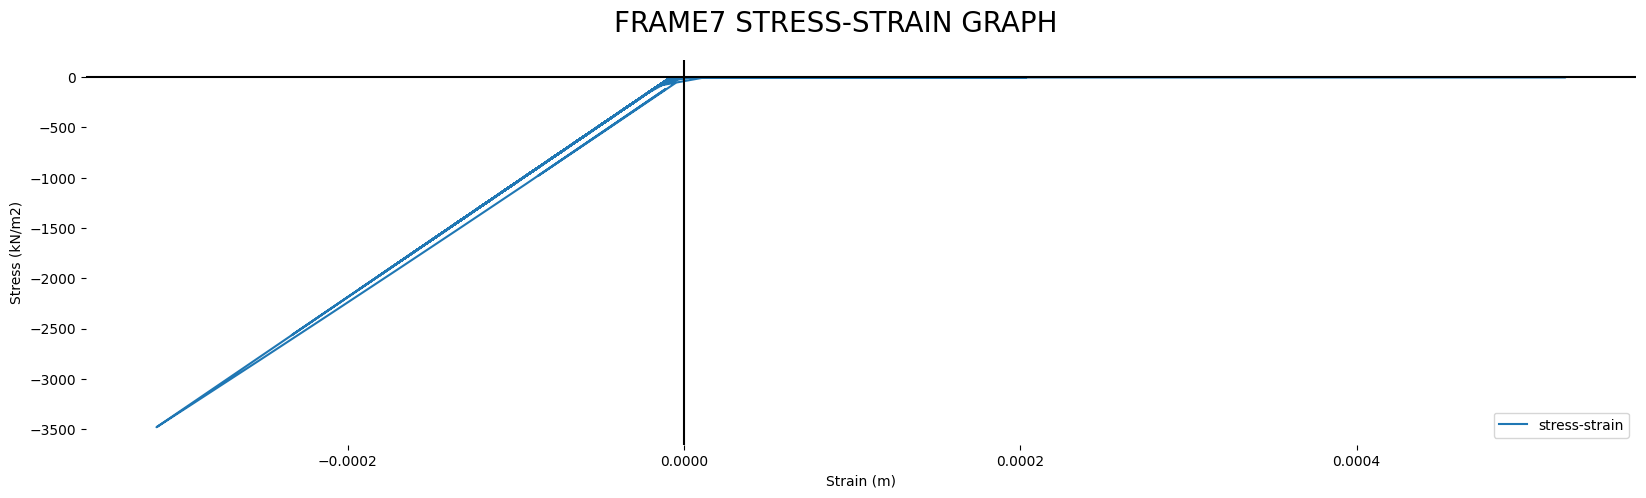

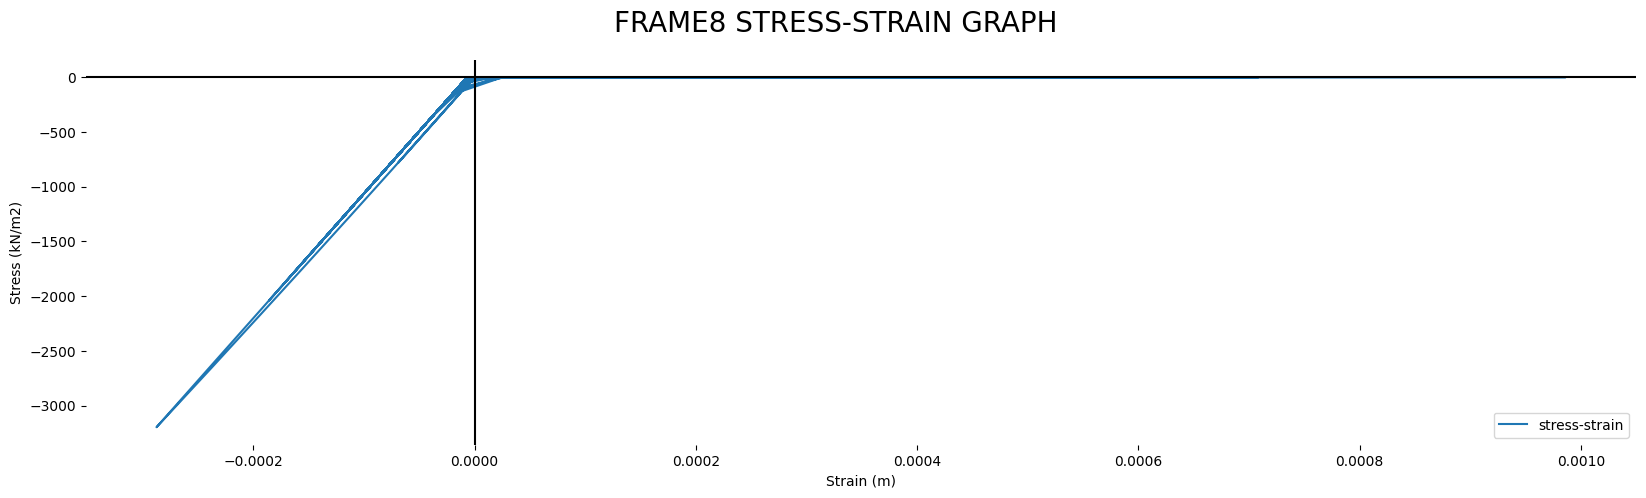

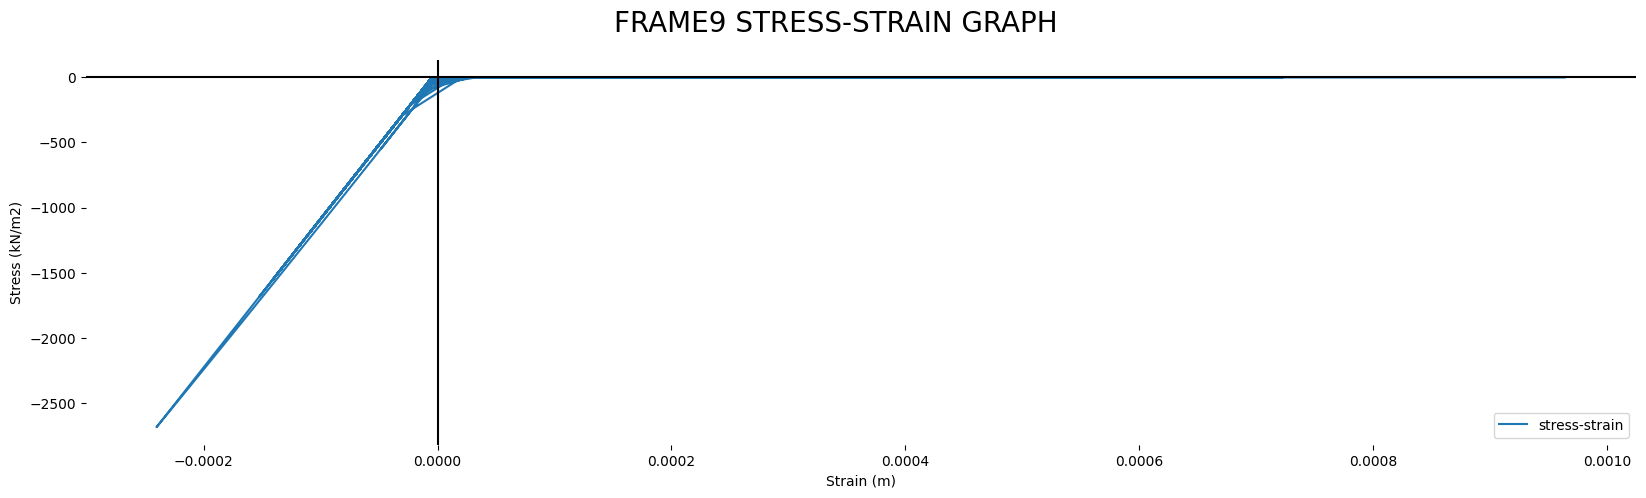

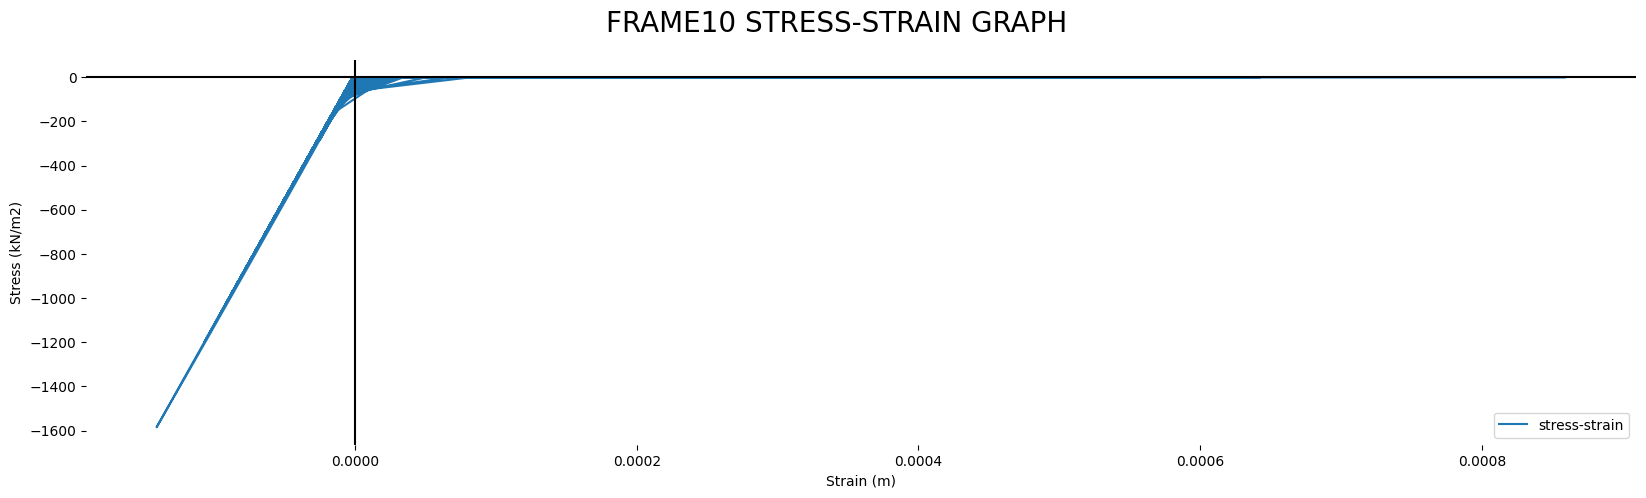

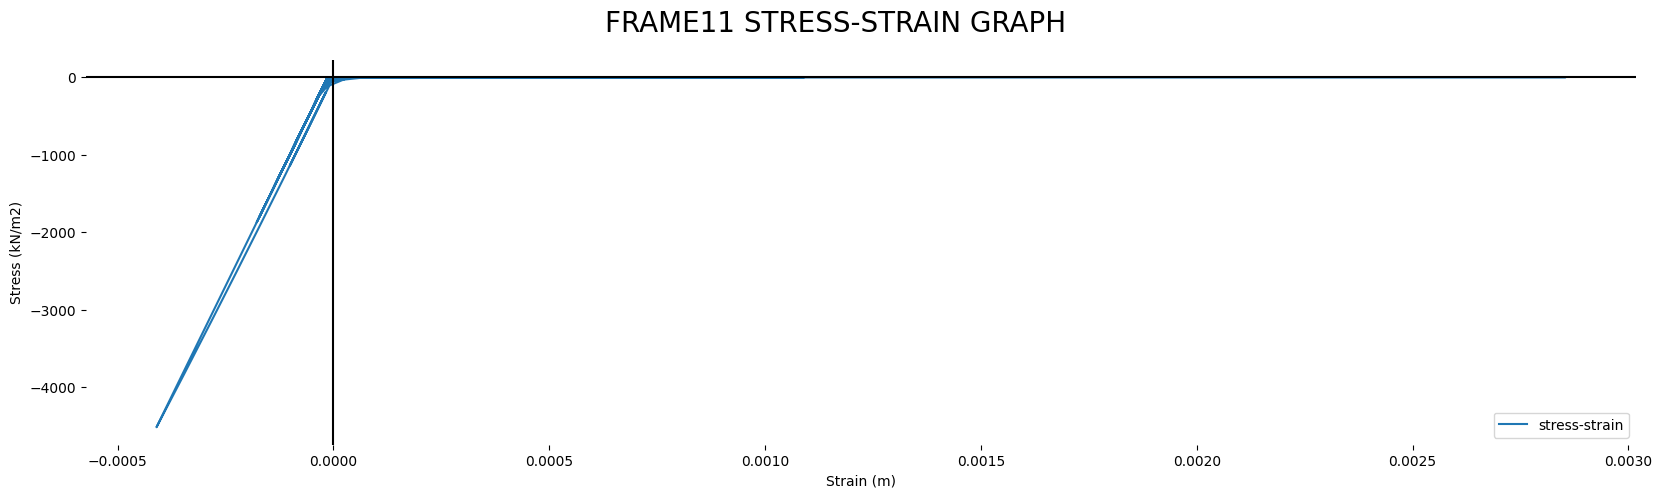

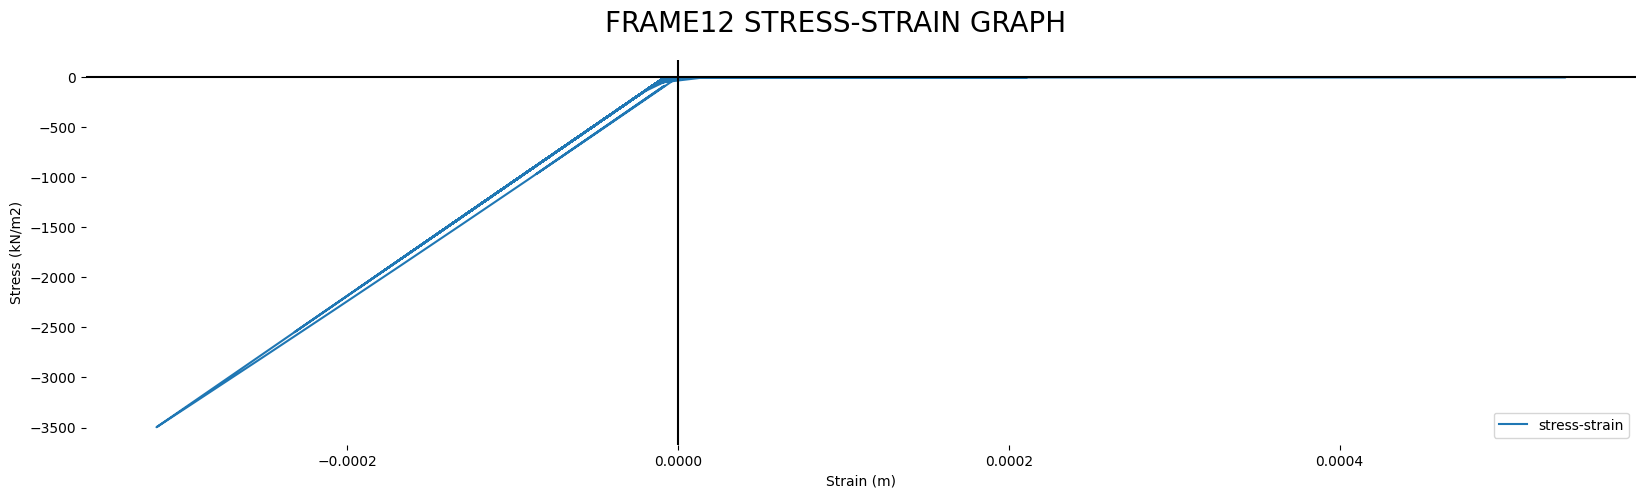

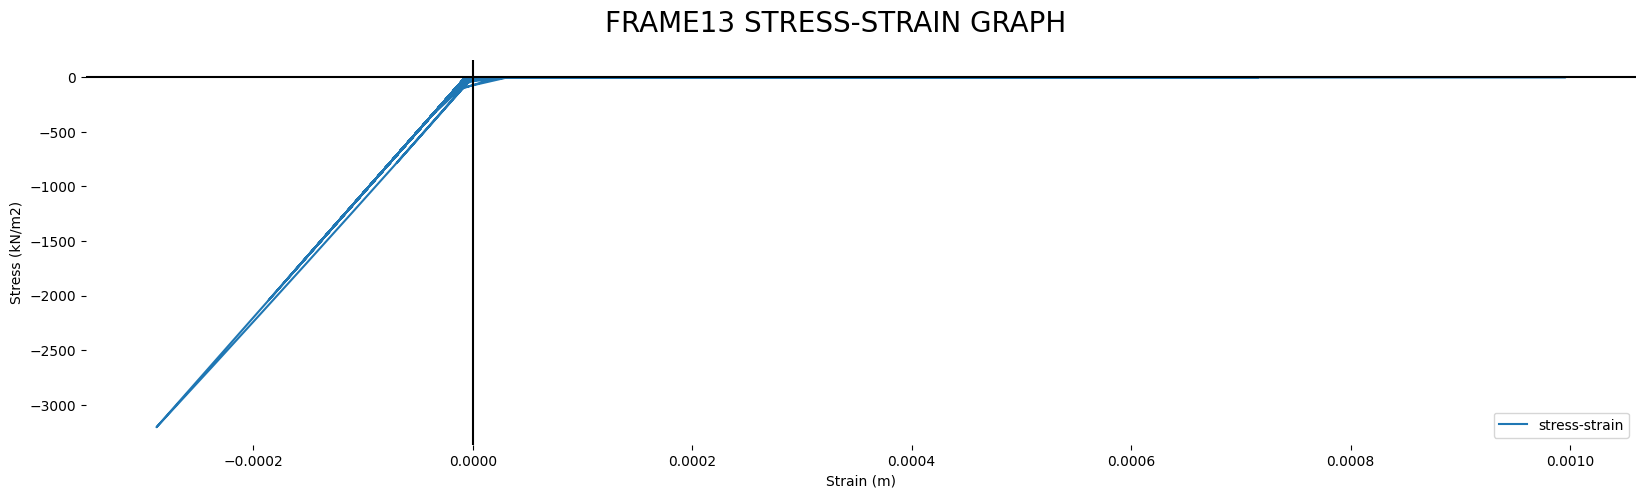

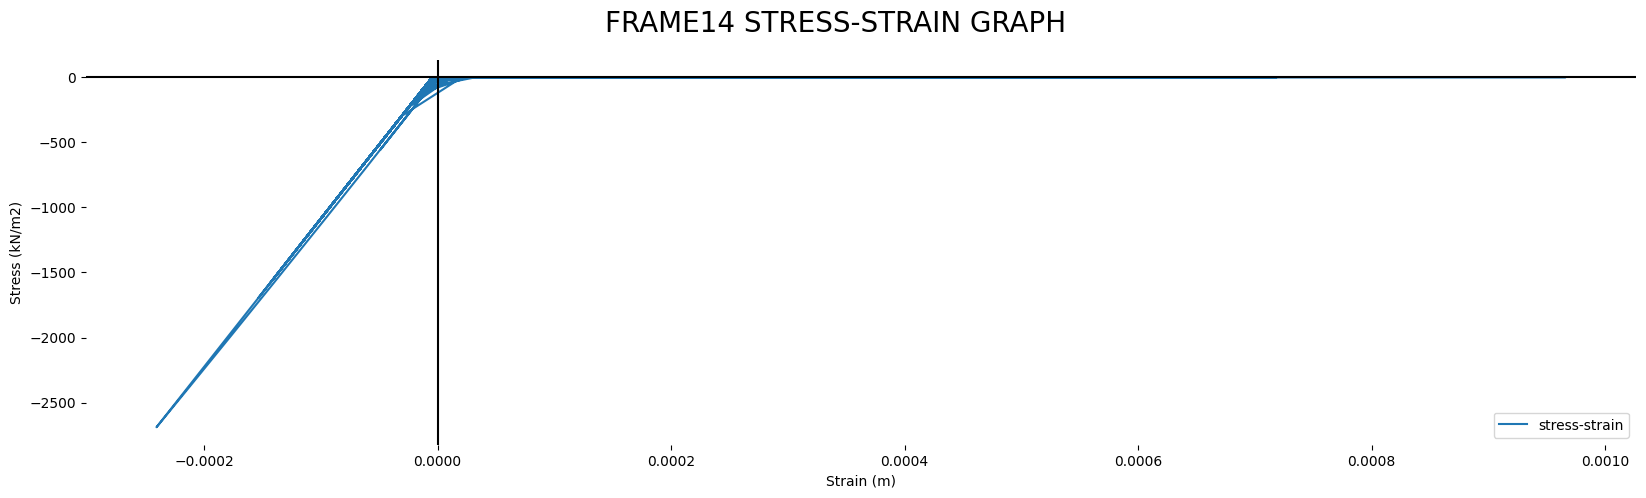

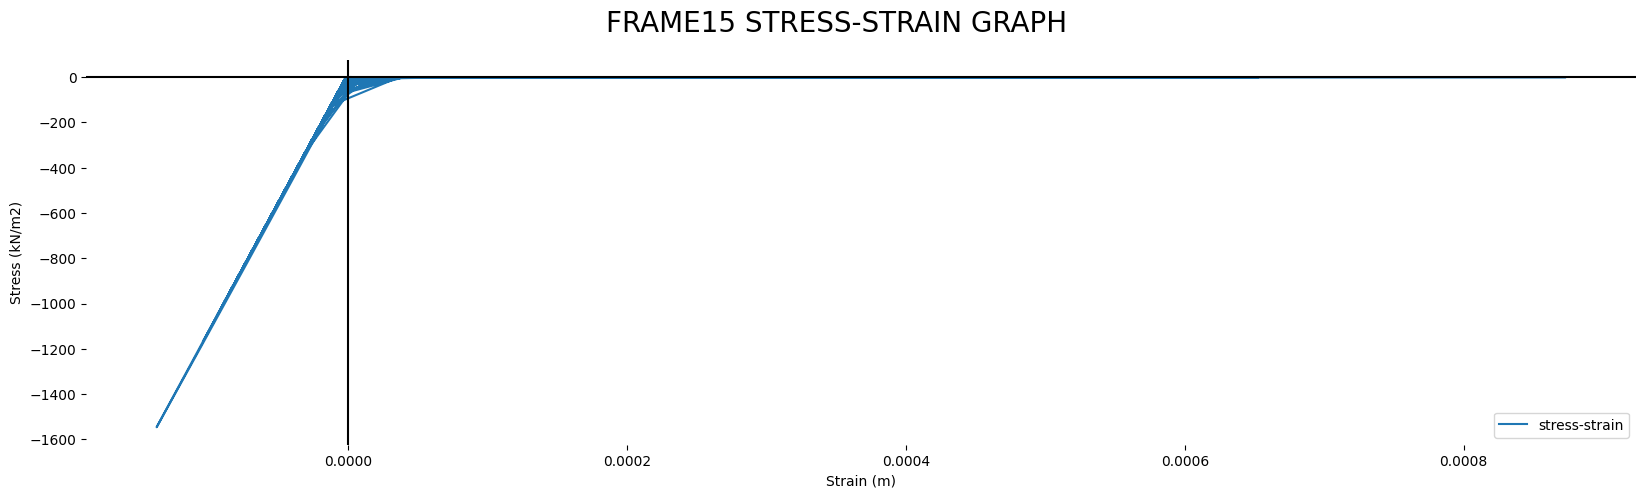

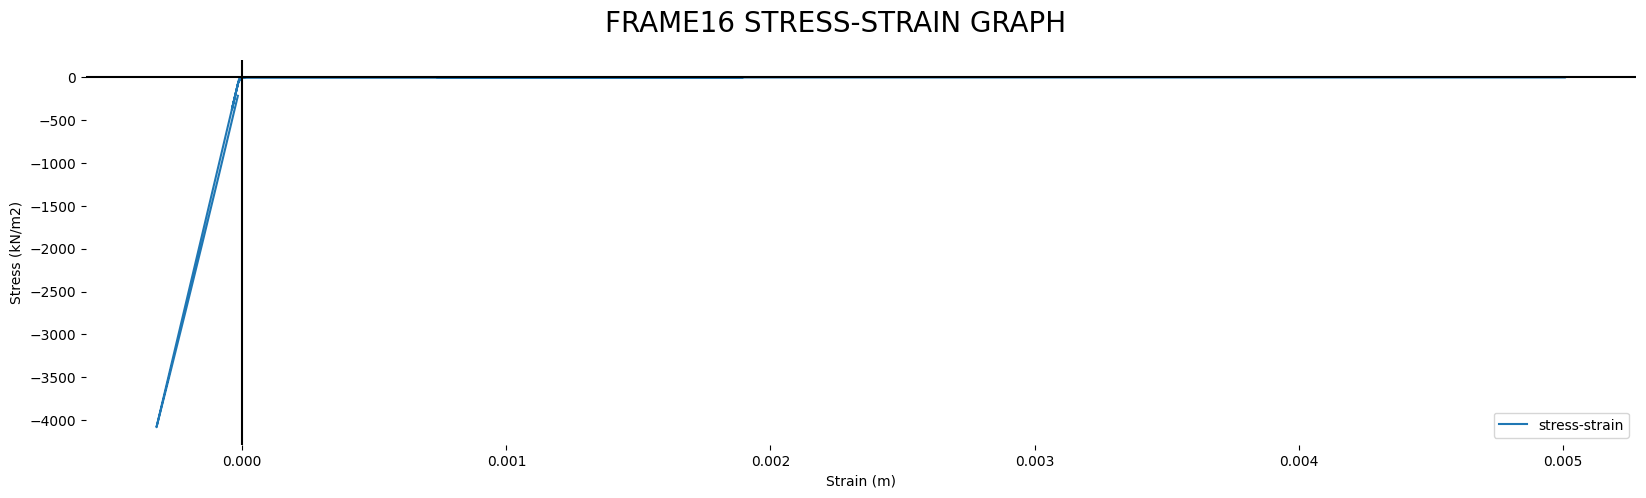

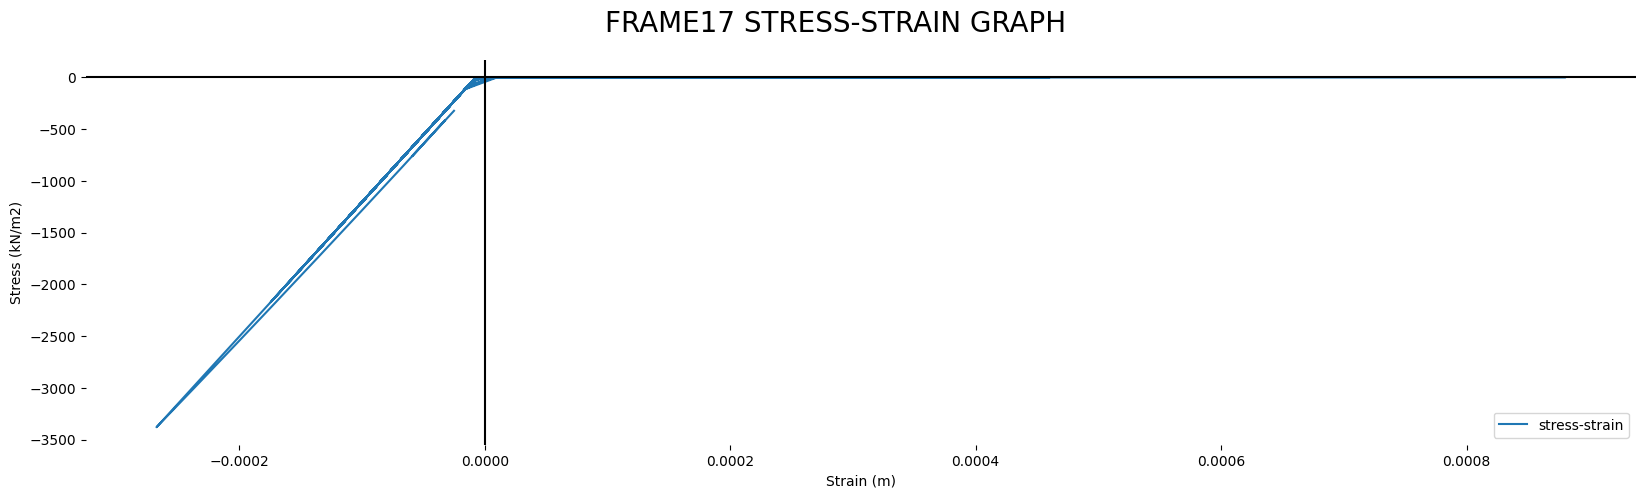

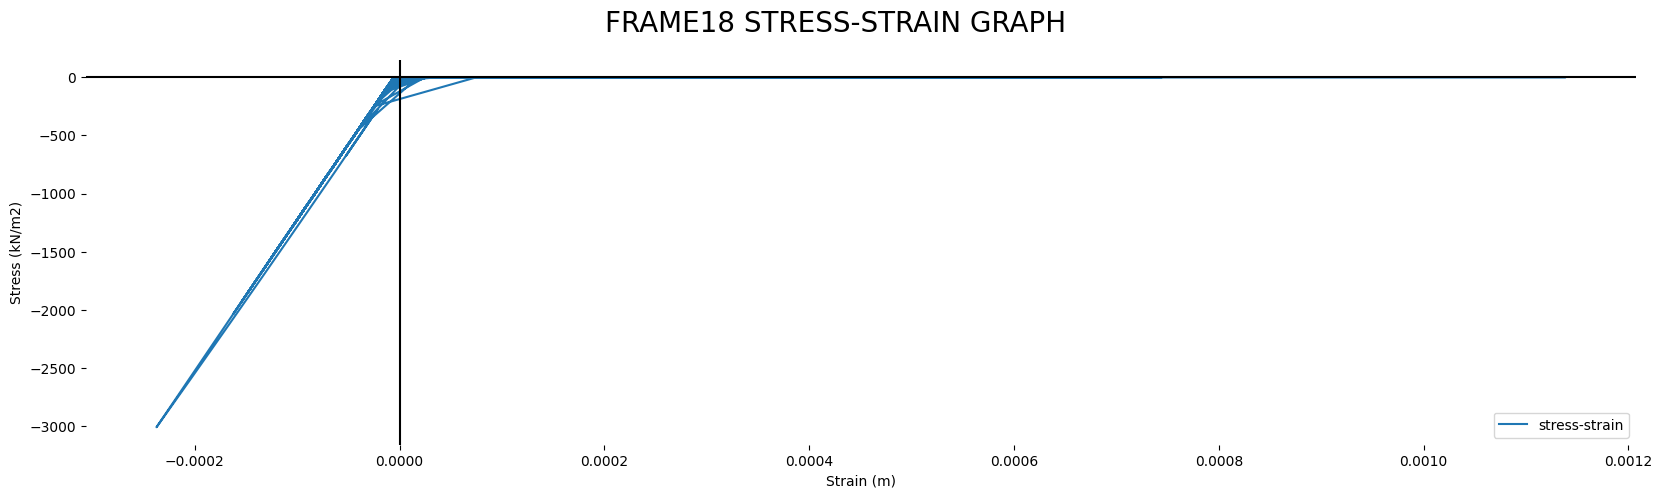

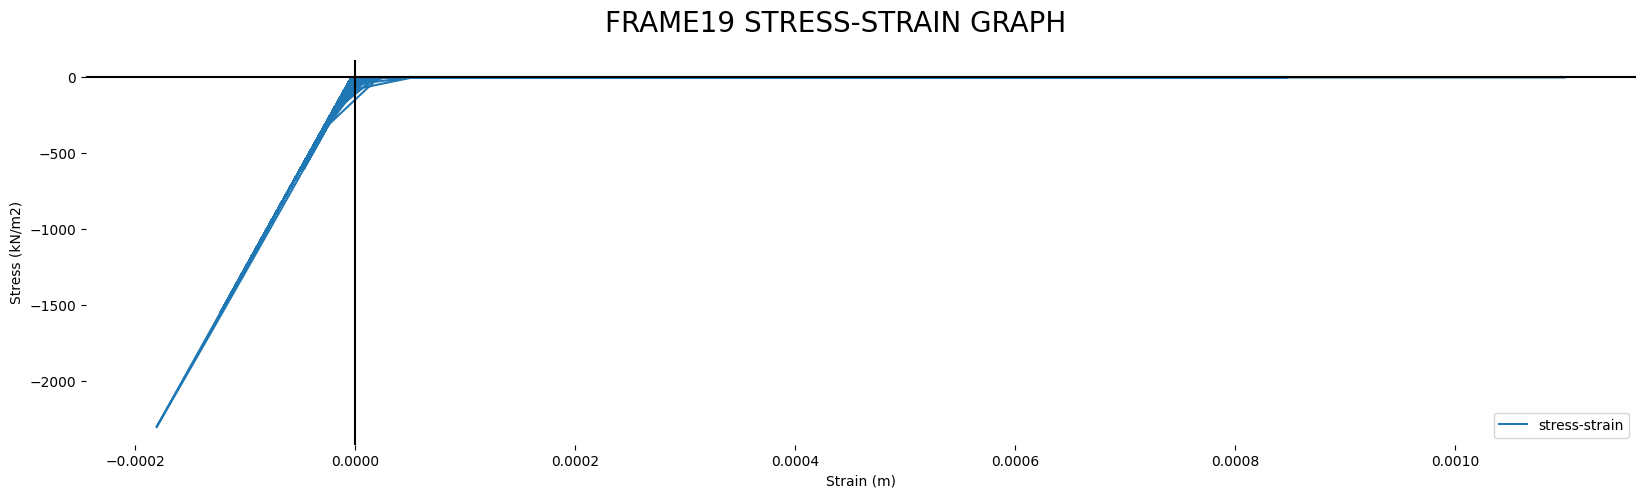

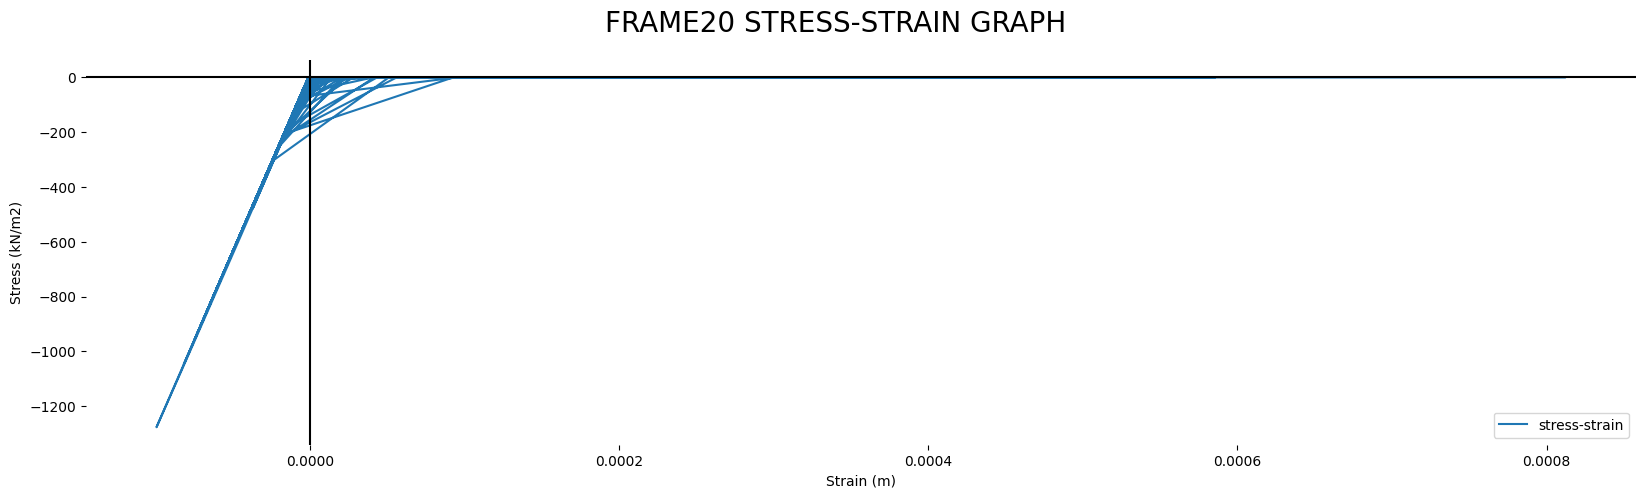

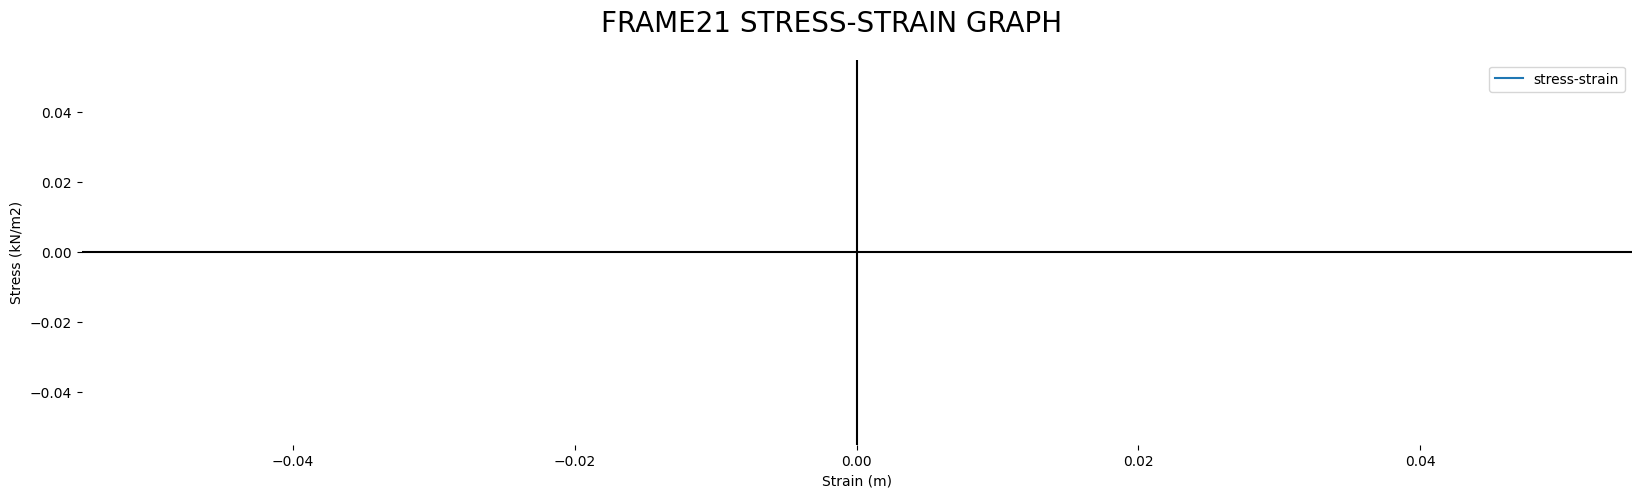

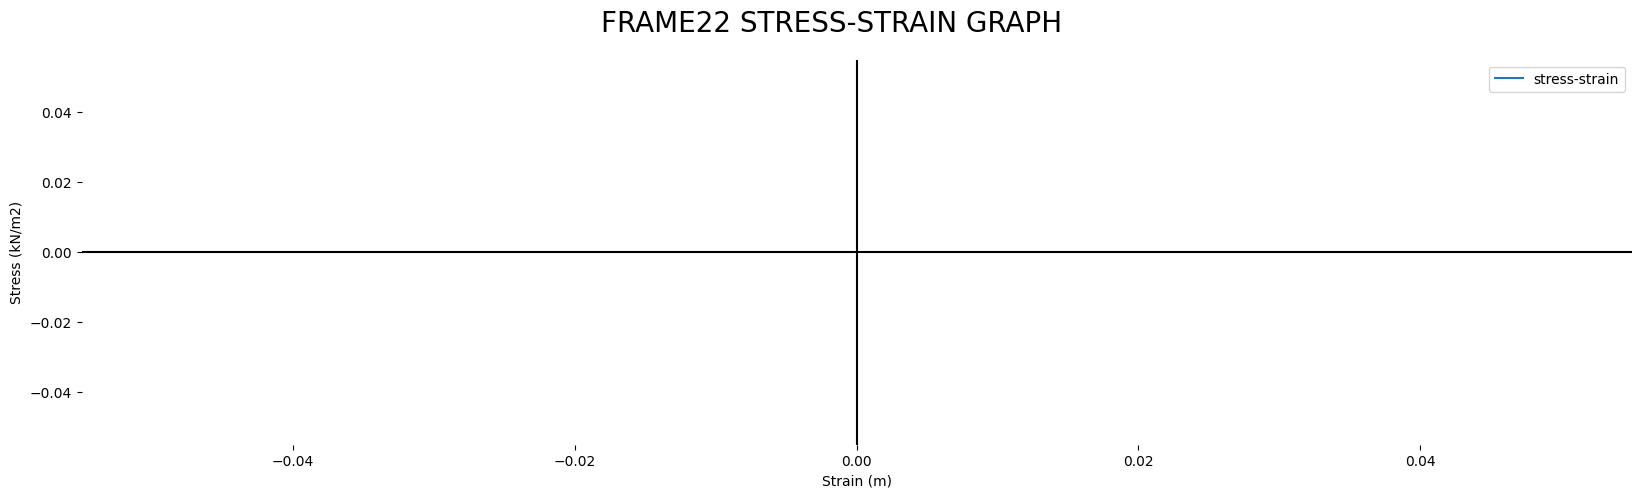

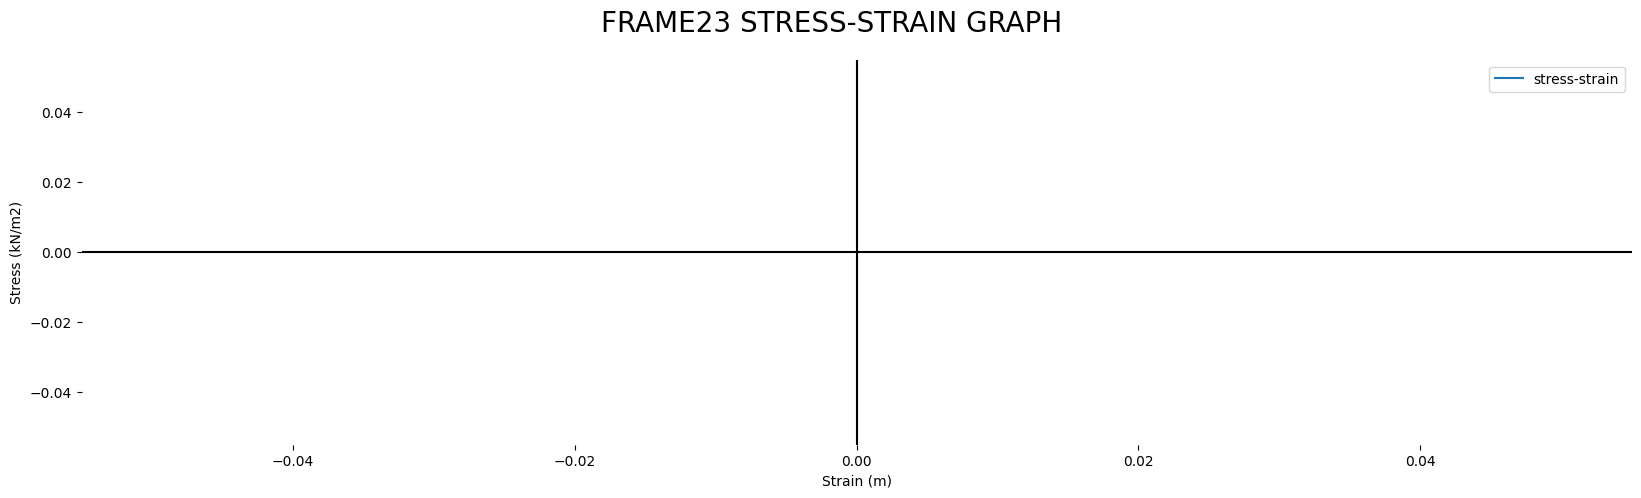

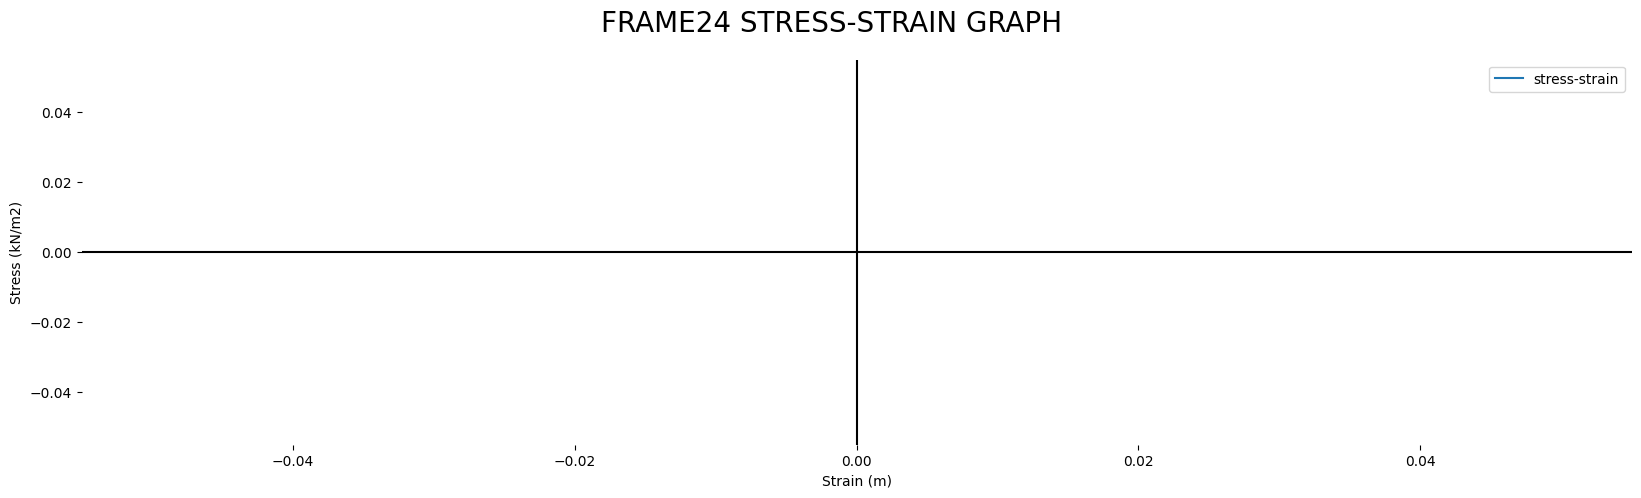

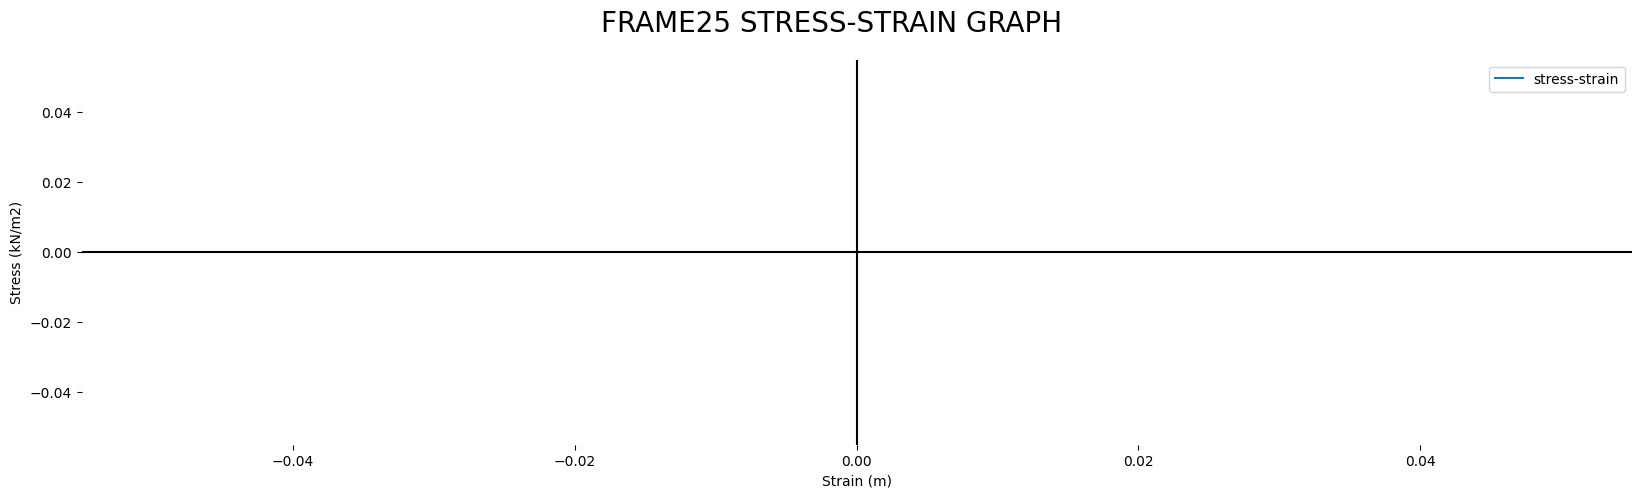

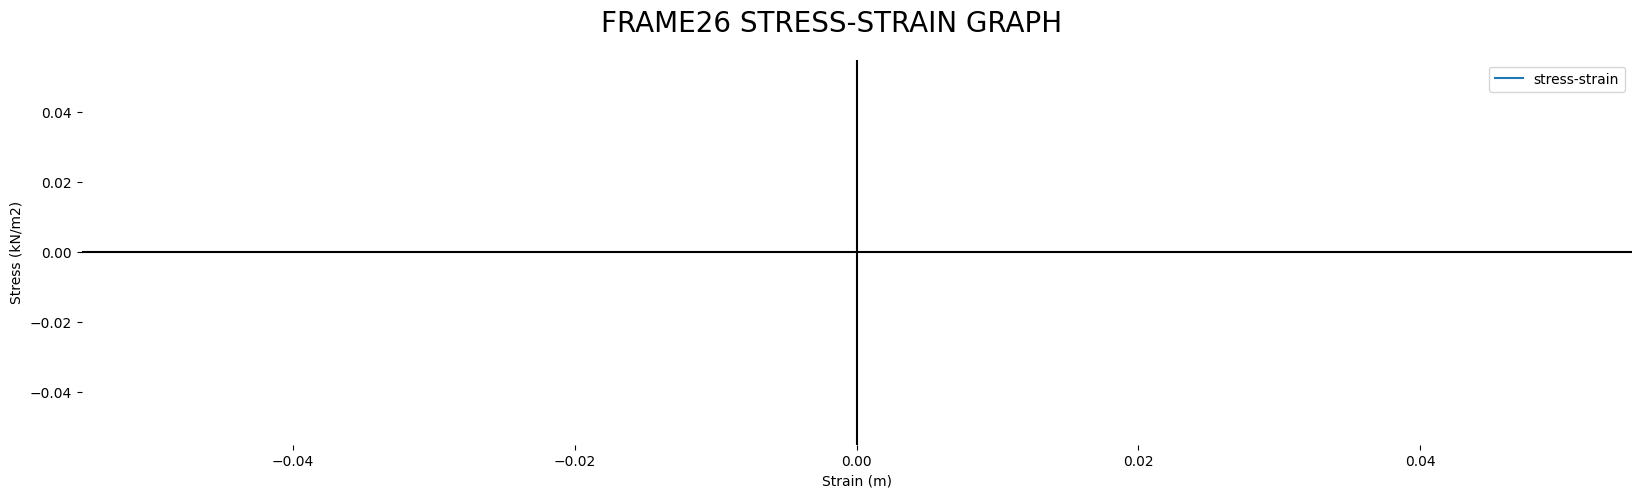

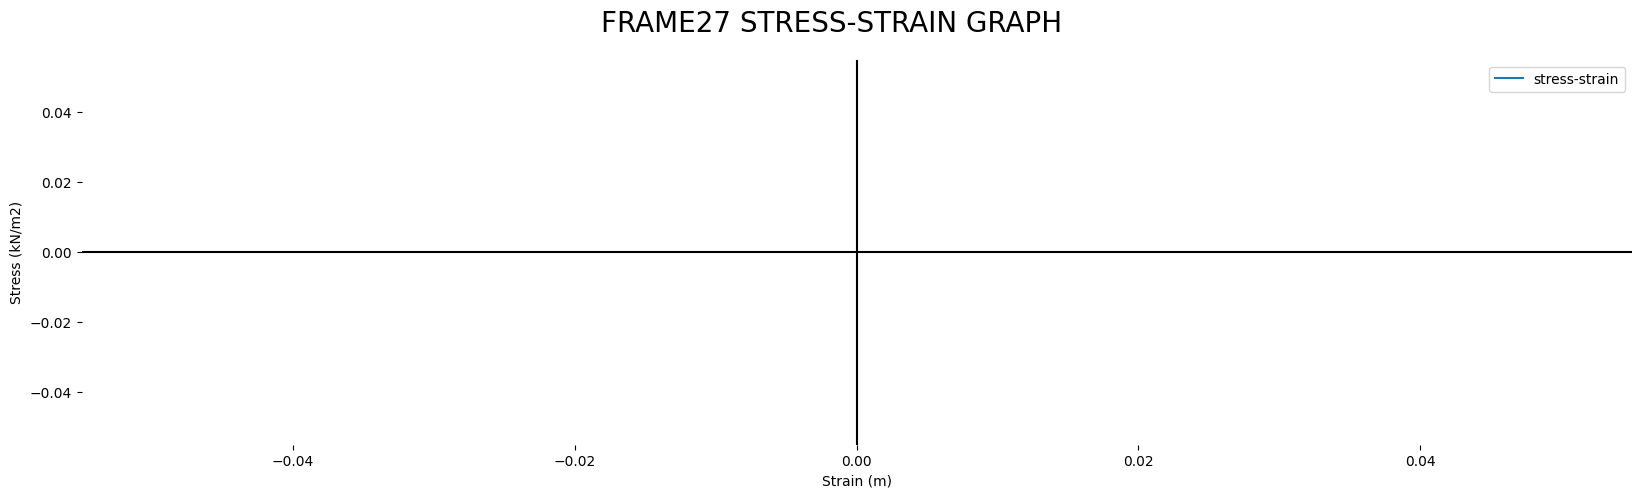

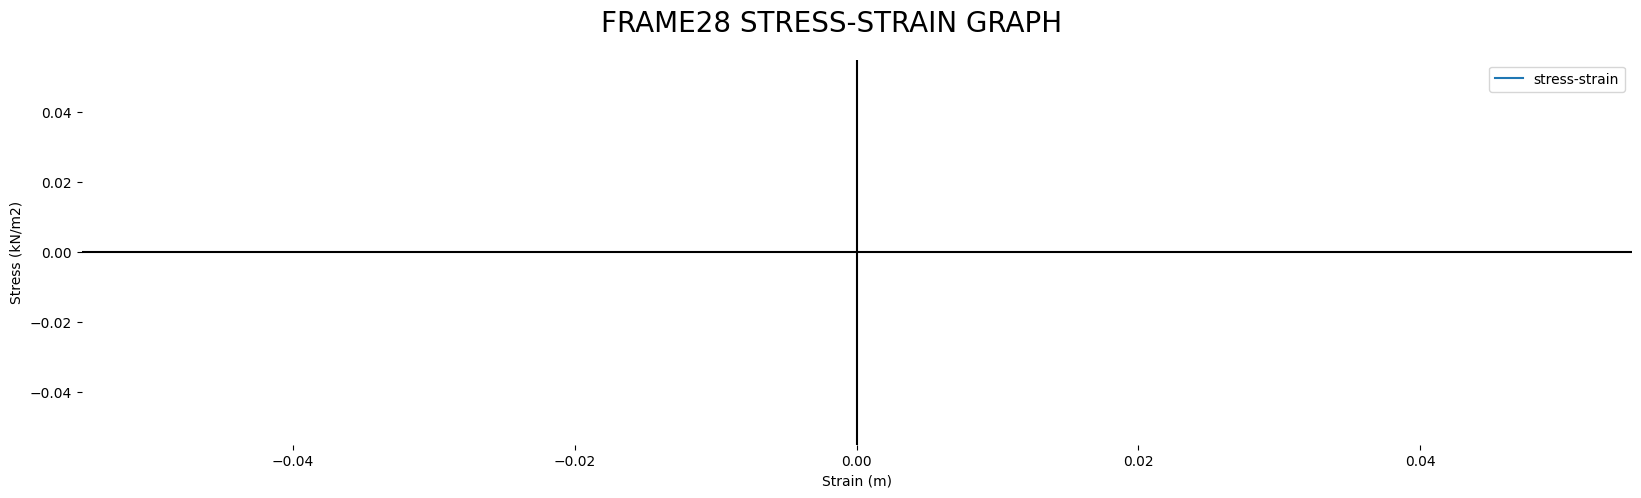

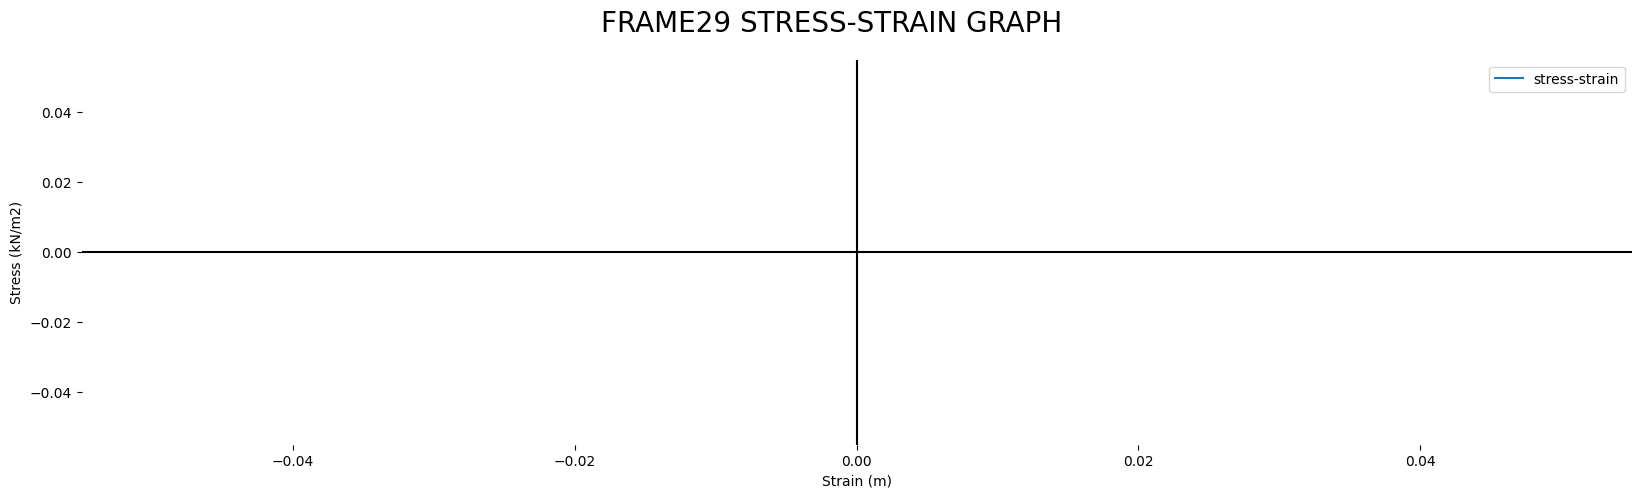

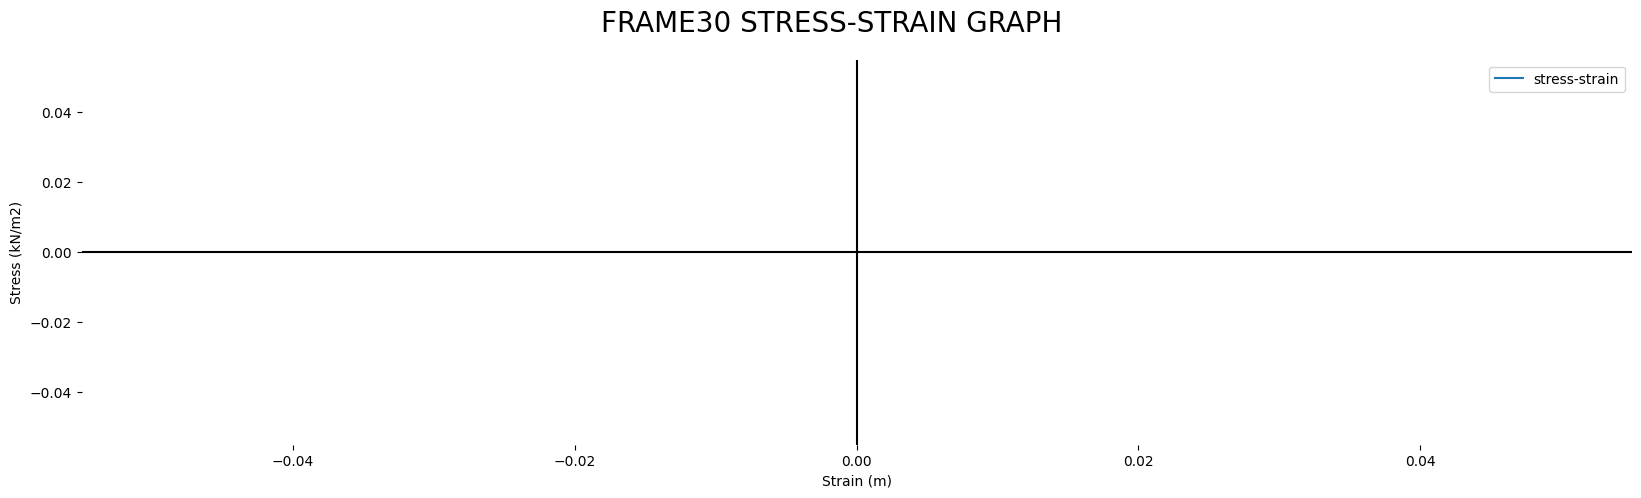

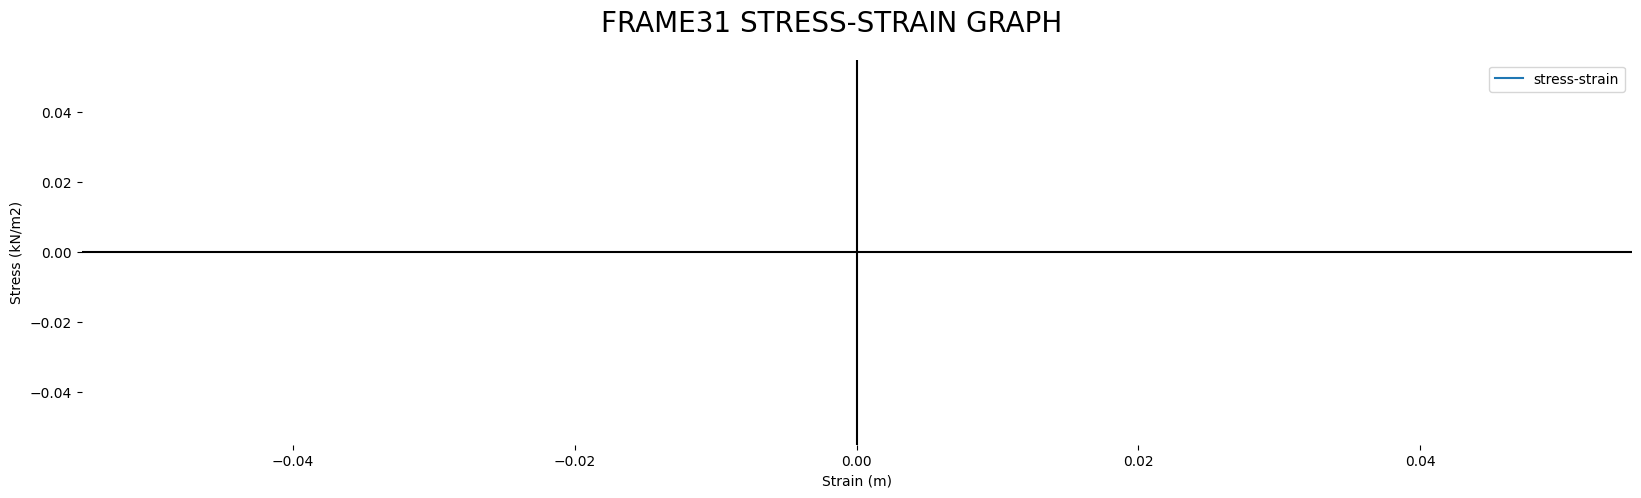

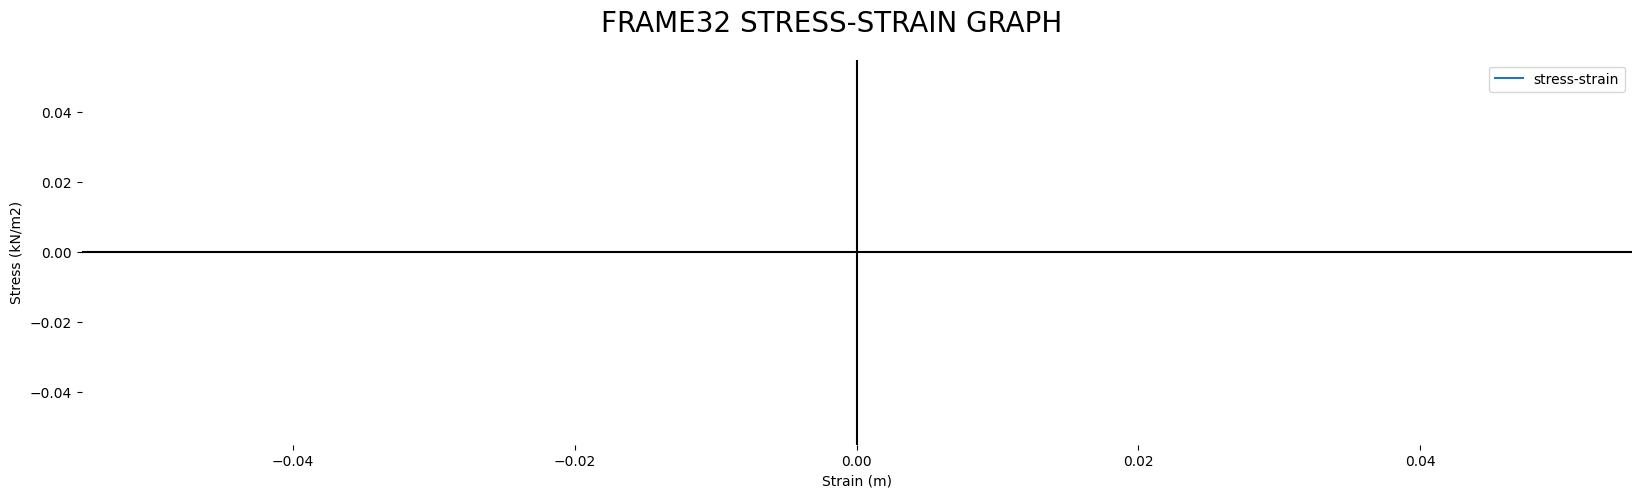

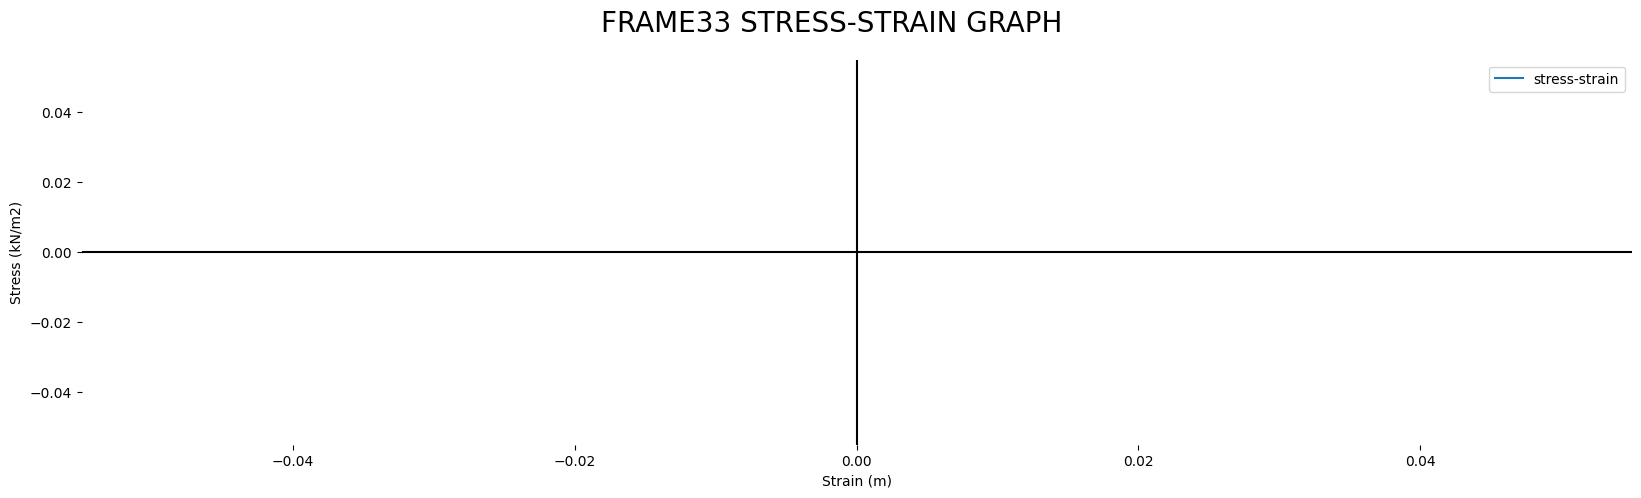

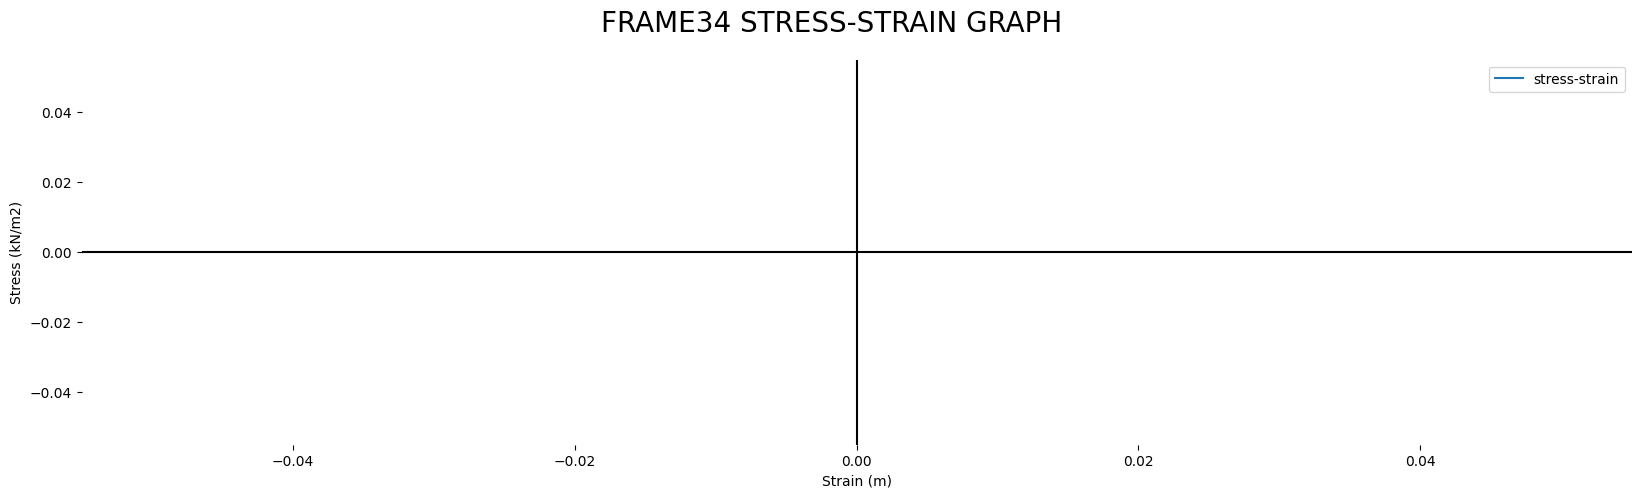

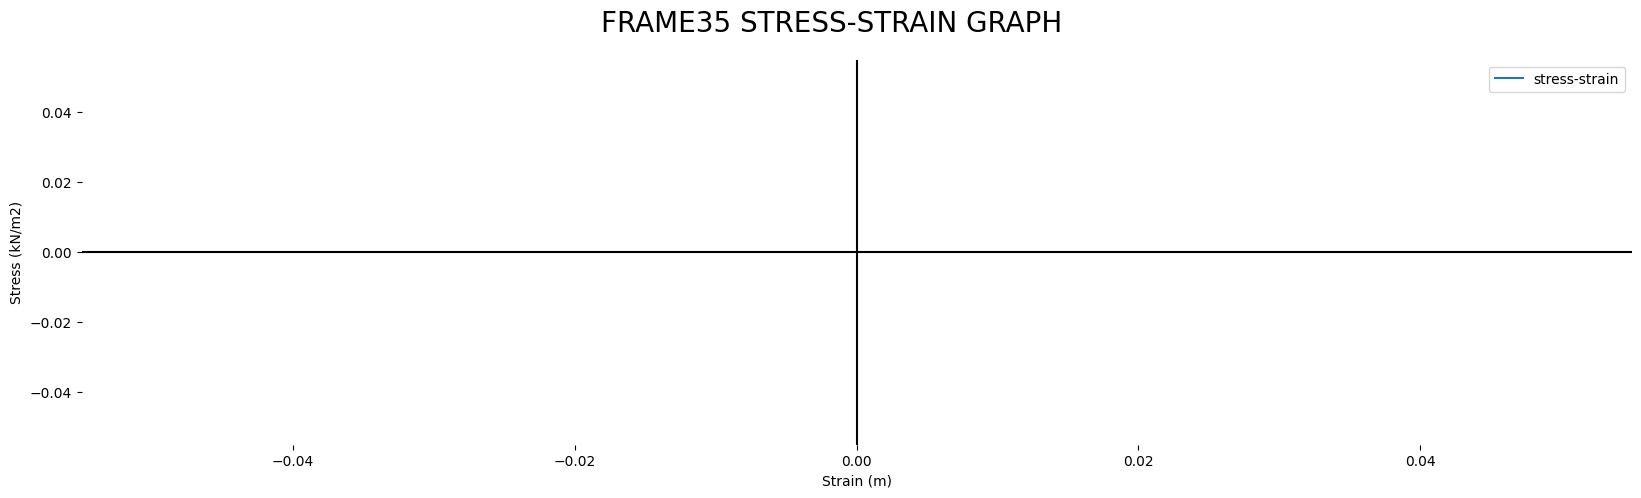

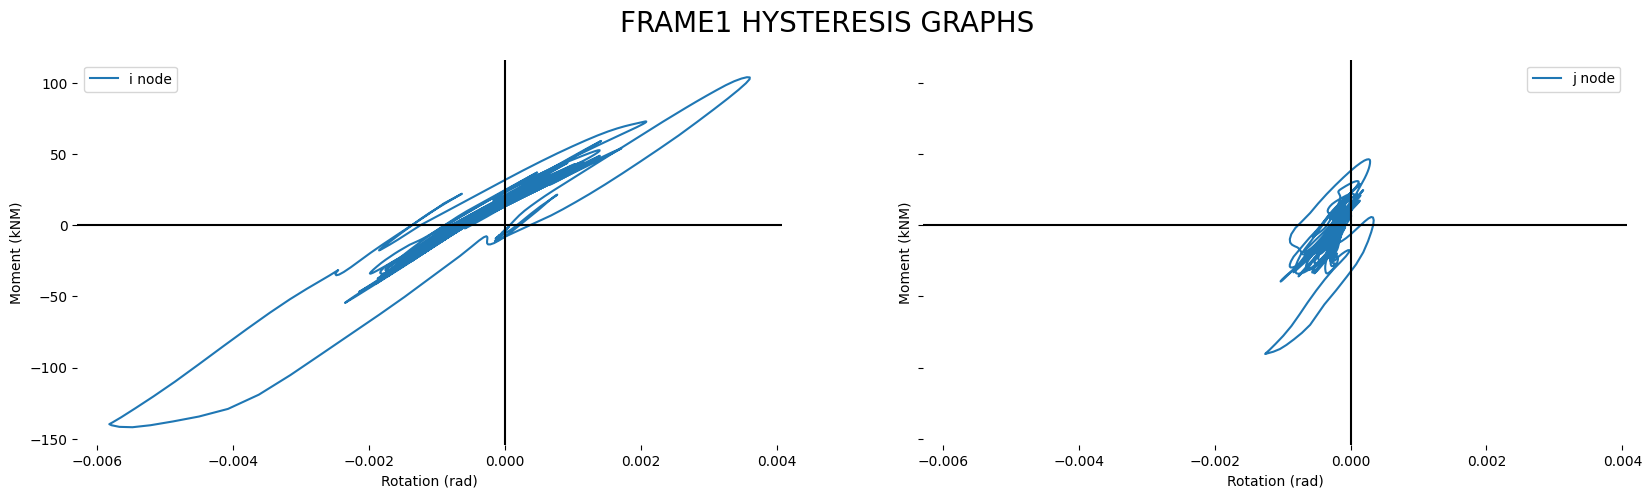

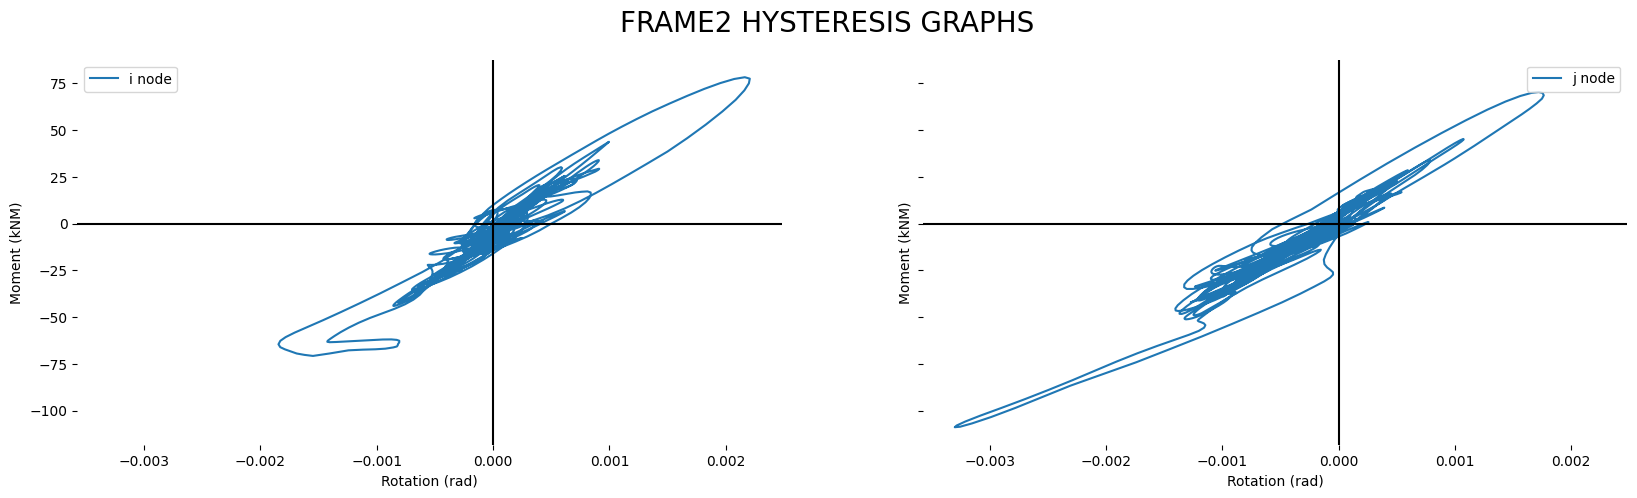

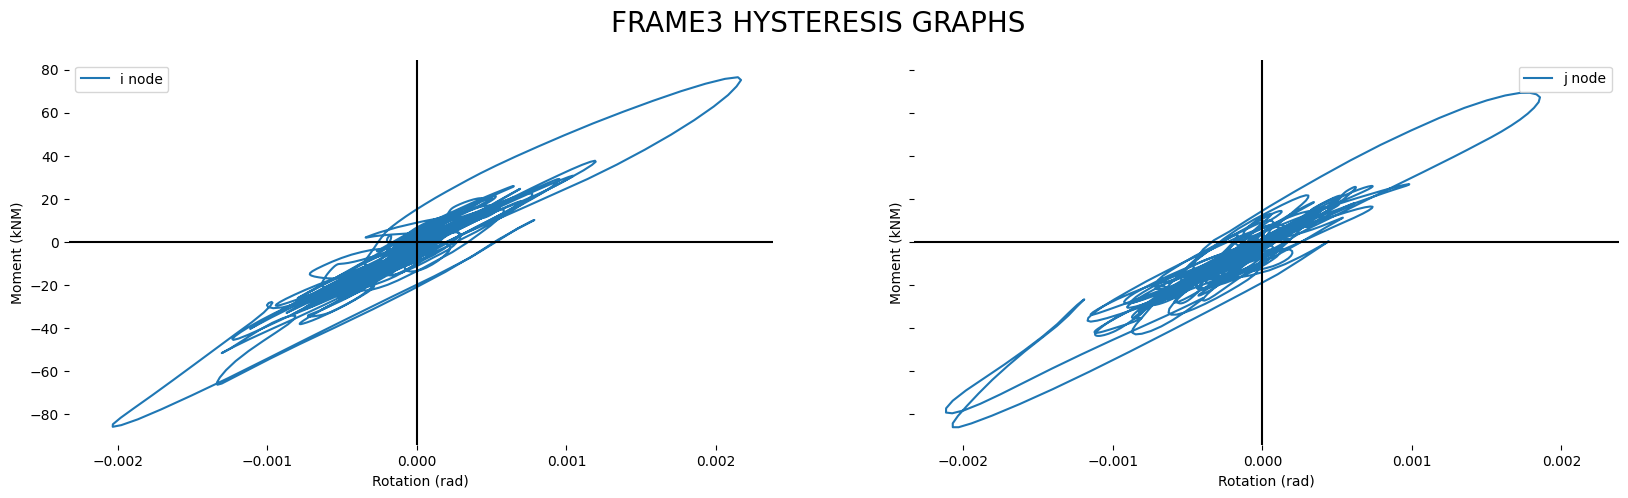

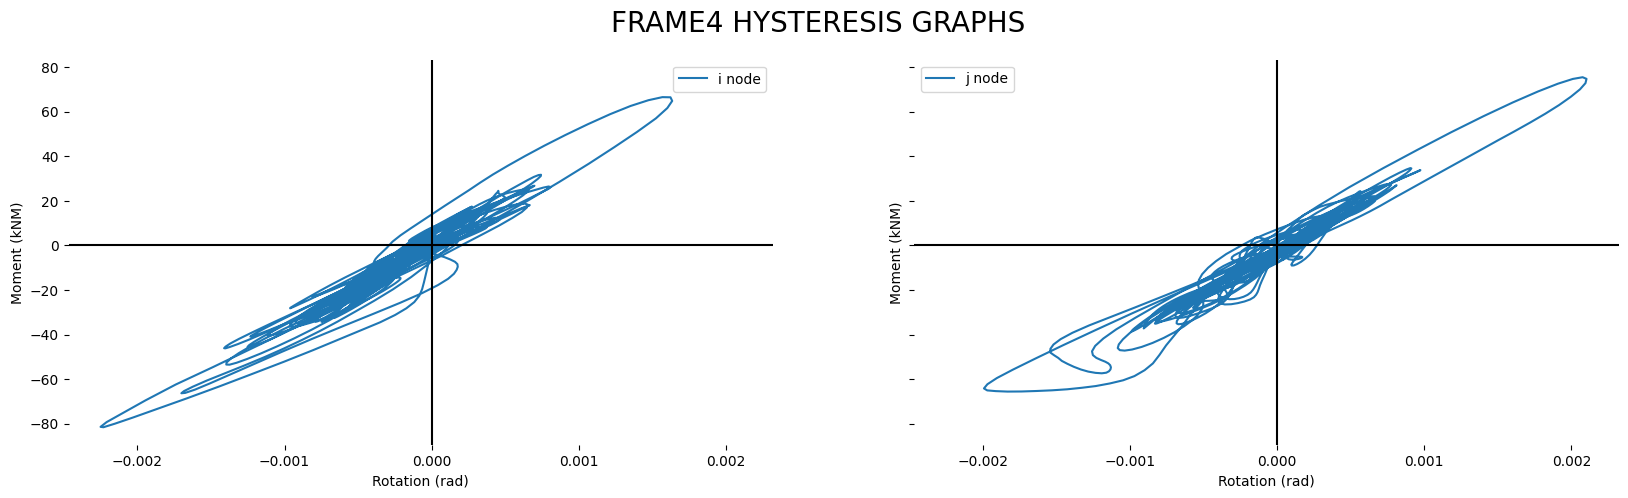

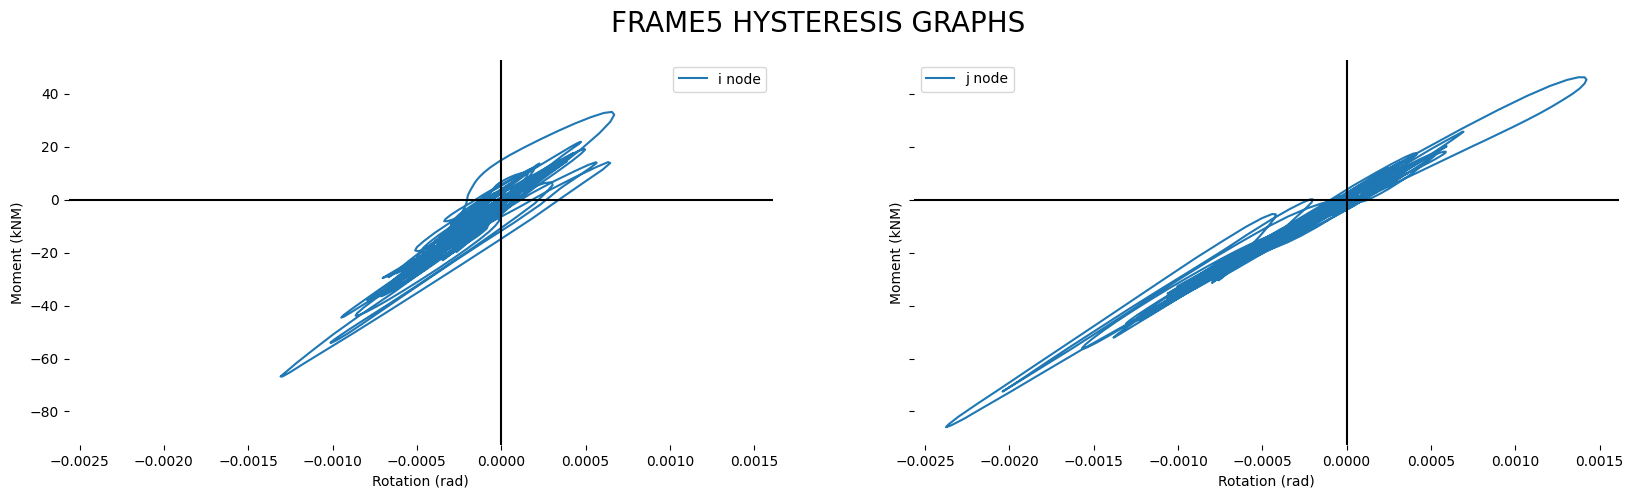

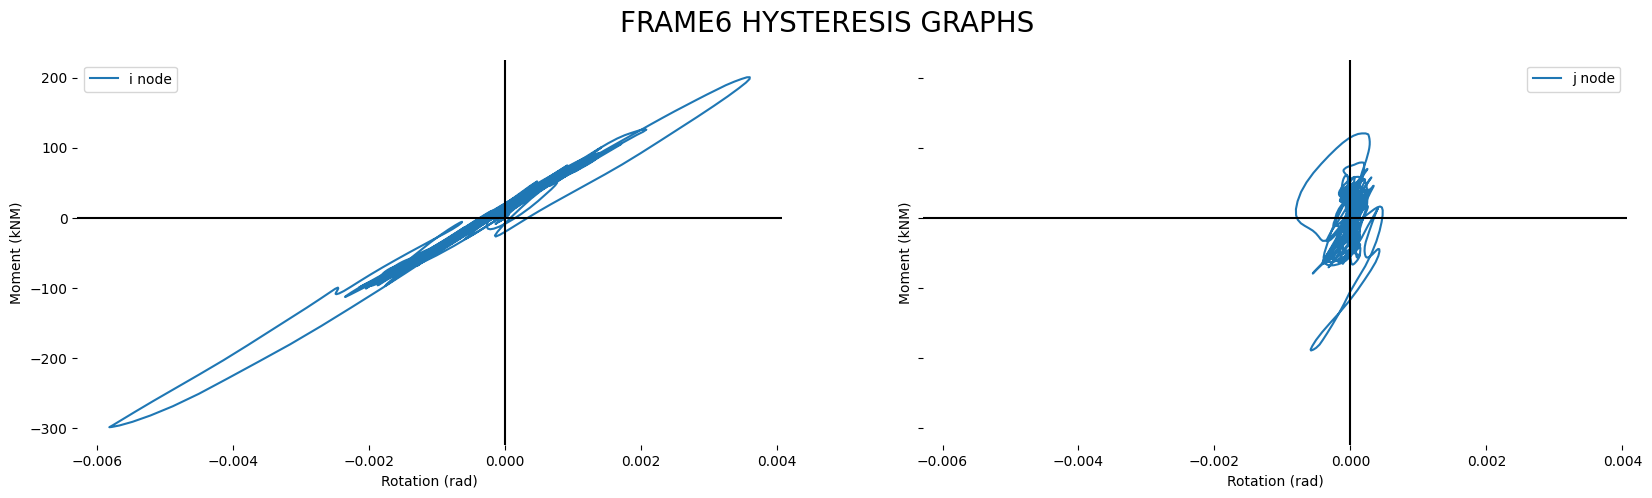

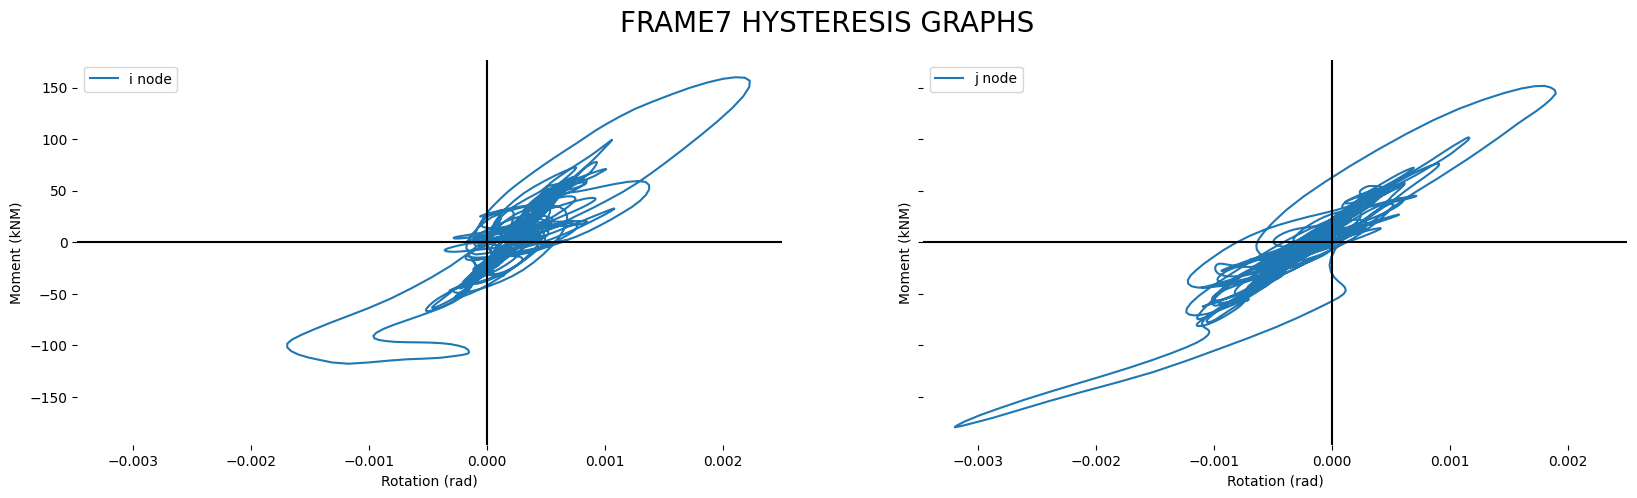

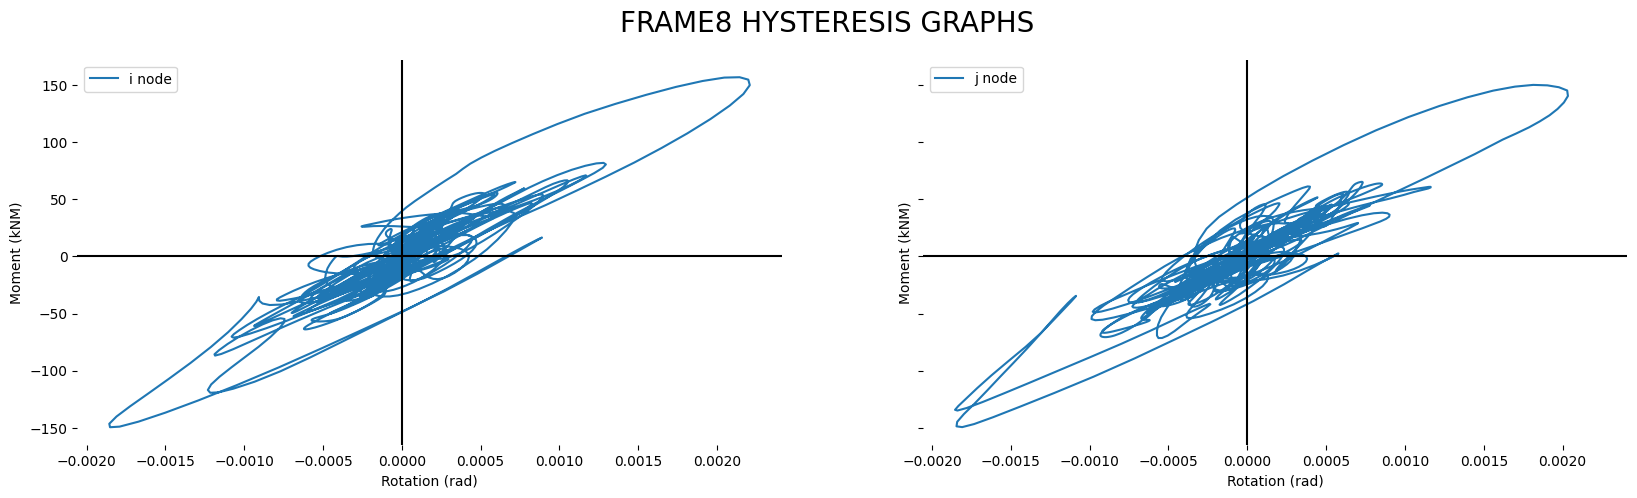

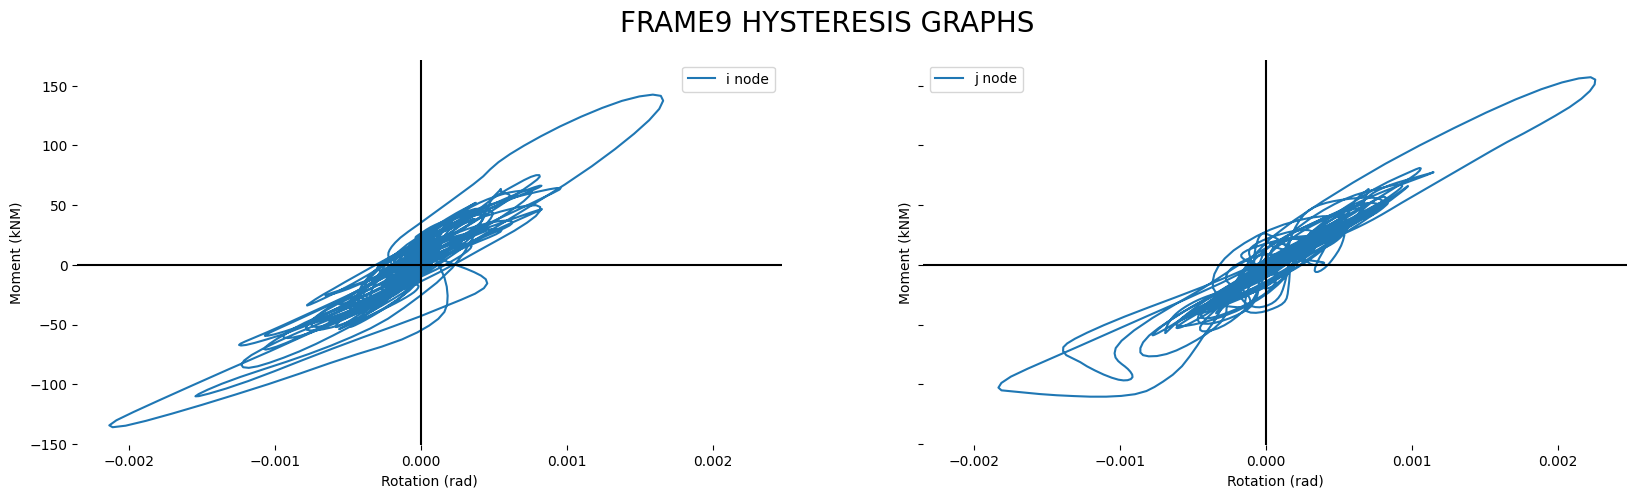

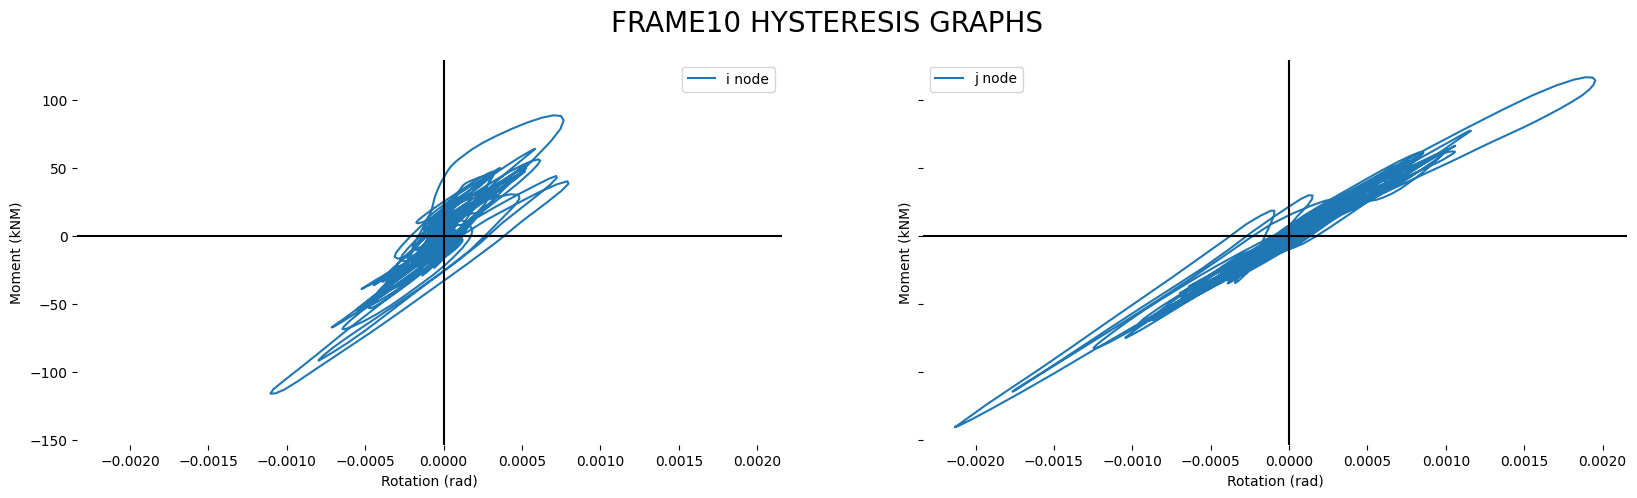

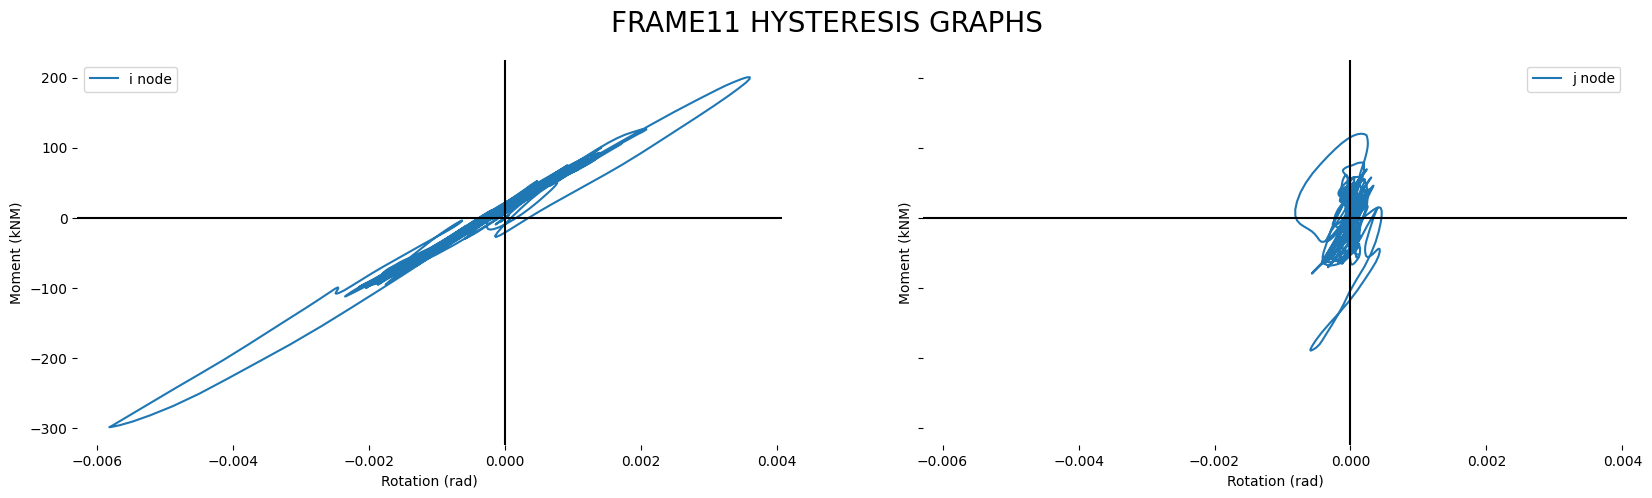

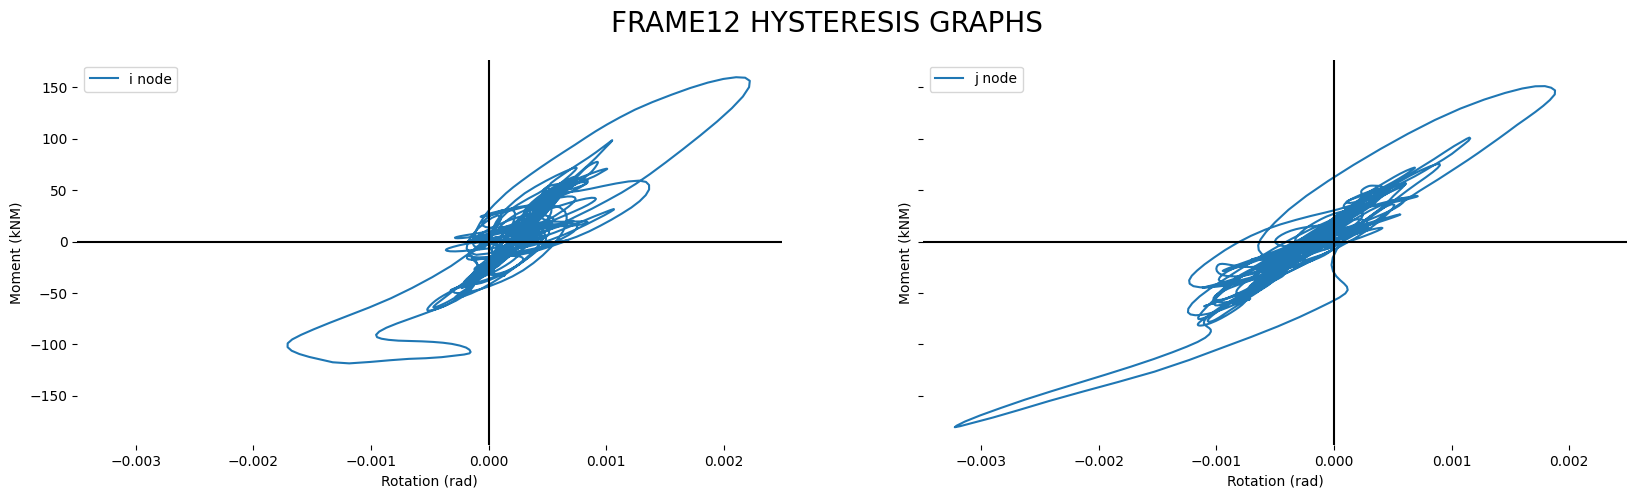

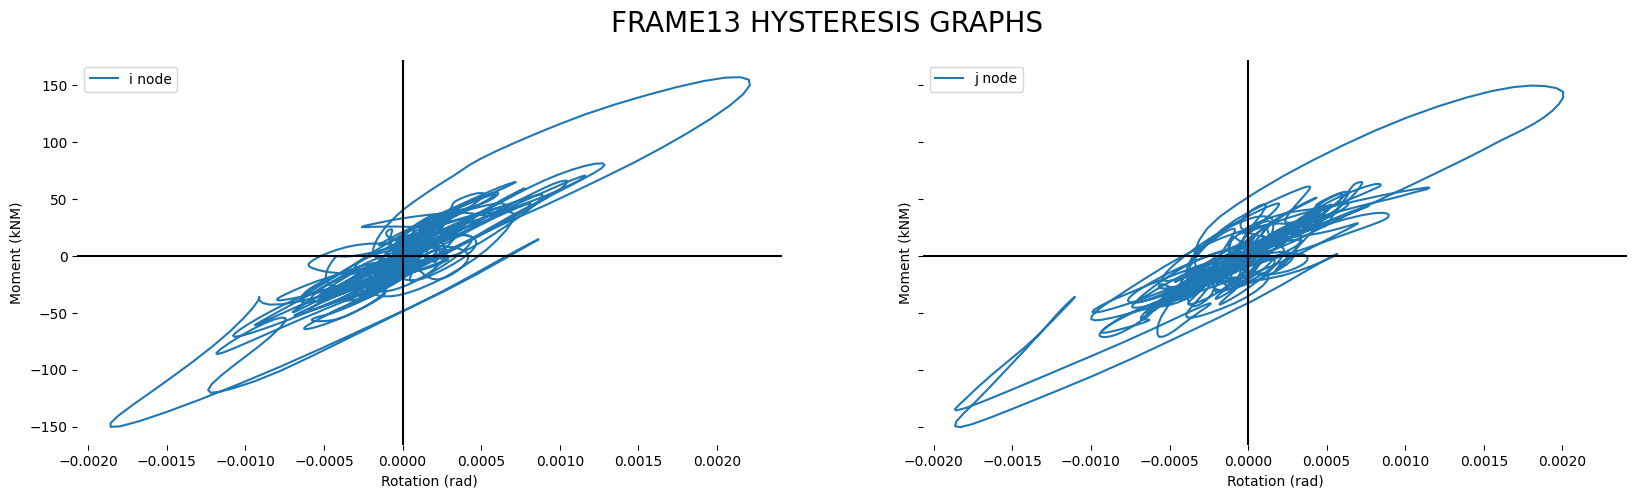

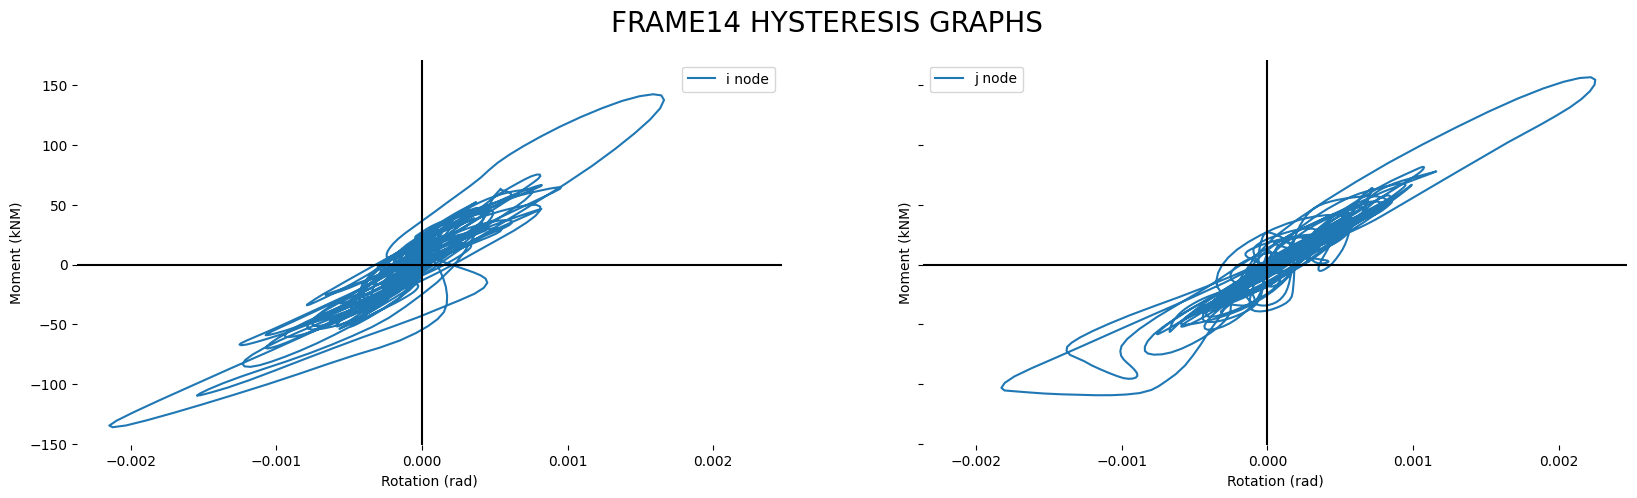

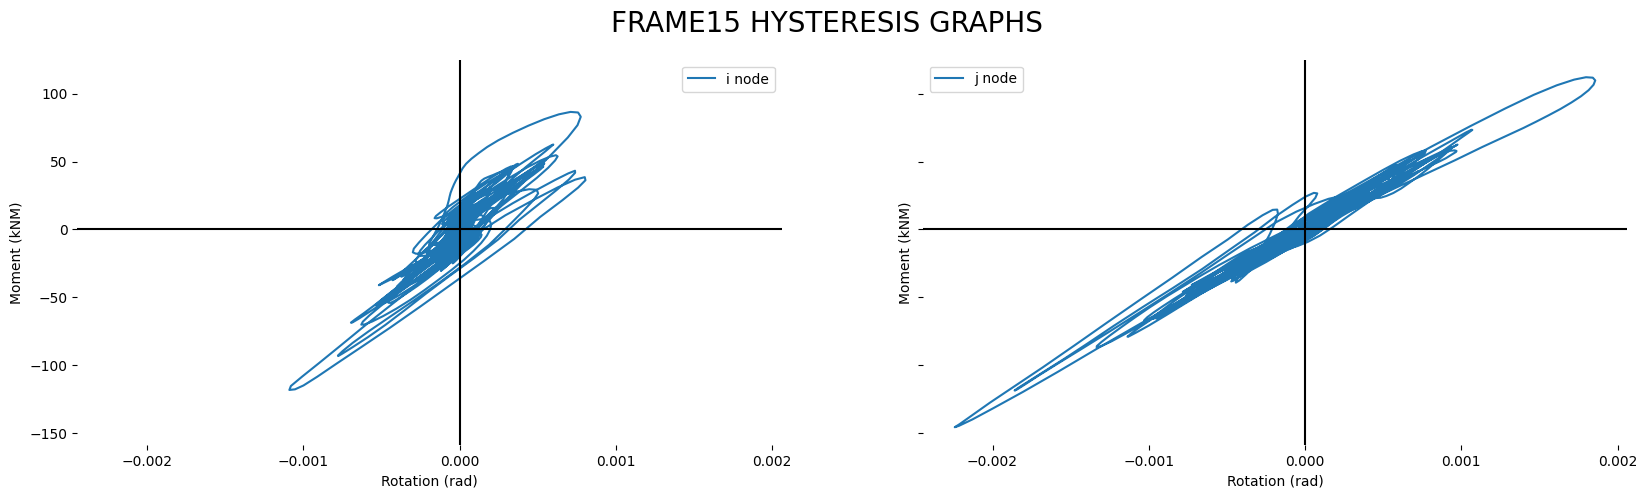

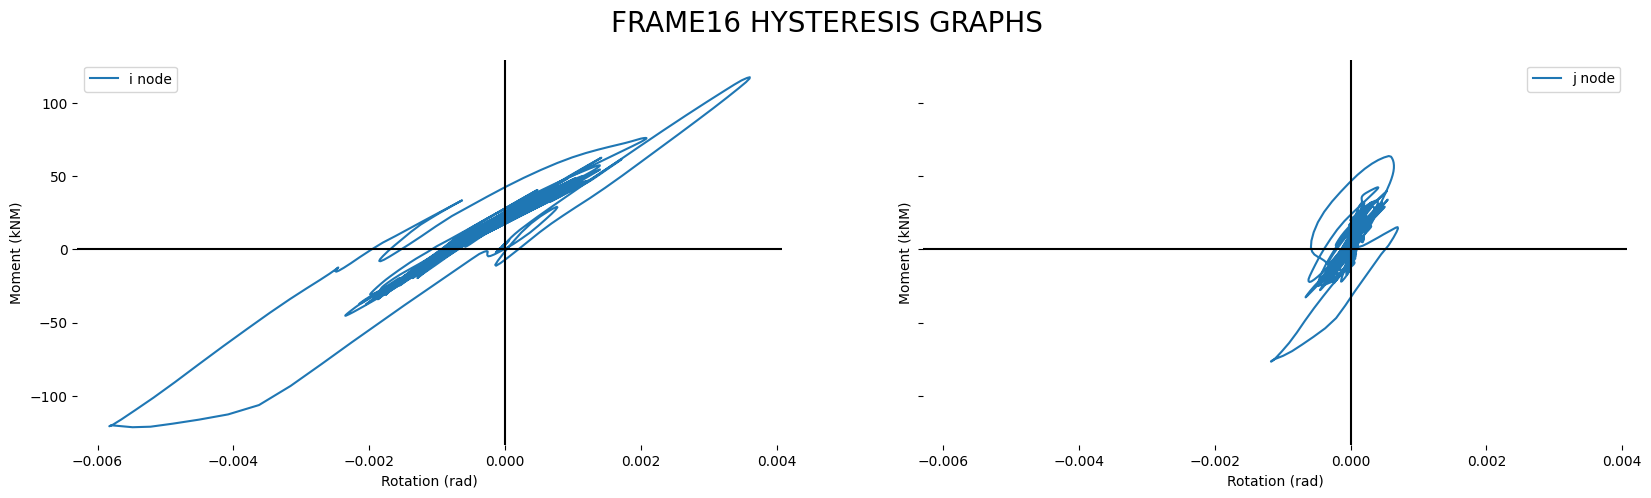

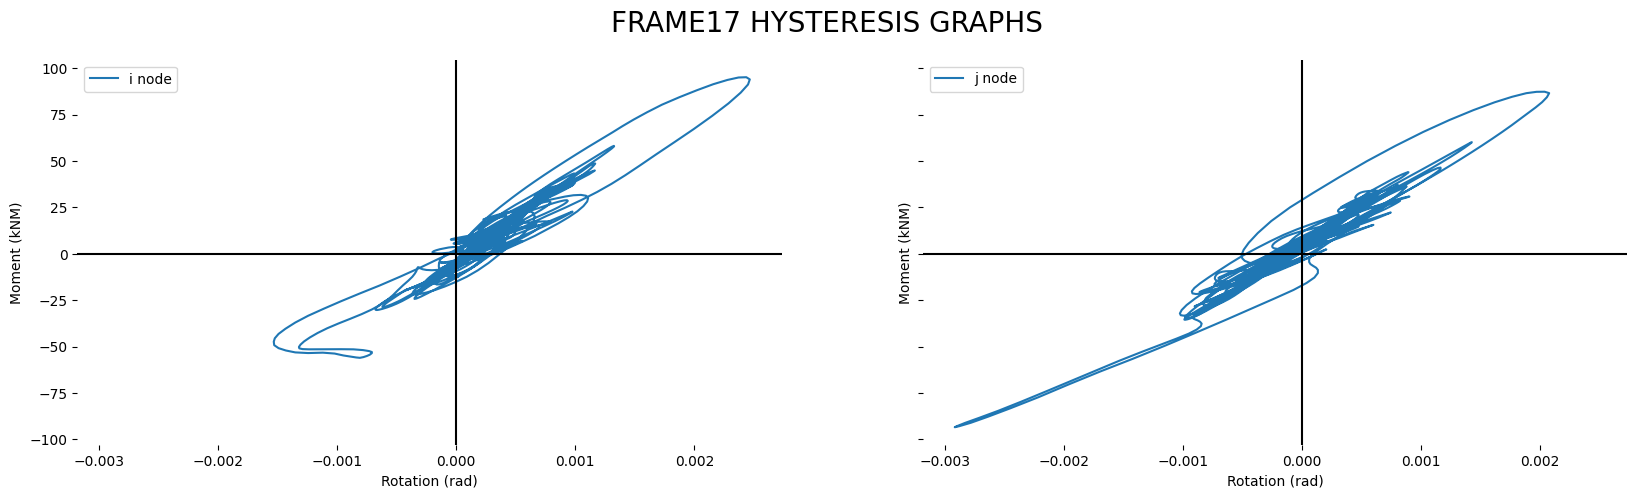

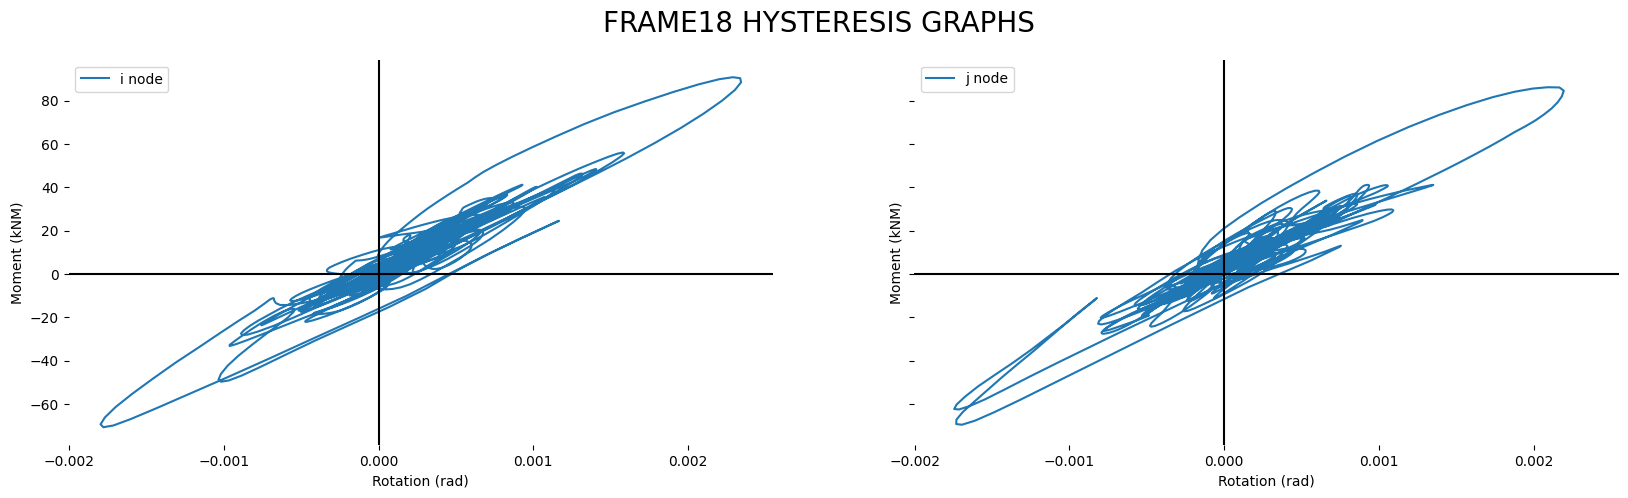

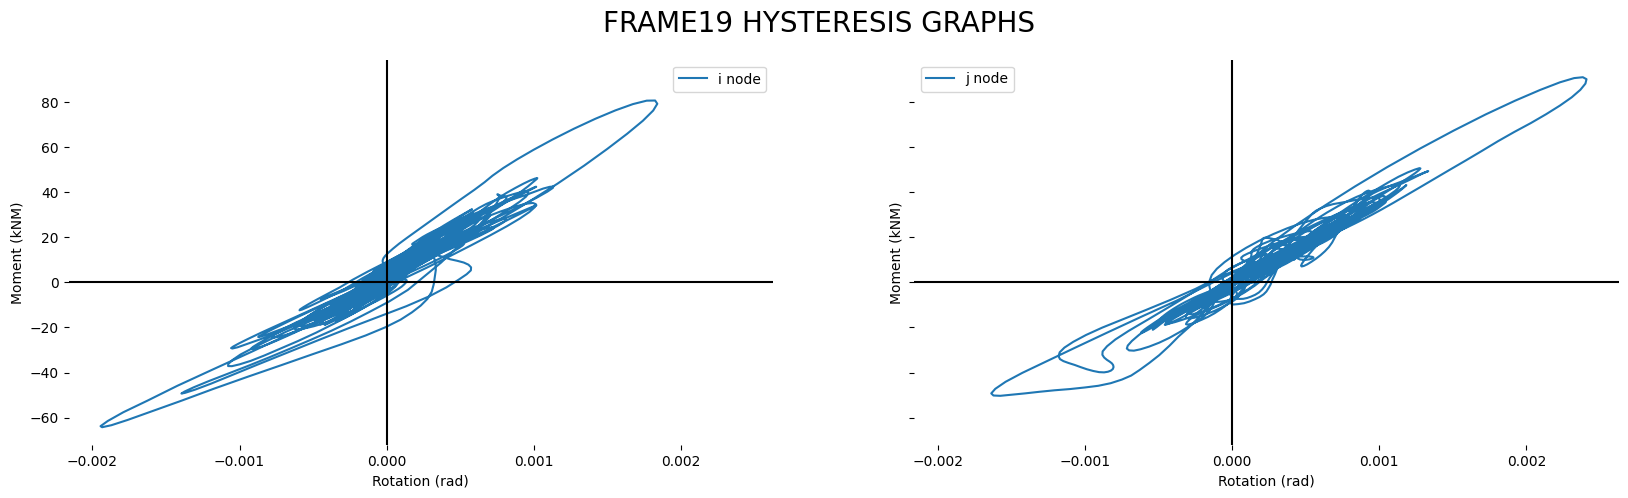

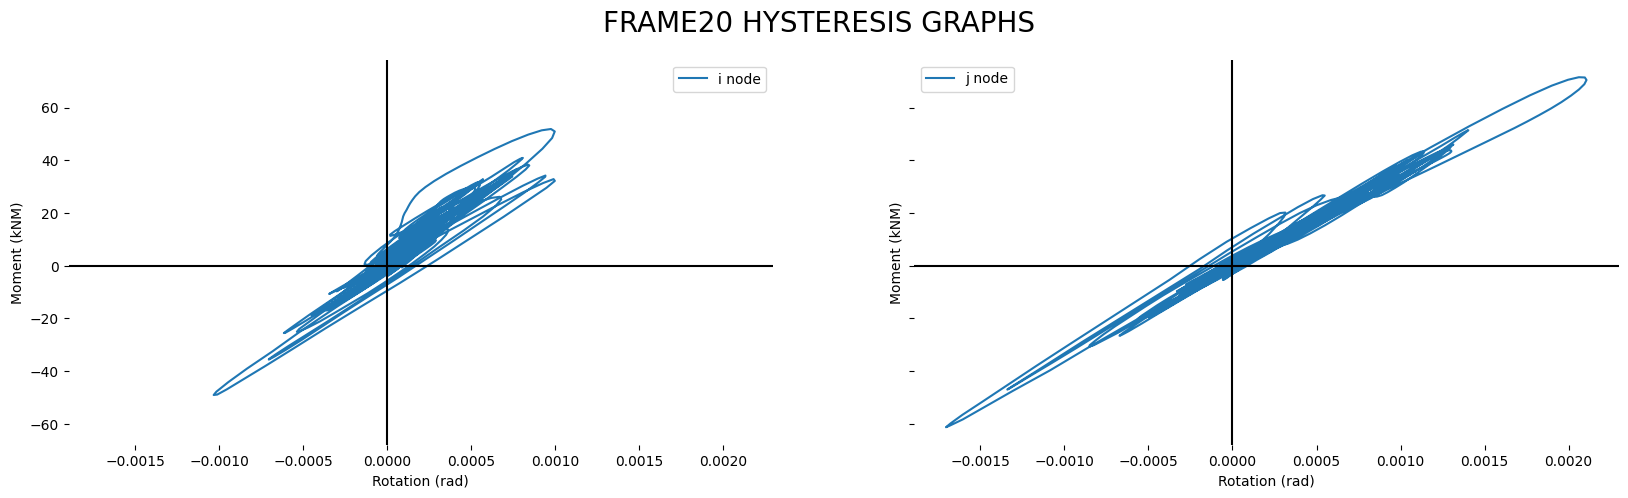

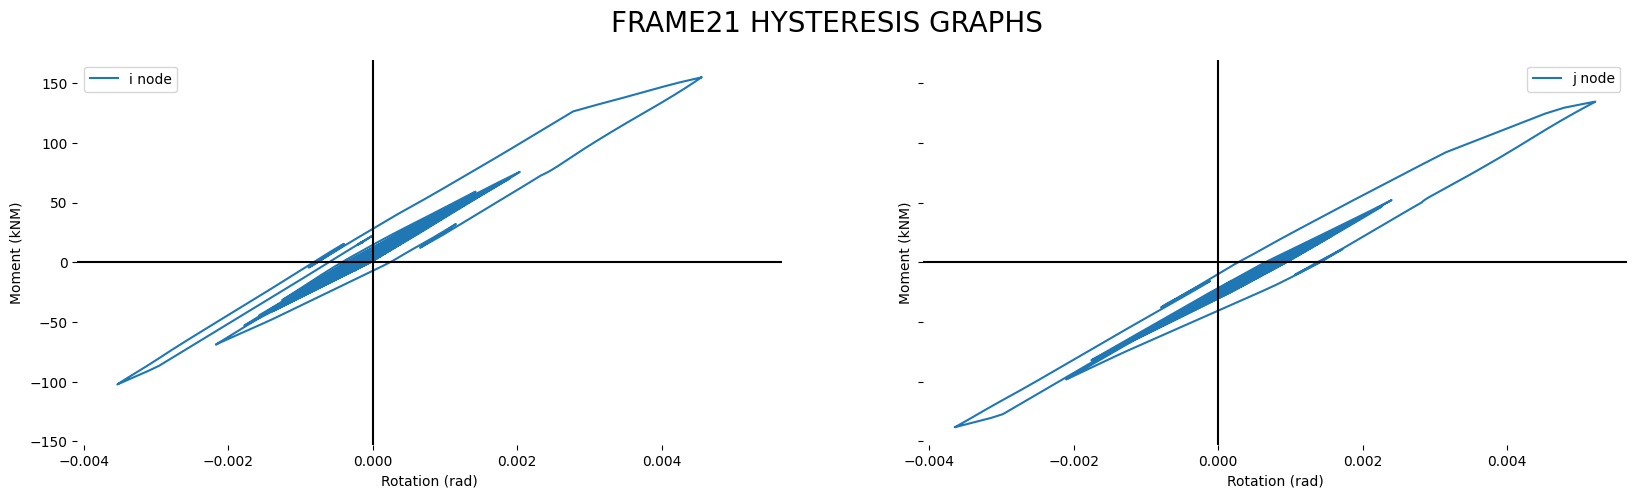

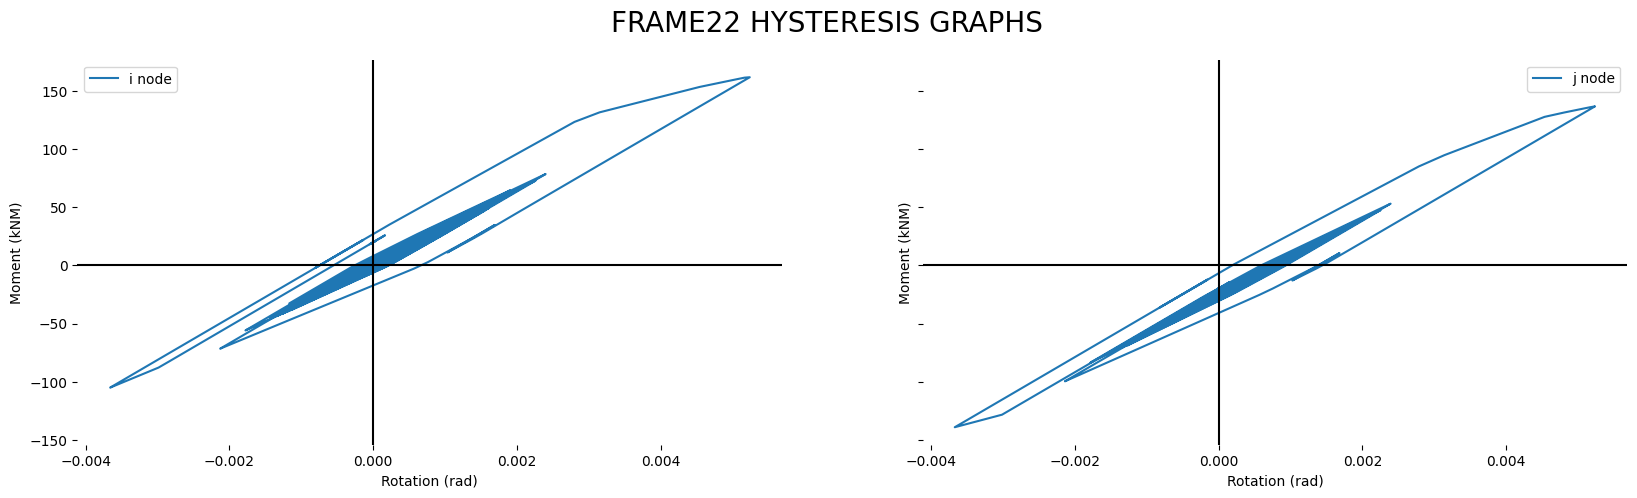

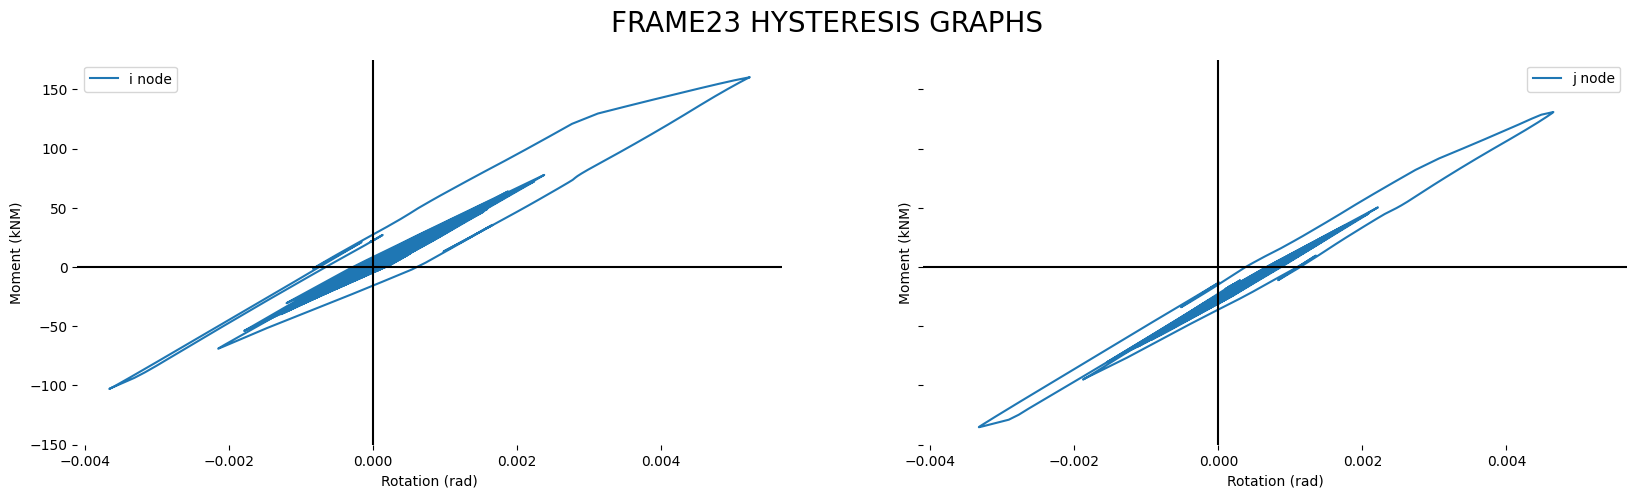

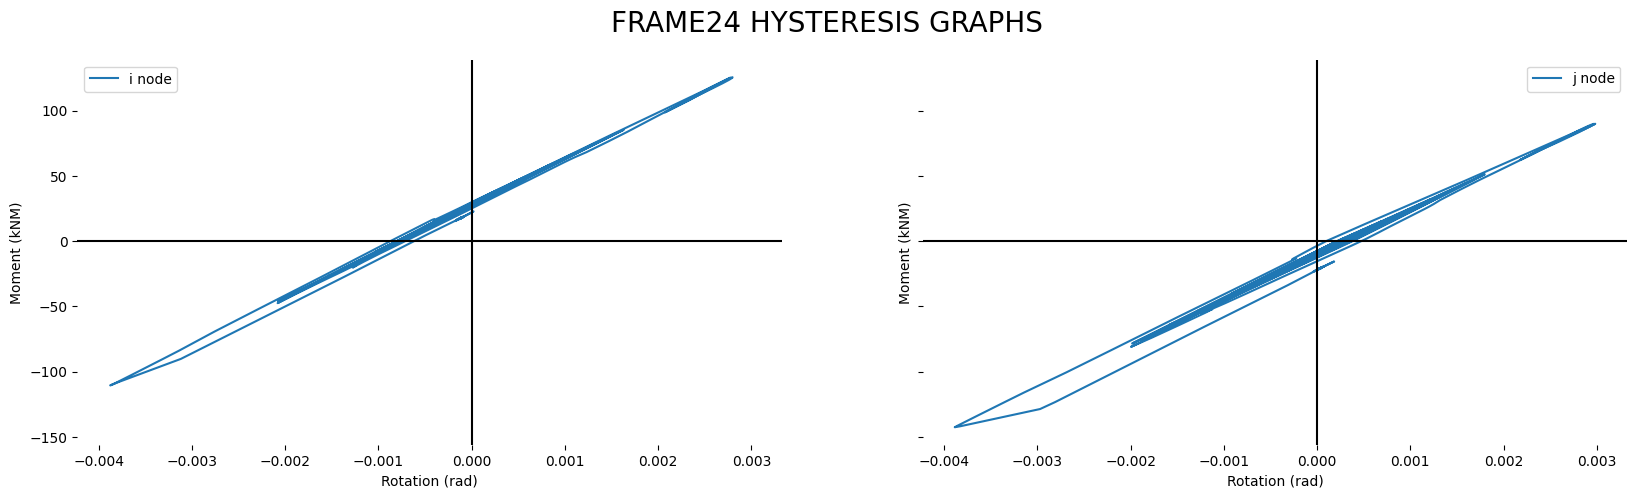

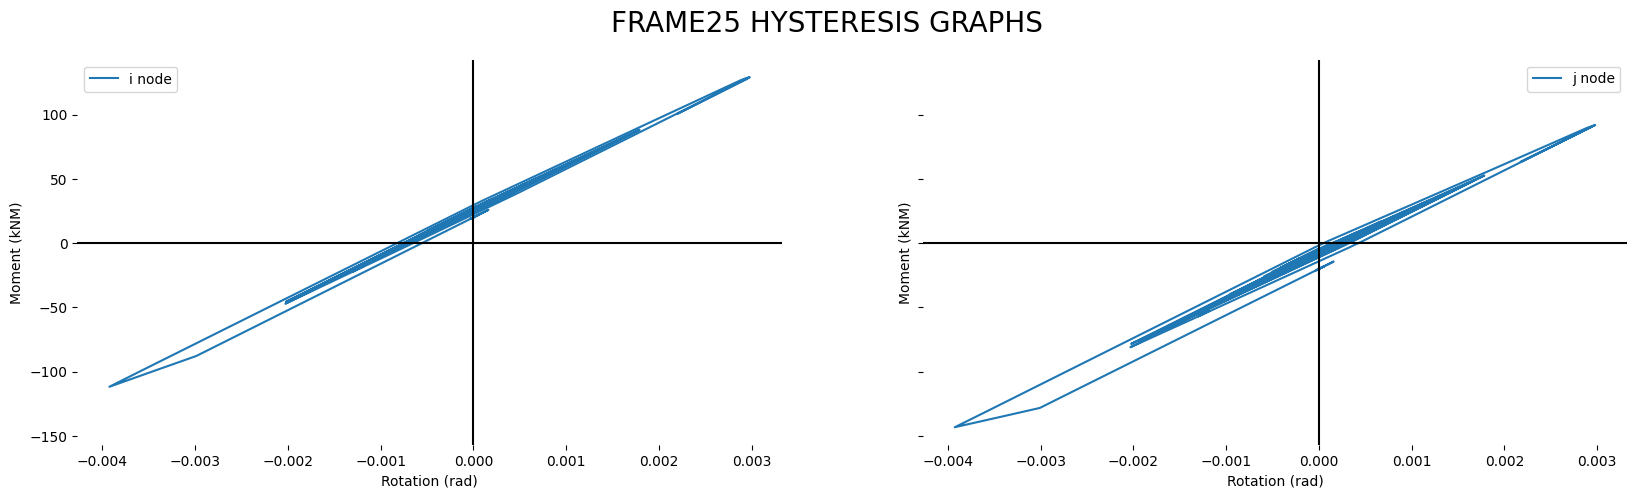

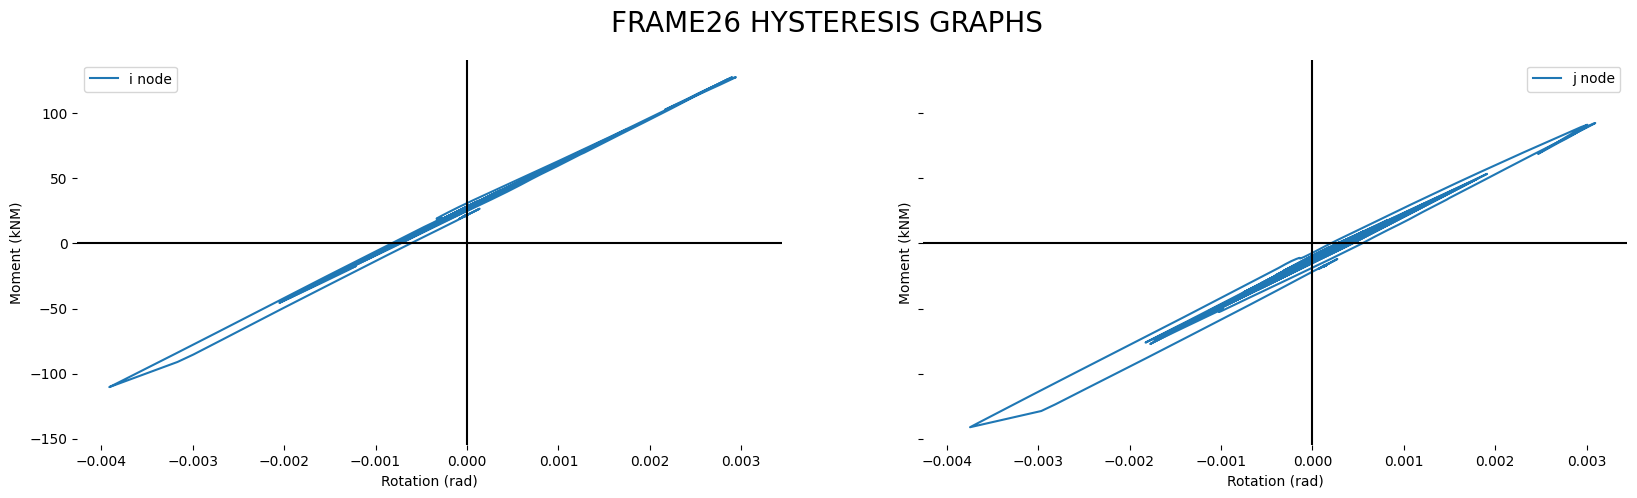

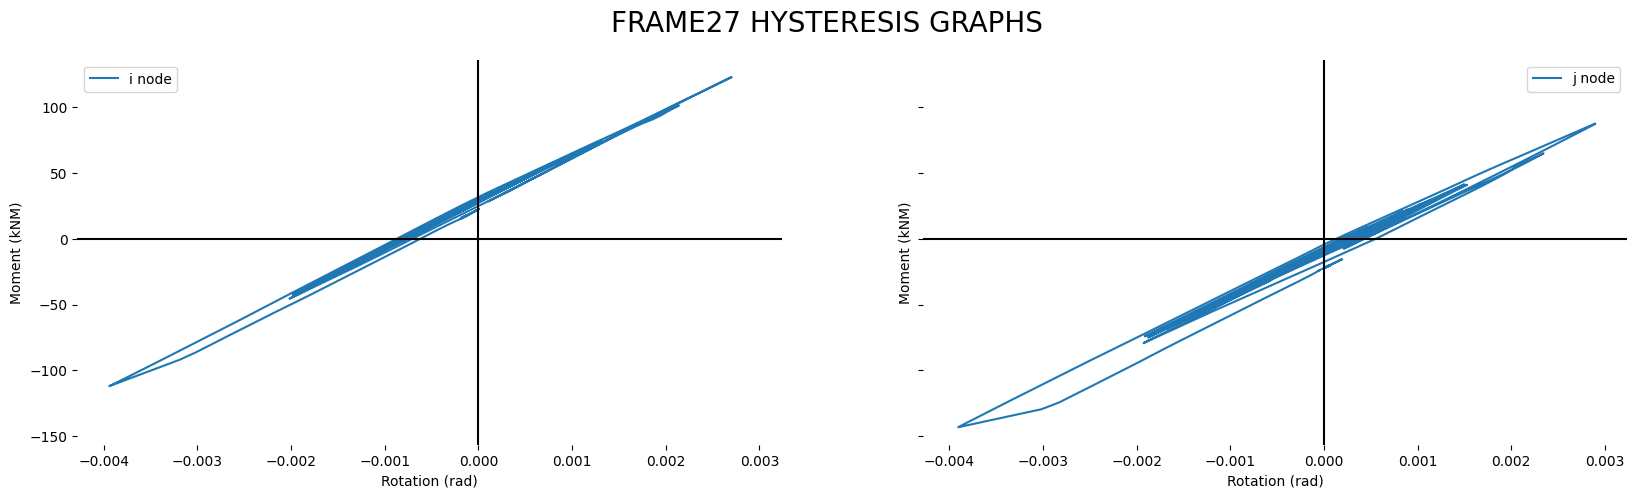

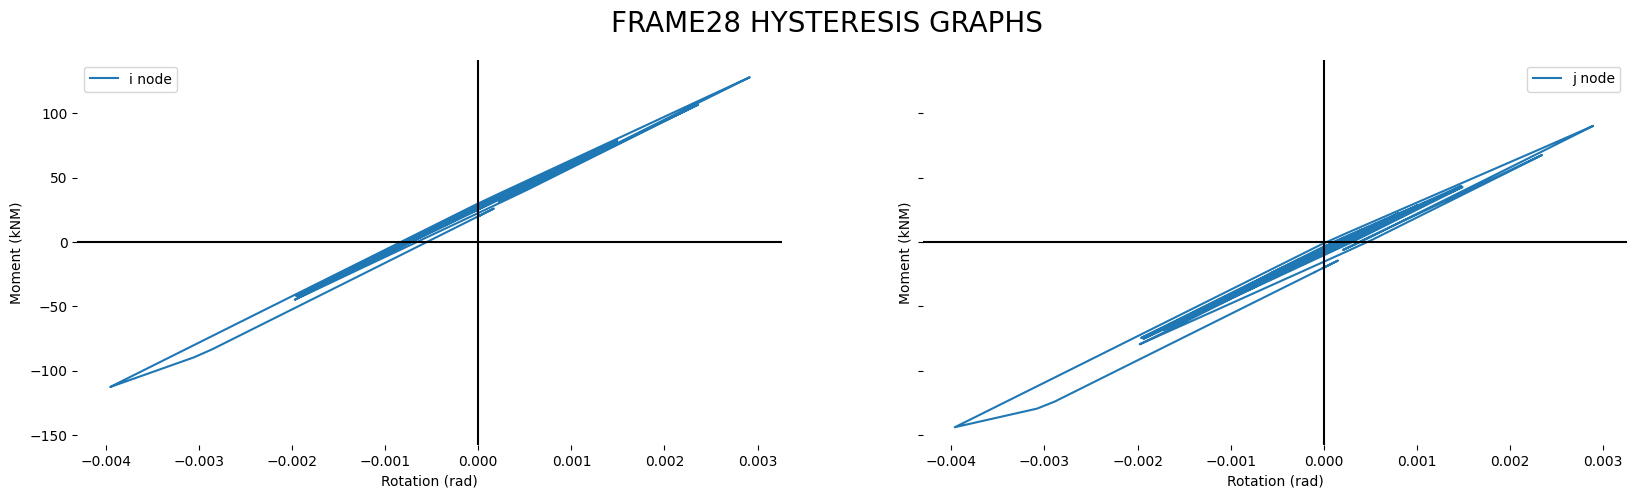

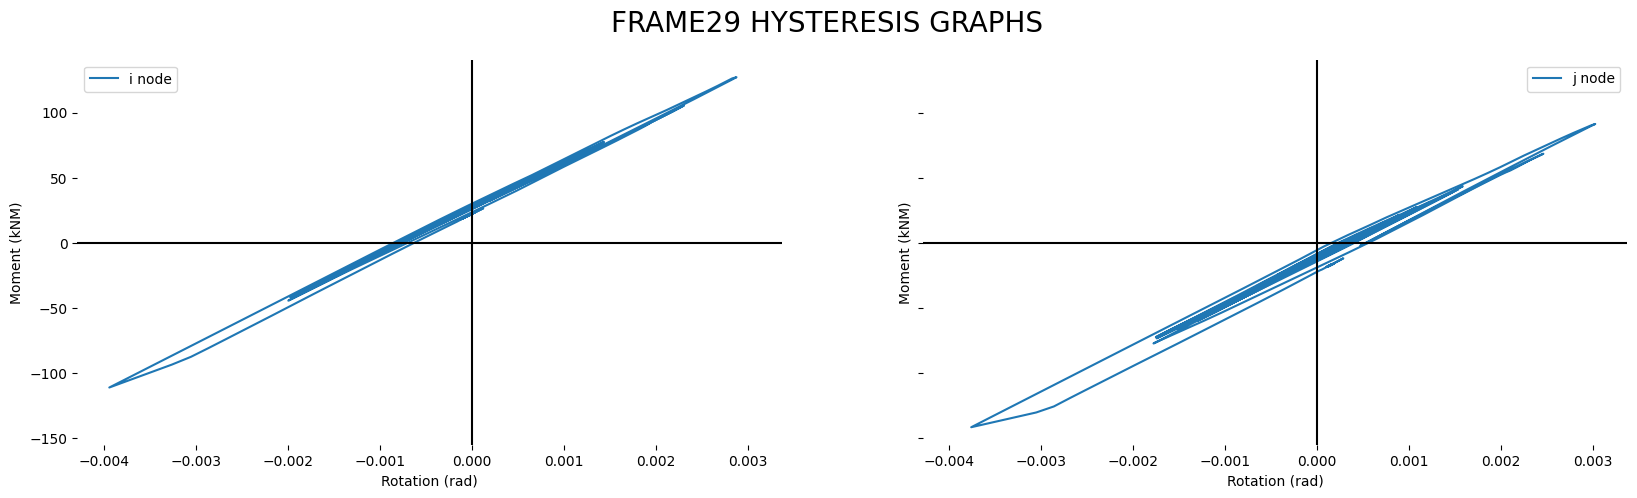

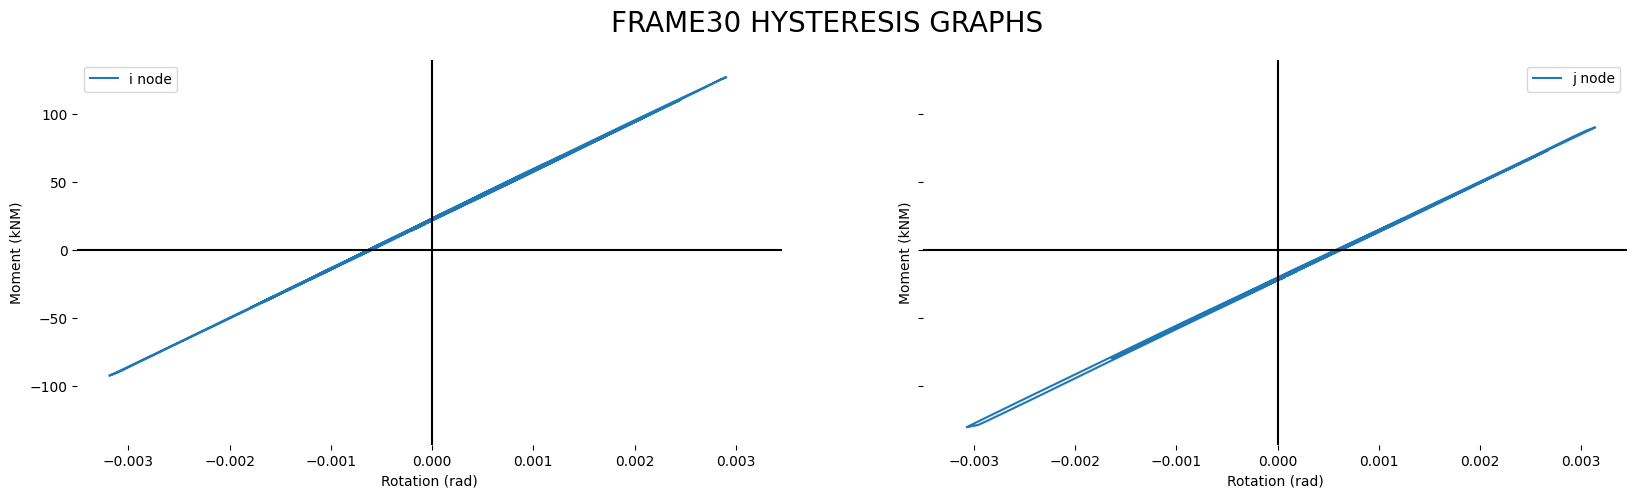

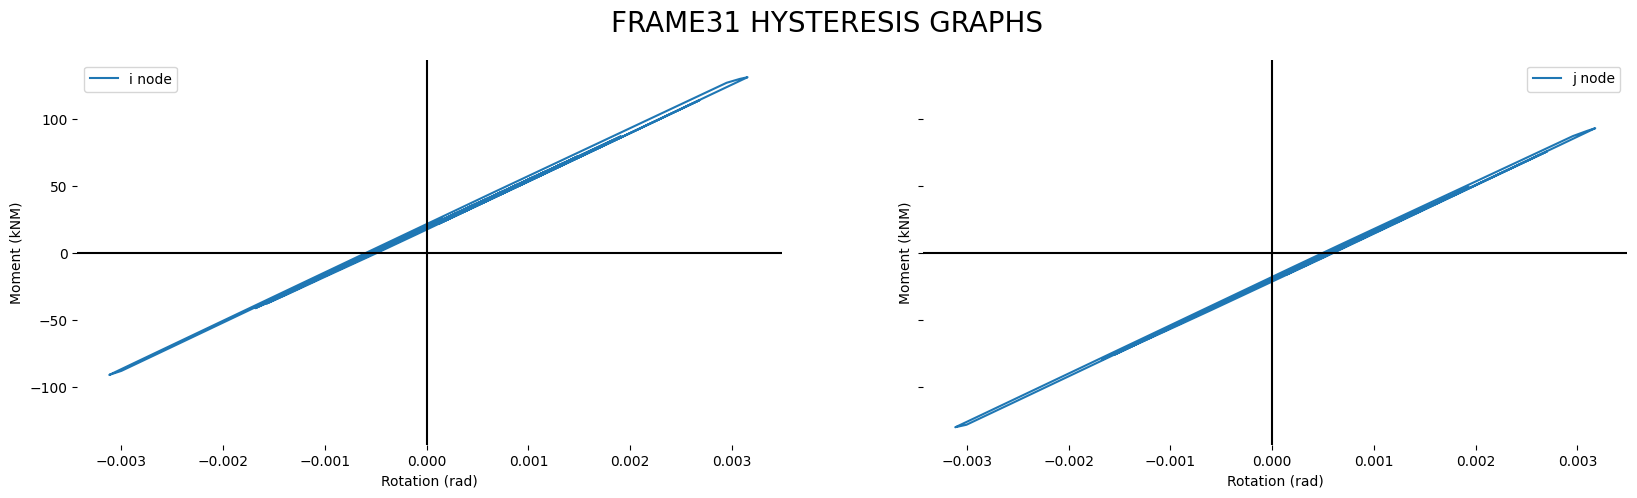

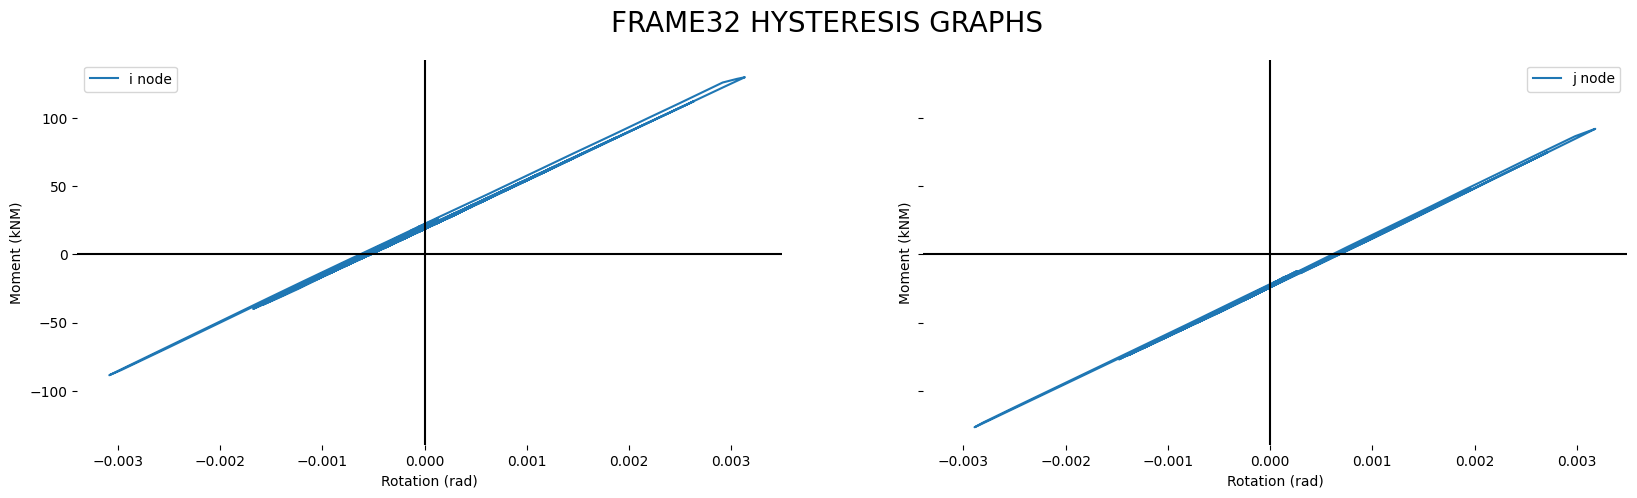

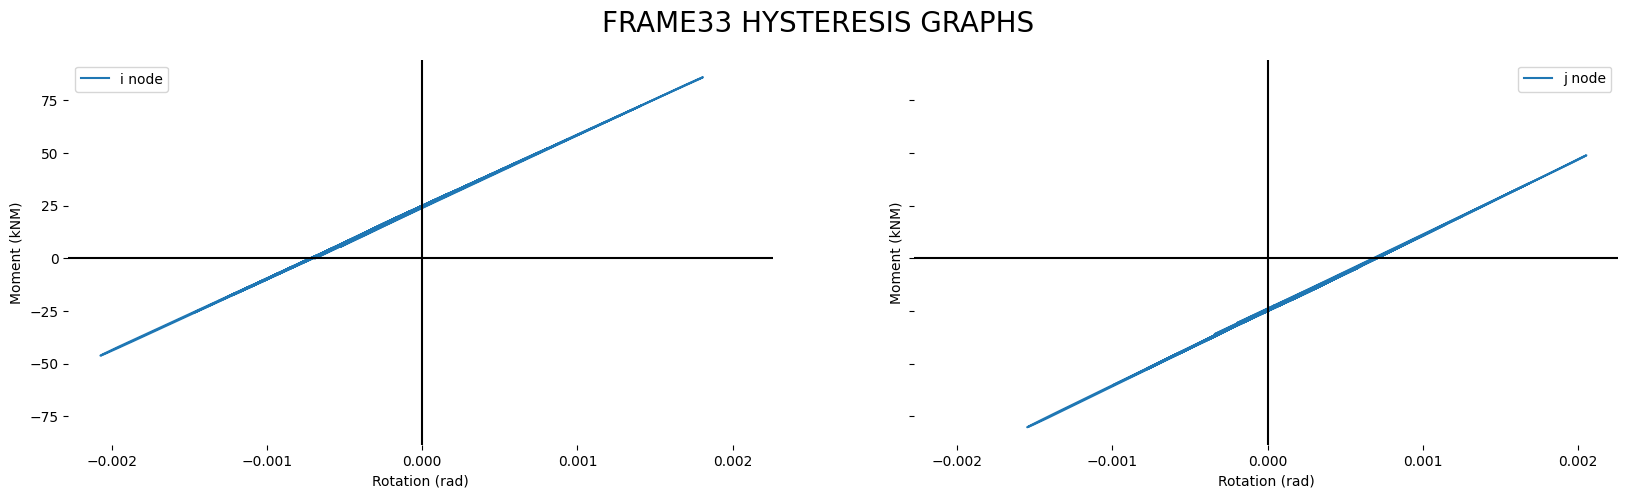

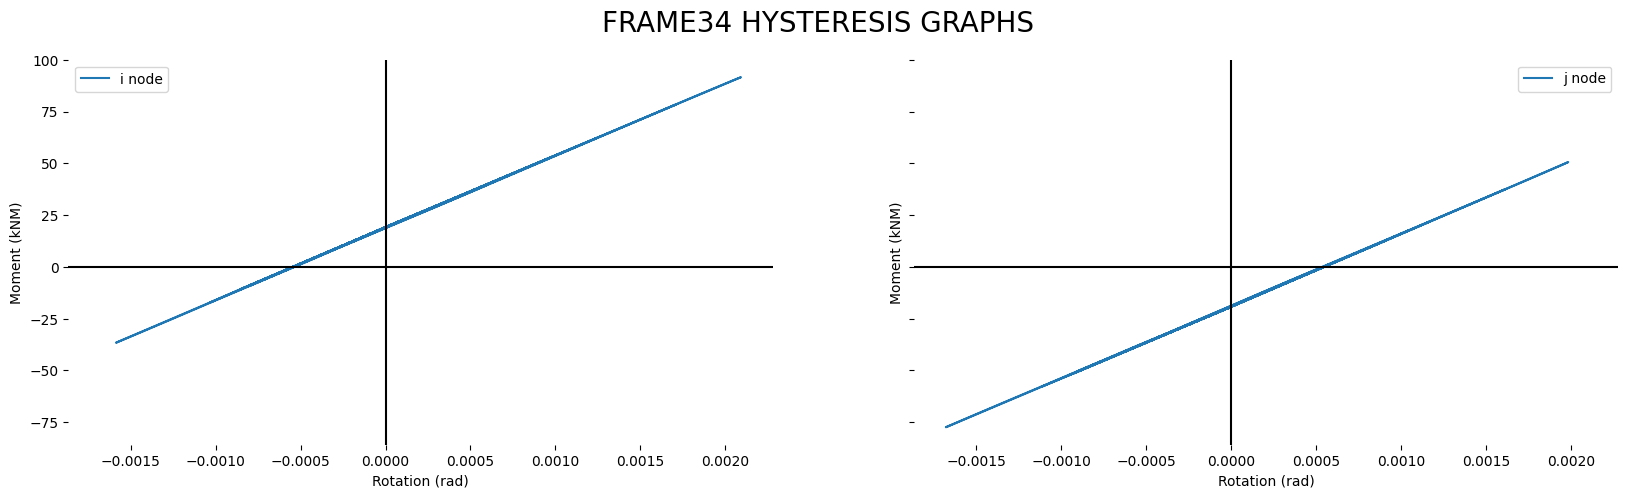

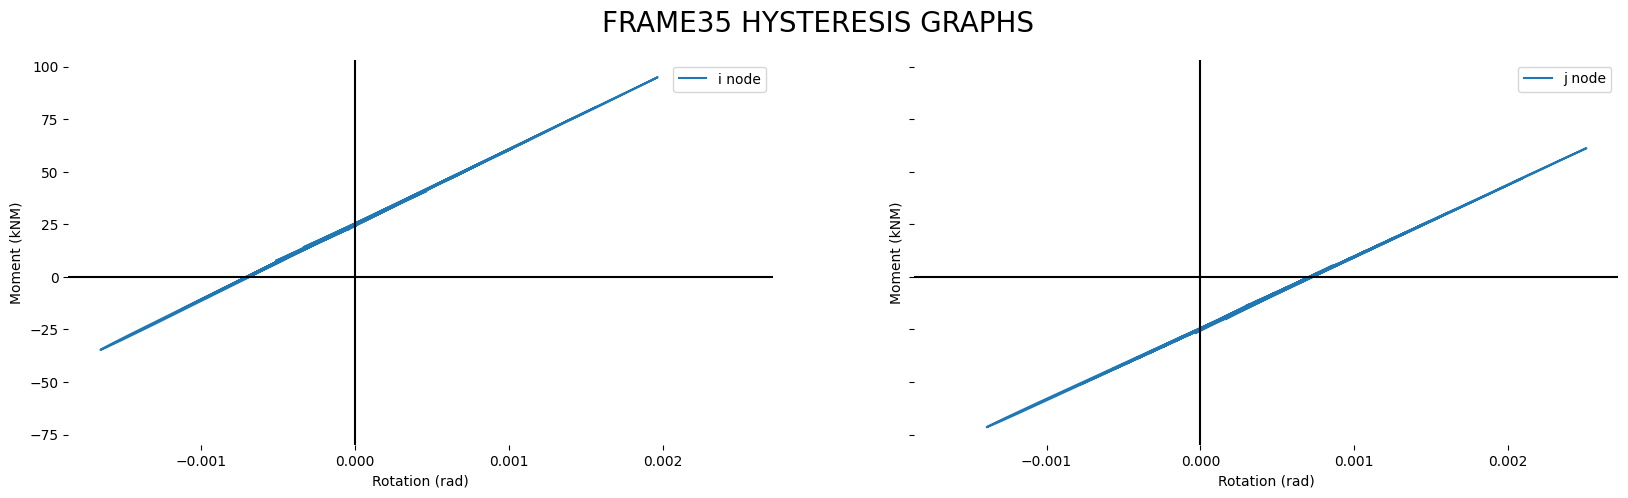

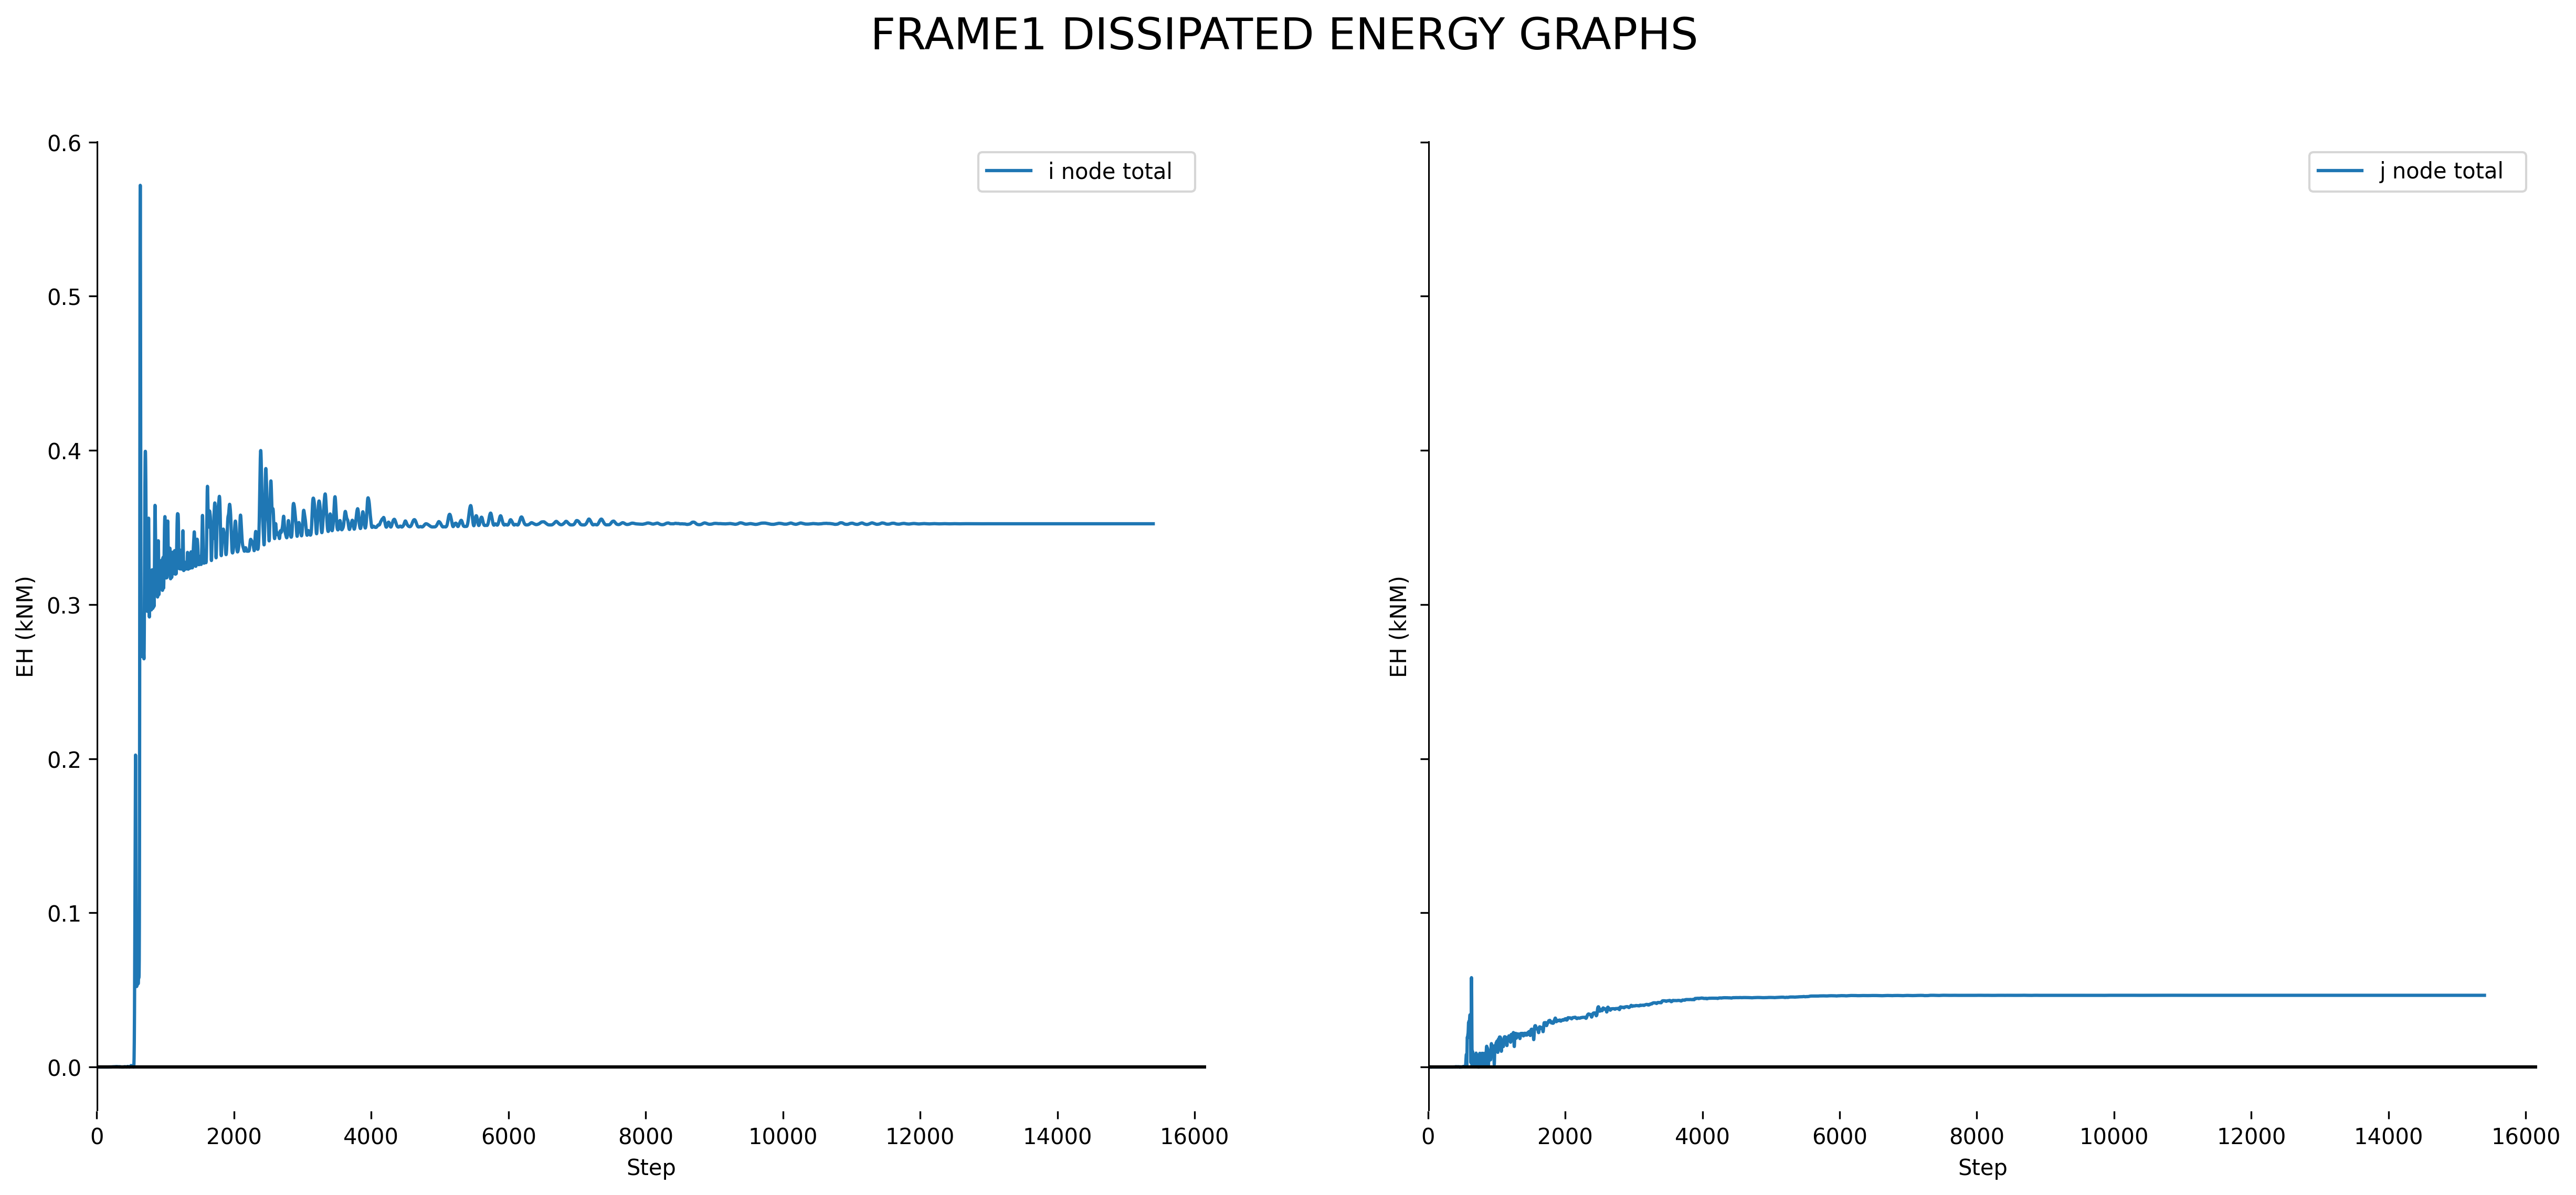

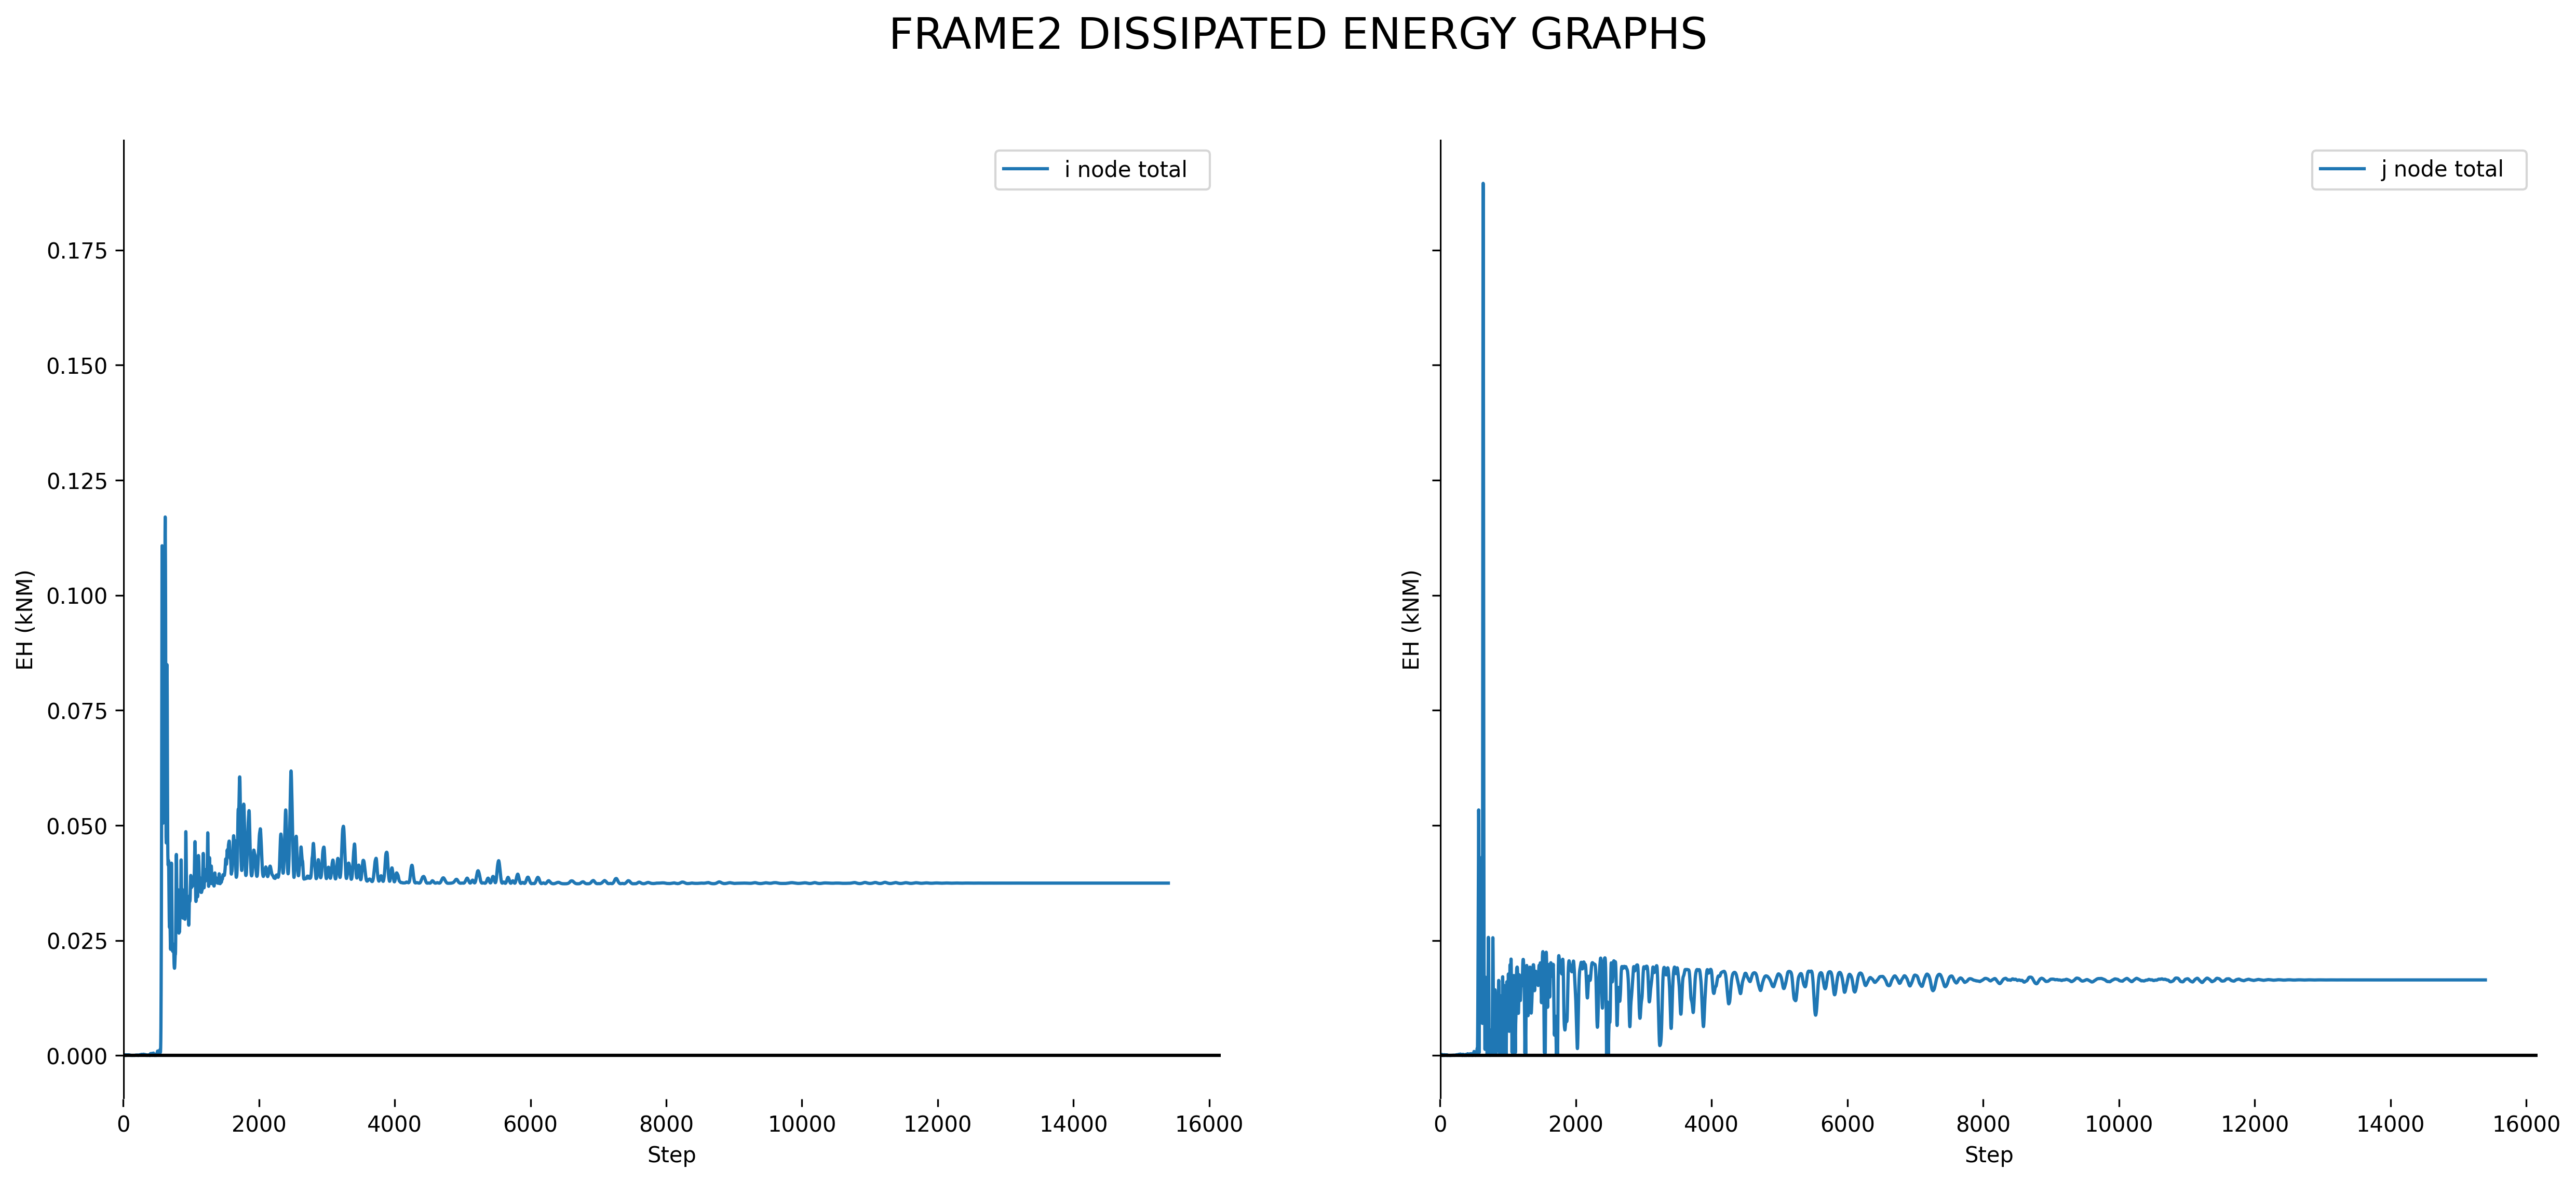

In [3]:
#                                                                   MAIN SHOCK AFTER SHOCK ANALYSIS 
#===================================================================================================================================================================
engine = op()
IDloadTag = 400
tsTag = 3
for count,factor in enumerate(scalecoeff):
    for index in range(0,len(Events.columns)-1):
        
        # Zaman serilerinin tanımlanması
        #===============================================================================================================
        GMdirection = 1
        GMfact = factor 
        GMfatt = Unit.g
        if index % 2 == 0:
            if index == 0:
                ops.remove('loadPattern',tsTag)
                ops.reset()
                print(f" ==> Opensees domainindeki time series silindi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 
            dt = Events[Events.columns[index]][1]-Events[Events.columns[index]][0]
            accel = Events[Events.columns[index+1]]
            ops.timeSeries('Path', tsTag, '-dt', dt, '-values', *accel,'-factor', GMfatt) 
            ops.pattern('UniformExcitation', IDloadTag, GMdirection, '-accel', tsTag,'-factor', GMfact)# pattern object
            print(f" ==> {index/2}. deprem için {factor} carpani uygulandi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

            #Run time history analysis
            #===============================================================================================================

            DtAnalysis = dt
            TmaxAnalysis =Events[Events.columns[index]][Events.last_valid_index()]
            
            ops.wipeAnalysis()
            engine.analysis_define(solver=0, Tol=1e-8, maxNumIter=300, pFlag=0, nType=2)
            print(f" ==> analiz secenekleri tanimlandi ve analiz baslatildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 
            ElementForces,NodalDisplacement,MomentRotation,FiberStressStrain,Eds,times = engine.run_timehistory(
                columndict=pf.column_dict, DtAnalysis=DtAnalysis, TmaxAnalysis=TmaxAnalysis, outEleForces = True, outNodalDisp = True, outFiber= True, animotions= False, outSection= True)
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi bitti - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 
            msp.plot_TNodeTime(time=times,NodalDisplacement=NodalDisplacement, SaveFolder = f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\", FigName = f"Top_Disp-Time{int(index/2)}")

            #Save outputs csv files
            #===============================================================================================================
            
            ElementForces.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\ElementForcesEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            NodalDisplacement.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\NodalDisplacementsEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            MomentRotation.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\MomentRotationsEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            FiberStressStrain.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\FiberStressStrainsEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi sonuçlari csv olarak kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

            #Modal Analysis
            #===============================================================================================================

            T1, Mratios, Mfactors, Mtots = op.modal_analys2(numFloor)
            ops.loadConst('-time', 0.0)
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi sonrasi modal analiz yapildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 
            
            #Story Drift Check
            #===============================================================================================================

            Columndrift = fp.StoryDrift2(NodalDisplacement,pf.column_dict,pf.floorFrames)
            Columndrift.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\ColumndriftsEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi için kolon driftleri hesaplandi ve csv dosyalari kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 
            #Columndrift.query(f"Floor == {1}") # 1.kat sonuçları
            
            #Performance Check
            #===============================================================================================================

            performance = prf()
            FrameCheck = performance.FramePerformanceCheck(column_dict = pf.column_dict, floorFrames=pf.floorFrames, Lpl=Lpl, beam_H=beam_H, important_points_ext=important_points_ext, important_points_int=important_points_int, 
                                                        FiberStressStrain=FiberStressStrain, MomentRotation=MomentRotation)
            FrameCheck.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\FrameChecksEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi Performans hesaplari yapildi ve csv dosyasi kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

            #Energy Calculations
            #===============================================================================================================

            #Elemanların iki ucunda tüketilen enerji hesaplamaları
            SectionEnergy = pd.DataFrame(columns=["Eletags","iNode","jNode"])
            for ele in ops.getEleTags():
                tempdf = MomentRotation.query(f"Eletags == {ele} ")
                EH_i_total = sc.cumtrapz(tempdf.iMoment, tempdf.iRotation)
                EH_j_total = sc.cumtrapz(tempdf.jMoment, tempdf.jRotation)
                newj = []
                newi = []
                for i,j in zip(EH_i_total,EH_j_total):
                    if i < 0 :
                        i *= -1
                        newi.append(i)
                    else:
                        newi.append(i)
                    if j < 0 :
                        j *= -1
                        newj.append(j)
                    else:
                        newj.append(j)
                #EH_j_total = [-1*j for j in EH_j_total]
                EH_j_total = newj
                EH_i_total = newi
                del newj,newi
                energymember = pd.DataFrame({"Eletags": ele, "iNode": EH_i_total, "jNode": EH_j_total})
                SectionEnergy = pd.concat([SectionEnergy, energymember])

            #Elemanlarda tüketilen toplam enerjilerin hesaplanması
            #===============================================================================================================
            #pf.floorFrames[(pf.floorFrames.EleType == "Column")&(pf.floorFrames.Floor == 1)]
            ElementEnergy = SectionEnergy.copy()
            floor = [pf.floorFrames.loc[ele]["Floor"] for ele in ElementEnergy.Eletags if ele == pf.floorFrames.EleId[ele]]
            ElementEnergy["Floor"] = floor
            ElementEnergy["ElementEnergy"] = ElementEnergy["iNode"] + ElementEnergy["jNode"]
            ElementEnergy.drop(columns=['iNode', 'jNode'], axis=1,inplace=True)

            #Total olarak katlarda dağıtılan enerji
            #===============================================================================================================
            for floor in pf.floorFrames.Floor.unique():
                print(ElementEnergy.query(f"Floor == {floor} ")["ElementEnergy"].sum())

            # Energy files save
            #===============================================================================================================
            SectionEnergy.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\SectionEnergysEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            ElementEnergy.to_csv(path_or_buf=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\CsvFiles\\ElementEnergysEqe{int(index/2)}.csv",index = False, encoding='utf-8')
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi enerji hesaplari yapildi ve csv dosyalari kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

            # Strain-Stress plot and save fig
            #===============================================================================================================
            msp.plot_StressStrain(StressStrain=FiberStressStrain,FigName=f"StressStrain{index/2}",SaveFolder=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\StressStrainPlots")
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi stress-strain grafikleri kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}") 

            # Moment-Rotation plot and save fig
            #===============================================================================================================
            msp.plot_MomentRotation(MomentRotation,FigName=f"MomentRotation{index/2}",SaveFolder=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\MomentRotationPlots")
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi moment-rotation grafikleri kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

            # Section Energy plot and save fig
            #===============================================================================================================
            msp.plot_AllSection_Energy(SectionEnergy=SectionEnergy,FigName=f"SectionEnergy{index/2}",SaveFolder=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\EnergyPlots")
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi eleman i ve j uclarinin enerji grafikleri kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")
            
            # Frame Energy plot and save fig
            #===============================================================================================================
            msp.plot_AllFrame_Energy(ElementEnergy=ElementEnergy,FigName=f"FrameEnergy{index/2}",SaveFolder=f"{Folderspath}\\Outputs\\{EarthquakeName}\\{factor}\\EnergyPlots")
            print(f" ==> {factor} carpani icin {index/2}. deprem analizi elemanlarin enerji grafikleri kayit edildi - {datetime.now().hour} : {datetime.now().minute} : {datetime.now().second}")

        IDloadTag += 1
        tsTag += 1
